# IMDB 5000 Movie Dataset

Dataset Link: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset
This dataset originally contains 28 columns and 5043 rows and contains data of movies on IMDB from 1916 to 2016.

## Problem Statement

Every year thousands of movies are filmed and produced but not all of them breakeven. An even lesser number of movies make it as a "box-office hit". In this project, we intend to create a machine learning model that predicts which movies generate more gross revenue based on information available on IMDB, an online database for movies 

## Exploratory Data Analysis

Before we create our machine learning model, let's start doing some exploratory data analysis. Our methodology is as follows:

1. Data Processing (Handling Null Values and Removing Duplicates)
2. Feature Engineering
3. EDA for Response Variable, `Gross`
4. EDA for Numeric Features
5. EDA for Categorical Features
6. Dimensionality Reduction and Robust Scale Transformation
7. Baseline Models
8. Improvements to Baseline Models
9. Model Discussions and Conclusion

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

### Importing Dataset

In [ ]:
df = pd.read_csv("movie_metadata.csv")
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [ ]:
df.columns, df.shape

(Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
       dtype='object'),
 (5043, 28))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

Below are some of our preliminary observations:

* There are `28` features and `5043` rows in this dataset.
* Our response variable is `gross`.
* There seems to be multiple missing values across several features. We will get to this later when we clean our data.
* There is a good mix of categorical and numeric features. Features with `Dtypes` = `float64`/`int64` are most likely numeric whilst features with `Dtypes` = `object` are most likely categorical. 

We will proceed by splitting the <b>numeric</b> and <b>categorical</b> data and also changing their features' dtypes in our df dataframe. Since we cannot change the dtypes of <b>numeric</b> features due to missing values, we'll save that for later.

In [ ]:
numerical = [c for c in df.columns if df[c].dtype != 'object']
categorical = [c for c in df.columns if df[c].dtype == 'object']

# changing object type to category
for c in categorical:
    df[c] = df[c].astype('category')

print("Numeric features:")
print(numerical)
print()
print("Categorical features:")
print(categorical)

Numeric features:
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

Categorical features:
['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']


`title_year` seems to be a categorical feature since year is not continuous in this context, so we will place it in the right list and change its dtype.

`facenumber_in_poster` seems to be a categorical feature as well since it means the number of people in a poster. We will also place it in the right list and change its dtype

`aspect_ratio` also appears to be a categorical feature since it refers to the length to width ratio of the screen, and only certain ratios are available. We will also place it in the right list and change its dtype.

`movie_imdb_link` does not seem to have predictive power so we will drop it.

In [ ]:
numerical.remove('title_year')
numerical.remove('facenumber_in_poster')
numerical.remove('aspect_ratio')

categorical.append('title_year')
categorical.append('facenumber_in_poster')
categorical.append('aspect_ratio')

categorical.remove('movie_imdb_link')

df['title_year'] = pd.Categorical(df.title_year) # changing title_year type to category
df['facenumber_in_poster'] = pd.Categorical(df.facenumber_in_poster) # changing facenumber_in_poster type to category
df['aspect_ratio'] = pd.Categorical(df.aspect_ratio) # changing aspect_ratio type to category
df = df.drop(columns=['movie_imdb_link']) # dropping movie imdb link

df.info()

print()
print("Numeric features:")
print(numerical)
print()
print("Categorical features:")
print(categorical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      5024 non-null   category
 1   director_name              4939 non-null   category
 2   num_critic_for_reviews     4993 non-null   float64 
 3   duration                   5028 non-null   float64 
 4   director_facebook_likes    4939 non-null   float64 
 5   actor_3_facebook_likes     5020 non-null   float64 
 6   actor_2_name               5030 non-null   category
 7   actor_1_facebook_likes     5036 non-null   float64 
 8   gross                      4159 non-null   float64 
 9   genres                     5043 non-null   category
 10  actor_1_name               5036 non-null   category
 11  movie_title                5043 non-null   category
 12  num_voted_users            5043 non-null   int64   
 13  cast_total_facebook_likes  5043 n

In [ ]:
df[numerical].describe().T

count          mean           std    min  \
num_critic_for_reviews     4993.0  1.401943e+02  1.216017e+02    1.0   
duration                   5028.0  1.072011e+02  2.519744e+01    7.0   
director_facebook_likes    4939.0  6.865092e+02  2.813329e+03    0.0   
actor_3_facebook_likes     5020.0  6.450098e+02  1.665042e+03    0.0   
actor_1_facebook_likes     5036.0  6.560047e+03  1.502076e+04    0.0   
gross                      4159.0  4.846841e+07  6.845299e+07  162.0   
num_voted_users            5043.0  8.366816e+04  1.384853e+05    5.0   
cast_total_facebook_likes  5043.0  9.699064e+03  1.816380e+04    0.0   
num_user_for_reviews       5022.0  2.727708e+02  3.779829e+02    1.0   
budget                     4551.0  3.975262e+07  2.061149e+08  218.0   
actor_2_facebook_likes     5030.0  1.651754e+03  4.042439e+03    0.0   
imdb_score                 5043.0  6.442138e+00  1.125116e+00    1.6   
movie_facebook_likes       5043.0  7.525965e+03  1.932045e+04    0.0   

                                 25%         50%         75%           max  
num_critic_for_reviews          50.0       110.0       195.0  8.130000e+02  
duration                        93.0       103.0       118.0  5.110000e+02  
director_facebook_likes          7.0        49.0       194.5  2.300000e+04  
actor_3_facebook_likes         133.0       371.5       636.0  2.300000e+04  
actor_1_facebook_likes         614.0       988.0     11000.0  6.400000e+05  
gross                      5340987.5  25517500.0  62309437.5  7.605058e+08  
num_voted_users               8593.5     34359.0     96309.0  1.689764e+06  
cast_total_facebook_likes     1411.0      3090.0     13756.5  6.567300e+05  
num_user_for_reviews            65.0       156.0       326.0  5.060000e+03  
budget                     6000000.0  20000000.0  45000000.0  1.221550e+10  
actor_2_facebook_likes         281.0       595.0       918.0  1.370000e+05  
imdb_score                       5.8         6.6         7.2  9.500000e+00  
movie_facebook_likes             0.0       166.0      3000.0  3.490000e+05

In [ ]:
df[categorical].describe().T

count unique               top    freq
color                   5024      2             Color    4815
director_name           4939   2398  Steven Spielberg      26
actor_2_name            5030   3032    Morgan Freeman      20
genres                  5043    914             Drama     236
actor_1_name            5036   2097    Robert De Niro      49
movie_title             5043   4917              Pan        3
actor_3_name            5020   3521        John Heard       8
plot_keywords           4890   4760    based on novel       4
language                5031     47           English    4704
country                 5038     65               USA    3807
content_rating          4740     18                 R    2118
title_year            4935.0   91.0            2009.0   260.0
facenumber_in_poster  5030.0   19.0               0.0  2152.0
aspect_ratio          4714.0   22.0              2.35  2360.0

## 1. Data Proccessing

In this section, we will handle null values by imputing appropriate values and removing duplicates.

### 1.1 Handling Null Values

Let's see how many null values we have for each feature.

In [ ]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
def getNull(df):
    '''Returns total no. of features with missing values and names of features'''
    features = df.columns[df.isnull().sum()>0]

    print("No. of features with missing values: ", len(features))
    print()

    print("Features with missing values: ")
    for f in features:
        print(f)
        
    return features

null_features = getNull(df)

No. of features with missing values:  21

Features with missing values: 
color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
actor_1_name
actor_3_name
facenumber_in_poster
plot_keywords
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
aspect_ratio


We see that there are multiple missing values across different features. Thus, our next step is to remove missing values from the above 21 features or replace them with suitable substitutes to arrive at a clean dataset.

The general rule of thumb we follow is to replace missing values in numerical features with its median and missing values in categorical features with its mode.

However, we have to make exceptions for certain features such as `director_name`, `actor_1_name`, `actor_2_name`, `actor_3_name`, `plot_keywords` as it does not make sense to replacing missing values for these features with their respective modes.

In [ ]:
null_features_list = null_features.to_list()
null_features_list = [e for e in null_features_list if e not in ('director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords')]
null_features_list

['color',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio']

### Replacing null values for Numerical and Categorical features

In [ ]:
for c in null_features_list:
    # replacing missing values for categorical features
    if df[c].dtype.name == 'category':
        df[c].fillna(df[c].mode().iloc[0], inplace = True)
    # replacing missing values for numerical features
    else:
        df[c].fillna(df[c].median(), inplace=True)
    
null_features = getNull(df)

No. of features with missing values:  5

Features with missing values: 
director_name
actor_2_name
actor_1_name
actor_3_name
plot_keywords


In [ ]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

### 1.2 Removing Duplicates

In [ ]:
df.drop_duplicates(inplace=True) # drops all duplicates and updates the dataframe

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color        Doug Walker                   110.0     103.0   
...     ...                ...                     ...       ...   
4993  Color        Scott Smith                     1.0      87.0   
4994  Color                NaN                    43.0      43.0   
4995  Color   Benjamin Roberds                    13.0      76.0   
4996  Color        Daniel Hsia                    14.0     100.0   
4997  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                   371.5        Rob Walker   
...                       ...                     ...               ...   
4993                      2.0                   318.0     Daphne Zuniga   
4994                     49.0                   319.0     Valorie Curry   
4995                      0.0                     0.0     Maxwell Moody   
4996                      0.0                   489.0     Daniel Henney   
4997                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0   25517500.0                      Documentary   
...                      ...          ...                              ...   
4993                   637.0   25517500.0                     Comedy|Drama   
4994                   841.0   25517500.0     Crime|Drama|Mystery|Thriller   
4995                     0.0   25517500.0            Drama|Horror|Thriller   
4996                   946.0      10443.0             Comedy|Drama|Romance   
4997                    86.0      85222.0                      Documentary   

      ... num_user_for_reviews language  country  content_rating       budget  \
0     ...               3054.0  English      USA           PG-13  237000000.0   
1     ...               1238.0  English      USA           PG-13  300000000.0   
2     ...                994.0  English       UK           PG-13  245000000.0   
3     ...               2701.0  English      USA           PG-13  250000000.0   
4     ...                156.0  English      USA               R   20000000.0   
...   ...                  ...      ...      ...             ...          ...   
4993  ...                  6.0  English   Canada               R   20000000.0   
4994  ...                359.0  English      USA           TV-14   20000000.0   
4995  ...                  3.0  English      USA               R       1400.0   
4996  ...                  9.0  English      USA           PG-13   20000000.0   
4997  ...                 84.0  English      USA              PG       1100.0   

     title_year actor_2_facebook_likes  imdb_score aspect_ratio  \
0        2009.0                  936.0         7.9         1.78   
1        2007.0                 5000.0         7.1         2.35   
2        2015.0                  393.0         6.8         2.35   
3        2012.0                23000.0         8.5         2.35   
4        2009.0                   12.0     

## 2. Feature Engineering

### 2.1 Adding `director_count`

There are too many unique directors in this dataset. This would prove to be rather meaningless when it comes to statistical analysis and using it as a predictor for our machine learning algorithm. Hence, we get the number of movies director by each director and concatenate that with our initial dataframe.

In [ ]:
# Store frequency of each director in a dictionary
directors_dict = df['director_name'].value_counts().to_dict()
df['director_count'] = ''

# Appending frequency to a new df column
for i in range(len(df)):
    df.at[i,'director_count'] = directors_dict.get(df.at[i,'director_name'])

df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color        Doug Walker                   110.0     103.0   
...     ...                ...                     ...       ...   
4993  Color        Scott Smith                     1.0      87.0   
4994  Color                NaN                    43.0      43.0   
4995  Color   Benjamin Roberds                    13.0      76.0   
4996  Color        Daniel Hsia                    14.0     100.0   
4997  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                   371.5        Rob Walker   
...                       ...                     ...               ...   
4993                      2.0                   318.0     Daphne Zuniga   
4994                     49.0                   319.0     Valorie Curry   
4995                      0.0                     0.0     Maxwell Moody   
4996                      0.0                   489.0     Daniel Henney   
4997                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0   25517500.0                      Documentary   
...                      ...          ...                              ...   
4993                   637.0   25517500.0                     Comedy|Drama   
4994                   841.0   25517500.0     Crime|Drama|Mystery|Thriller   
4995                     0.0   25517500.0            Drama|Horror|Thriller   
4996                   946.0      10443.0             Comedy|Drama|Romance   
4997                    86.0      85222.0                      Documentary   

      ... language country  content_rating       budget title_year  \
0     ...  English     USA           PG-13  237000000.0     2009.0   
1     ...  English     USA           PG-13  300000000.0     2007.0   
2     ...  English      UK           PG-13  245000000.0     2015.0   
3     ...  English     USA           PG-13  250000000.0     2012.0   
4     ...  English     USA               R   20000000.0     2009.0   
...   ...      ...     ...             ...          ...        ...   
4993  ...  English  Canada               R   20000000.0     2013.0   
4994  ...  English     USA           TV-14   20000000.0     2009.0   
4995  ...  English     USA               R       1400.0     2013.0   
4996  ...  English     USA           PG-13   20000000.0     2012.0   
4997  ...  English     USA              PG       1100.0     2004.0   

     actor_2_facebook_likes imdb_score  aspect_ratio movie_facebook_likes  \
0                     936.0        7.9          1.78                33000   
1                    5000.0        7.1          2.35                    0   
2                     393.0        6.8          2.35                85000   
3                   23000.0        8.5          2.35               164000   
4                      12.0        7.1          2.35                    0   
...                     ...        ...          

### 2.2 Adding `actor_1_count`, `actor_2_count`, `actor_3_count`

We follow the same concept for `director_count` and add counts for `actor_1_name`, `actor_2_name` and `actor_3_name`

In [ ]:
actor_1_dict = df['actor_1_name'].value_counts().to_dict()
actor_2_dict = df['actor_2_name'].value_counts().to_dict()
actor_3_dict = df['actor_3_name'].value_counts().to_dict()

df['actor_1_count'] = ''
df['actor_2_count'] = ''
df['actor_3_count'] = ''

for i in range(len(df)):
    df.at[i,'actor_1_count'] = actor_1_dict.get(df.at[i,'actor_1_name'])
    df.at[i,'actor_2_count'] = actor_2_dict.get(df.at[i,'actor_2_name'])
    df.at[i,'actor_3_count'] = actor_3_dict.get(df.at[i,'actor_3_name'])


df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color        Doug Walker                   110.0     103.0   
...     ...                ...                     ...       ...   
4993  Color        Scott Smith                     1.0      87.0   
4994  Color                NaN                    43.0      43.0   
4995  Color   Benjamin Roberds                    13.0      76.0   
4996  Color        Daniel Hsia                    14.0     100.0   
4997  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                   371.5        Rob Walker   
...                       ...                     ...               ...   
4993                      2.0                   318.0     Daphne Zuniga   
4994                     49.0                   319.0     Valorie Curry   
4995                      0.0                     0.0     Maxwell Moody   
4996                      0.0                   489.0     Daniel Henney   
4997                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0   25517500.0                      Documentary   
...                      ...          ...                              ...   
4993                   637.0   25517500.0                     Comedy|Drama   
4994                   841.0   25517500.0     Crime|Drama|Mystery|Thriller   
4995                     0.0   25517500.0            Drama|Horror|Thriller   
4996                   946.0      10443.0             Comedy|Drama|Romance   
4997                    86.0      85222.0                      Documentary   

      ...       budget title_year  actor_2_facebook_likes  imdb_score  \
0     ...  237000000.0     2009.0                   936.0         7.9   
1     ...  300000000.0     2007.0                  5000.0         7.1   
2     ...  245000000.0     2015.0                   393.0         6.8   
3     ...  250000000.0     2012.0                 23000.0         8.5   
4     ...   20000000.0     2009.0                    12.0         7.1   
...   ...          ...        ...                     ...         ...   
4993  ...   20000000.0     2013.0                   470.0         7.7   
4994  ...   20000000.0     2009.0                   593.0         7.5   
4995  ...       1400.0     2013.0                     0.0         6.3   
4996  ...   20000000.0     2012.0                   719.0         6.3   
4997  ...       1100.0     2004.0                    23.0         6.6   

     aspect_ratio movie_facebook_likes director_count  actor_1_count  \
0            1.78                33000              7              4   
1            2.35                    0              7             40   
2            2.35                85000              8              4   
3            2.35               164000              8             11   
4            2.35                    0              1              1   
...           ...                  ...    

We can change NaN values for the new count features to 0 since the corresponding director or actor is missing anyway.

In [ ]:
df['director_count'] = df['director_count'].fillna(0)
df['actor_1_count'] = df['actor_1_count'].fillna(0)
df['actor_2_count'] = df['actor_2_count'].fillna(0)
df['actor_3_count'] = df['actor_3_count'].fillna(0)

As we no longer require `director_name`, `actor_1_name`, `actor_2_name`, `actor_3_name`, we can remove them from our dataframe.

In [ ]:
df = df.drop(columns=['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name'])
df

color  num_critic_for_reviews  duration  director_facebook_likes  \
0     Color                   723.0     178.0                      0.0   
1     Color                   302.0     169.0                    563.0   
2     Color                   602.0     148.0                      0.0   
3     Color                   813.0     164.0                  22000.0   
4     Color                   110.0     103.0                    131.0   
...     ...                     ...       ...                      ...   
4993  Color                     1.0      87.0                      2.0   
4994  Color                    43.0      43.0                     49.0   
4995  Color                    13.0      76.0                      0.0   
4996  Color                    14.0     100.0                      0.0   
4997  Color                    43.0      90.0                     16.0   

      actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                      855.0                  1000.0  760505847.0   
1                     1000.0                 40000.0  309404152.0   
2                      161.0                 11000.0  200074175.0   
3                    23000.0                 27000.0  448130642.0   
4                      371.5                   131.0   25517500.0   
...                      ...                     ...          ...   
4993                   318.0                   637.0   25517500.0   
4994                   319.0                   841.0   25517500.0   
4995                     0.0                     0.0   25517500.0   
4996                   489.0                   946.0      10443.0   
4997                    16.0                    86.0      85222.0   

                               genres  \
0     Action|Adventure|Fantasy|Sci-Fi   
1            Action|Adventure|Fantasy   
2           Action|Adventure|Thriller   
3                     Action|Thriller   
4                         Documentary   
...                               ...   
4993                     Comedy|Drama   
4994     Crime|Drama|Mystery|Thriller   
4995            Drama|Horror|Thriller   
4996             Comedy|Drama|Romance   
4997                      Documentary   

                                            movie_title  num_voted_users  ...  \
0                                               Avatar            886204  ...   
1             Pirates of the Caribbean: At World's End            471220  ...   
2                                              Spectre            275868  ...   
3                                The Dark Knight Rises           1144337  ...   
4     Star Wars: Episode VII - The Force Awakens    ...                8  ...   
...                                                 ...              ...  ...   
4993                           Signed Sealed Delivered               629  ...   
4994                         The Following                         73839  ...   
4995                              A Plague So Pleasant                38  ...   
4996                                  Shanghai Calling              1255  ...   
4997                                 My Date with Drew              4285  ...   

           budget title_year actor_2_facebook_likes  imdb_score aspect_ratio  \
0     237000000.0     2009.0                  936.0         7.9         1.78   
1     300000000.0     2007.0                 5000.0         7.1         2.35   
2     245000000.0     2015.0                  393.0         6.8         2.35   
3     250000000.0     2012.0                23000.0         8.5         2.35   
4      20000000.0     2009.0                   12.0         7.1         2.35   
...           ...        ...                    ...         ...          ...   
4993   20000000.0     2013.0                  470.0         7.7         2.35   
4994   20000000.0     2009.0                  593.0         7.5        16.00   
4995       1400.0     2013.0                    0.0         6.3         2.35   
4996   20000000.0     

In [ ]:
# Changing the above features we engineered to dtype = category
df['director_count'] = df['director_count'].astype('category')
df['actor_1_count'] = df['actor_1_count'].astype('category')
df['actor_2_count'] = df['actor_2_count'].astype('category')
df['actor_3_count'] = df['actor_3_count'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      4998 non-null   category
 1   num_critic_for_reviews     4998 non-null   float64 
 2   duration                   4998 non-null   float64 
 3   director_facebook_likes    4998 non-null   float64 
 4   actor_3_facebook_likes     4998 non-null   float64 
 5   actor_1_facebook_likes     4998 non-null   float64 
 6   gross                      4998 non-null   float64 
 7   genres                     4998 non-null   category
 8   movie_title                4998 non-null   category
 9   num_voted_users            4998 non-null   int64   
 10  cast_total_facebook_likes  4998 non-null   int64   
 11  facenumber_in_poster       4998 non-null   category
 12  plot_keywords              4846 non-null   category
 13  num_user_for_reviews       4998 n

### 2.3 Manipulating `genre`

The `genre` feature encapsulates the multiple genres present in each movie as a string, separated by a "|". In its current form its not very useful for any data analysis. Thus we wish to process this categorical data in a way which our machine learning algorithm can understand. 

We will thus perform <b>one-hot-encoding</b> to the `genre` feature using `pd.get_dummies`

In [ ]:
# Splits string on '|' and returns a list
df.genres = df.genres.str.split('|')

In [ ]:
# Dropping initial genres column and joining original df with OHE features
df = df.drop('genres', 1).join(
    pd.get_dummies(
        pd.DataFrame(df.genres.tolist()).stack()
    ).astype(int).sum(level=0))

df

color  num_critic_for_reviews  duration  director_facebook_likes  \
0     Color                   723.0     178.0                      0.0   
1     Color                   302.0     169.0                    563.0   
2     Color                   602.0     148.0                      0.0   
3     Color                   813.0     164.0                  22000.0   
4     Color                   110.0     103.0                    131.0   
...     ...                     ...       ...                      ...   
4993  Color                     1.0      87.0                      2.0   
4994  Color                    43.0      43.0                     49.0   
4995  Color                    13.0      76.0                      0.0   
4996  Color                    14.0     100.0                      0.0   
4997  Color                    43.0      90.0                     16.0   

      actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                      855.0                  1000.0  760505847.0   
1                     1000.0                 40000.0  309404152.0   
2                      161.0                 11000.0  200074175.0   
3                    23000.0                 27000.0  448130642.0   
4                      371.5                   131.0   25517500.0   
...                      ...                     ...          ...   
4993                   318.0                   637.0   25517500.0   
4994                   319.0                   841.0   25517500.0   
4995                     0.0                     0.0   25517500.0   
4996                   489.0                   946.0      10443.0   
4997                    16.0                    86.0      85222.0   

                                            movie_title  num_voted_users  \
0                                               Avatar            886204   
1             Pirates of the Caribbean: At World's End            471220   
2                                              Spectre            275868   
3                                The Dark Knight Rises           1144337   
4     Star Wars: Episode VII - The Force Awakens    ...                8   
...                                                 ...              ...   
4993                           Signed Sealed Delivered               629   
4994                         The Following                         73839   
4995                              A Plague So Pleasant                38   
4996                                  Shanghai Calling              1255   
4997                                 My Date with Drew              4285   

      cast_total_facebook_likes  ... Mystery News  Reality-TV Romance Sci-Fi  \
0                          4834  ...       0    0           0       0      1   
1                         48350  ...       0    0           0       0      0   
2                         11700  ...       0    0           0       0      0   
3                        106759  ...       0    0           0       0      0   
4                           143  ...       0    0           0       0      0   
...                         ...  ...     ...  ...         ...     ...    ...   
4993                       2283  ...       0    0           0       0      0   
4994                       1753  ...       1    0           0       0      0   
4995                          0  ...       0    0           0       0      0   
4996                       2386  ...       0    0           0       1      0   
4997                        163  ...       0    0           0       0      0   

     Short  Sport Thriller  War  Western  
0        0      0        0    0        0  
1        0      0        0    0        0  
2        0      0        1    0        0  
3        0      0        1    0        0  
4        0      0        0    0        0  
...    ...    ...      ...  ...      ...  
4993     0      0        0    0        0  
4994     0      0        1    0        0  
4995     0      0        1 

In [ ]:
# Changing genres to dtype = category
genres = df.columns[26:52]
for c in genres:
    df[c] = df[c].astype('category')

In [ ]:
# Summing up no. of genres and adding it as a new df column
df['genres_count'] = df[genres].sum(axis=1)
df.genres_count = df.genres_count.astype('category')
df

color  num_critic_for_reviews  duration  director_facebook_likes  \
0     Color                   723.0     178.0                      0.0   
1     Color                   302.0     169.0                    563.0   
2     Color                   602.0     148.0                      0.0   
3     Color                   813.0     164.0                  22000.0   
4     Color                   110.0     103.0                    131.0   
...     ...                     ...       ...                      ...   
4993  Color                     1.0      87.0                      2.0   
4994  Color                    43.0      43.0                     49.0   
4995  Color                    13.0      76.0                      0.0   
4996  Color                    14.0     100.0                      0.0   
4997  Color                    43.0      90.0                     16.0   

      actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                      855.0                  1000.0  760505847.0   
1                     1000.0                 40000.0  309404152.0   
2                      161.0                 11000.0  200074175.0   
3                    23000.0                 27000.0  448130642.0   
4                      371.5                   131.0   25517500.0   
...                      ...                     ...          ...   
4993                   318.0                   637.0   25517500.0   
4994                   319.0                   841.0   25517500.0   
4995                     0.0                     0.0   25517500.0   
4996                   489.0                   946.0      10443.0   
4997                    16.0                    86.0      85222.0   

                                            movie_title  num_voted_users  \
0                                               Avatar            886204   
1             Pirates of the Caribbean: At World's End            471220   
2                                              Spectre            275868   
3                                The Dark Knight Rises           1144337   
4     Star Wars: Episode VII - The Force Awakens    ...                8   
...                                                 ...              ...   
4993                           Signed Sealed Delivered               629   
4994                         The Following                         73839   
4995                              A Plague So Pleasant                38   
4996                                  Shanghai Calling              1255   
4997                                 My Date with Drew              4285   

      cast_total_facebook_likes  ... News Reality-TV  Romance Sci-Fi Short  \
0                          4834  ...    0          0        0      1     0   
1                         48350  ...    0          0        0      0     0   
2                         11700  ...    0          0        0      0     0   
3                        106759  ...    0          0        0      0     0   
4                           143  ...    0          0        0      0     0   
...                         ...  ...  ...        ...      ...    ...   ...   
4993                       2283  ...    0          0        0      0     0   
4994                       1753  ...    0          0        0      0     0   
4995                          0  ...    0          0        0      0     0   
4996                       2386  ...    0          0        1      0     0   
4997                        163  ...    0          0        0      0     0   

     Sport  Thriller War  Western  genres_count  
0        0         0   0        0           4.0  
1        0         0   0        0           3.0  
2        0         1   0        0           3.0  
3        0         1   0        0           2.0  
4        0         0   0        0           1.0  
...    ...       ...  ..      ...           ...  
4993     0         0   0        0           2.0  
4994     0         1   0        0     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      4998 non-null   category
 1   num_critic_for_reviews     4998 non-null   float64 
 2   duration                   4998 non-null   float64 
 3   director_facebook_likes    4998 non-null   float64 
 4   actor_3_facebook_likes     4998 non-null   float64 
 5   actor_1_facebook_likes     4998 non-null   float64 
 6   gross                      4998 non-null   float64 
 7   movie_title                4998 non-null   category
 8   num_voted_users            4998 non-null   int64   
 9   cast_total_facebook_likes  4998 non-null   int64   
 10  facenumber_in_poster       4998 non-null   category
 11  plot_keywords              4846 non-null   category
 12  num_user_for_reviews       4998 non-null   float64 
 13  language                   4998 n

### 2.4 Manipulating `plot_keywords`

The `plot_keywords` feature works the same as the `genre` feature and encapsulates the multiple keywords present in each movie as a string, separated by a "|". In its current form its not very useful for any data analysis. Thus we wish to process this categorical data in a way which our machine learning algorithm can understand. We will drop the `plot_keywords` feature in view of the `main_keyword_count` feature. 


In [ ]:
df.plot_keywords

0                  avatar|future|marine|native|paraplegic
1       goddess|marriage ceremony|marriage proposal|pi...
2                     bomb|espionage|sequel|spy|terrorist
3       deception|imprisonment|lawlessness|police offi...
4                                                     NaN
                              ...                        
4993               fraud|postal worker|prison|theft|trial
4994         cult|fbi|hideout|prison escape|serial killer
4995                                                  NaN
4996                                                  NaN
4997    actress name in title|crush|date|four word tit...
Name: plot_keywords, Length: 4998, dtype: category
Categories (4760, object): ['10 year old|dog|florida|girl|supermarket', '1000000 b.c.|box office hit|lawn mowing|produ..., '1190s|archer|england|king of england|robin hood', '12 step program|box office hit|car accident|v..., ..., 'two word title', 'woman wearing only a man's shirt', 'written and directed by ca

In [ ]:
# Splitting the string on '|' and only grabbing the first element
df['main_keyword'] = df.plot_keywords.str.split('|').str[0]

We engineer the new feature `main_keyword_count` which represents the frequency of each `main_keyword` across the entire df.

In [ ]:
# Dropping initial plot_keywords column
df = df.drop(columns = 'plot_keywords')

# New df with main_keyword counts
main_keyword_count = pd.DataFrame(df.main_keyword.value_counts()).reset_index()
main_keyword_count.columns = ['main_keyword', 'main_keyword_count']
main_keyword_count

main_keyword  main_keyword_count
0                  alien                  79
1                  death                  50
2                    boy                  41
3            best friend                  39
4                  actor                  32
...                  ...                 ...
2058  political cover up                   1
2059      earl of oxford                   1
2060           cafeteria                   1
2061           hijacking                   1
2062        cheerleading                   1

[2063 rows x 2 columns]

In [ ]:
df = pd.merge(df, main_keyword_count, left_on='main_keyword', right_on='main_keyword', how='left')
df

color  num_critic_for_reviews  duration  director_facebook_likes  \
0     Color                   723.0     178.0                      0.0   
1     Color                   302.0     169.0                    563.0   
2     Color                   602.0     148.0                      0.0   
3     Color                   813.0     164.0                  22000.0   
4     Color                   110.0     103.0                    131.0   
...     ...                     ...       ...                      ...   
4993  Color                     1.0      87.0                      2.0   
4994  Color                    43.0      43.0                     49.0   
4995  Color                    13.0      76.0                      0.0   
4996  Color                    14.0     100.0                      0.0   
4997  Color                    43.0      90.0                     16.0   

      actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                      855.0                  1000.0  760505847.0   
1                     1000.0                 40000.0  309404152.0   
2                      161.0                 11000.0  200074175.0   
3                    23000.0                 27000.0  448130642.0   
4                      371.5                   131.0   25517500.0   
...                      ...                     ...          ...   
4993                   318.0                   637.0   25517500.0   
4994                   319.0                   841.0   25517500.0   
4995                     0.0                     0.0   25517500.0   
4996                   489.0                   946.0      10443.0   
4997                    16.0                    86.0      85222.0   

                                            movie_title  num_voted_users  \
0                                               Avatar            886204   
1             Pirates of the Caribbean: At World's End            471220   
2                                              Spectre            275868   
3                                The Dark Knight Rises           1144337   
4     Star Wars: Episode VII - The Force Awakens    ...                8   
...                                                 ...              ...   
4993                           Signed Sealed Delivered               629   
4994                         The Following                         73839   
4995                              A Plague So Pleasant                38   
4996                                  Shanghai Calling              1255   
4997                                 My Date with Drew              4285   

      cast_total_facebook_likes  ... Romance  Sci-Fi Short Sport Thriller  \
0                          4834  ...       0       1     0     0        0   
1                         48350  ...       0       0     0     0        0   
2                         11700  ...       0       0     0     0        1   
3                        106759  ...       0       0     0     0        1   
4                           143  ...       0       0     0     0        0   
...                         ...  ...     ...     ...   ...   ...      ...   
4993                       2283  ...       0       0     0     0        0   
4994                       1753  ...       0       0     0     0        1   
4995                          0  ...       0       0     0     0        1   
4996                       2386  ...       1       0     0     0        0   
4997                        163  ...       0       0     0     0        0   

      War Western  genres_count           main_keyword main_keyword_count  
0       0       0           4.0                 avatar                3.0  
1       0       0           3.0                goddess                1.0  
2       0       0           3.0                   bomb                9.0  
3       0       0           2.0              deception                2.0  
4       0       0           1.0                    NaN                

For NaN values in `main_keyword`, we can replace them with 'No keywords'.

For NaN values in `main_keyword_count`, we can replace them with 0 since the original `plot_keywords` feature is missing anyway.

In [ ]:
df['main_keyword'] = df['main_keyword'].fillna('No keywords')
df['main_keyword_count'] = df['main_keyword_count'].fillna(0)
df

color  num_critic_for_reviews  duration  director_facebook_likes  \
0     Color                   723.0     178.0                      0.0   
1     Color                   302.0     169.0                    563.0   
2     Color                   602.0     148.0                      0.0   
3     Color                   813.0     164.0                  22000.0   
4     Color                   110.0     103.0                    131.0   
...     ...                     ...       ...                      ...   
4993  Color                     1.0      87.0                      2.0   
4994  Color                    43.0      43.0                     49.0   
4995  Color                    13.0      76.0                      0.0   
4996  Color                    14.0     100.0                      0.0   
4997  Color                    43.0      90.0                     16.0   

      actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                      855.0                  1000.0  760505847.0   
1                     1000.0                 40000.0  309404152.0   
2                      161.0                 11000.0  200074175.0   
3                    23000.0                 27000.0  448130642.0   
4                      371.5                   131.0   25517500.0   
...                      ...                     ...          ...   
4993                   318.0                   637.0   25517500.0   
4994                   319.0                   841.0   25517500.0   
4995                     0.0                     0.0   25517500.0   
4996                   489.0                   946.0      10443.0   
4997                    16.0                    86.0      85222.0   

                                            movie_title  num_voted_users  \
0                                               Avatar            886204   
1             Pirates of the Caribbean: At World's End            471220   
2                                              Spectre            275868   
3                                The Dark Knight Rises           1144337   
4     Star Wars: Episode VII - The Force Awakens    ...                8   
...                                                 ...              ...   
4993                           Signed Sealed Delivered               629   
4994                         The Following                         73839   
4995                              A Plague So Pleasant                38   
4996                                  Shanghai Calling              1255   
4997                                 My Date with Drew              4285   

      cast_total_facebook_likes  ... Romance  Sci-Fi Short Sport Thriller  \
0                          4834  ...       0       1     0     0        0   
1                         48350  ...       0       0     0     0        0   
2                         11700  ...       0       0     0     0        1   
3                        106759  ...       0       0     0     0        1   
4                           143  ...       0       0     0     0        0   
...                         ...  ...     ...     ...   ...   ...      ...   
4993                       2283  ...       0       0     0     0        0   
4994                       1753  ...       0       0     0     0        1   
4995                          0  ...       0       0     0     0        1   
4996                       2386  ...       1       0     0     0        0   
4997                        163  ...       0       0     0     0        0   

      War Western  genres_count           main_keyword main_keyword_count  
0       0       0           4.0                 avatar                3.0  
1       0       0           3.0                goddess                1.0  
2       0       0           3.0                   bomb                9.0  
3       0       0           2.0              deception                2.0  
4       0       0           1.0            No keywords                

In [ ]:
# Chanigng main_keyword and main_keyword_count to dtype = category
df['main_keyword'] = df['main_keyword'].astype('category')
df.main_keyword_count = df.main_keyword_count.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      4998 non-null   category
 1   num_critic_for_reviews     4998 non-null   float64 
 2   duration                   4998 non-null   float64 
 3   director_facebook_likes    4998 non-null   float64 
 4   actor_3_facebook_likes     4998 non-null   float64 
 5   actor_1_facebook_likes     4998 non-null   float64 
 6   gross                      4998 non-null   float64 
 7   movie_title                4998 non-null   category
 8   num_voted_users            4998 non-null   int64   
 9   cast_total_facebook_likes  4998 non-null   int64   
 10  facenumber_in_poster       4998 non-null   category
 11  num_user_for_reviews       4998 non-null   float64 
 12  language                   4998 non-null   category
 13  country                    4998 n

### 2.5 Dropping `movie_title`

This feature has no predictive value as it's just a string that cannot be engineered further. Hence we drop it altogether

In [ ]:
df.drop('movie_title', 1, inplace=True)

In [ ]:
df.isnull().sum()

color                        0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
director_count               0
actor_1_count                0
actor_2_count                0
actor_3_count                0
Action                       0
Adventure                    0
Animation                    0
Biography                    0
Comedy                       0
Crime                        0
Documentary                  0
Drama                        0
Family  

### Creating Numerical and Categorical Dataframes

In [ ]:
categorical = [c for c in df.columns if df[c].dtype.name == 'category']
numerical = [c for c in df.columns if df[c].dtype.name != 'category']

print("Number of numerical features: " + str(len(numerical)))
print("Number of categorical features: " + str(len(categorical)))

Number of numerical features: 13
Number of categorical features: 40


In [ ]:
# Numerical and categorical dfs for EDA
numerical_df = df[numerical]
categorical_df = df[categorical]

print("Numerical df dims : ", numerical_df.shape)
print("Categorical df dims : ", categorical_df.shape)

Numerical df dims :  (4998, 13)
Categorical df dims :  (4998, 40)


Now that we have verfied our numerical and categorical features are all set, we can start our EDA on our features.

## 3. EDA for `Gross`

`gross` refers to the gross earnings of a movie and will be our response variable for our ML models

In [ ]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (4998, 53)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      4998 non-null   category
 1   num_critic_for_reviews     4998 non-null   float64 
 2   duration                   4998 non-null   float64 
 3   director_facebook_likes    4998 non-null   float64 
 4   actor_3_facebook_likes     4998 non-null   float64 
 5   actor_1_facebook_likes     4998 non-null   float64 
 6   gross                      4998 non-null   float64 
 7   num_voted_users            4998 non-null   int64   
 8   cast_total_facebook_likes  4998 non-null   int64   
 9   facenumber_in_poster       4998 non-null   category
 10  num_user_for_reviews       4998 non-null   float64 
 11  language                   4998 non-null   category
 12  country                    4998 non-null   category
 13  content_rating             4998 n

In [ ]:
gross = pd.DataFrame(df['gross'])
gross.describe()

gross
count  4.998000e+03
mean   4.433719e+07
std    6.234076e+07
min    1.620000e+02
25%    8.382841e+06
50%    2.551750e+07
75%    5.137692e+07
max    7.605058e+08

We see that `gross` ranges between $10^2$ to $10^8$ and has a very high standard deviation.

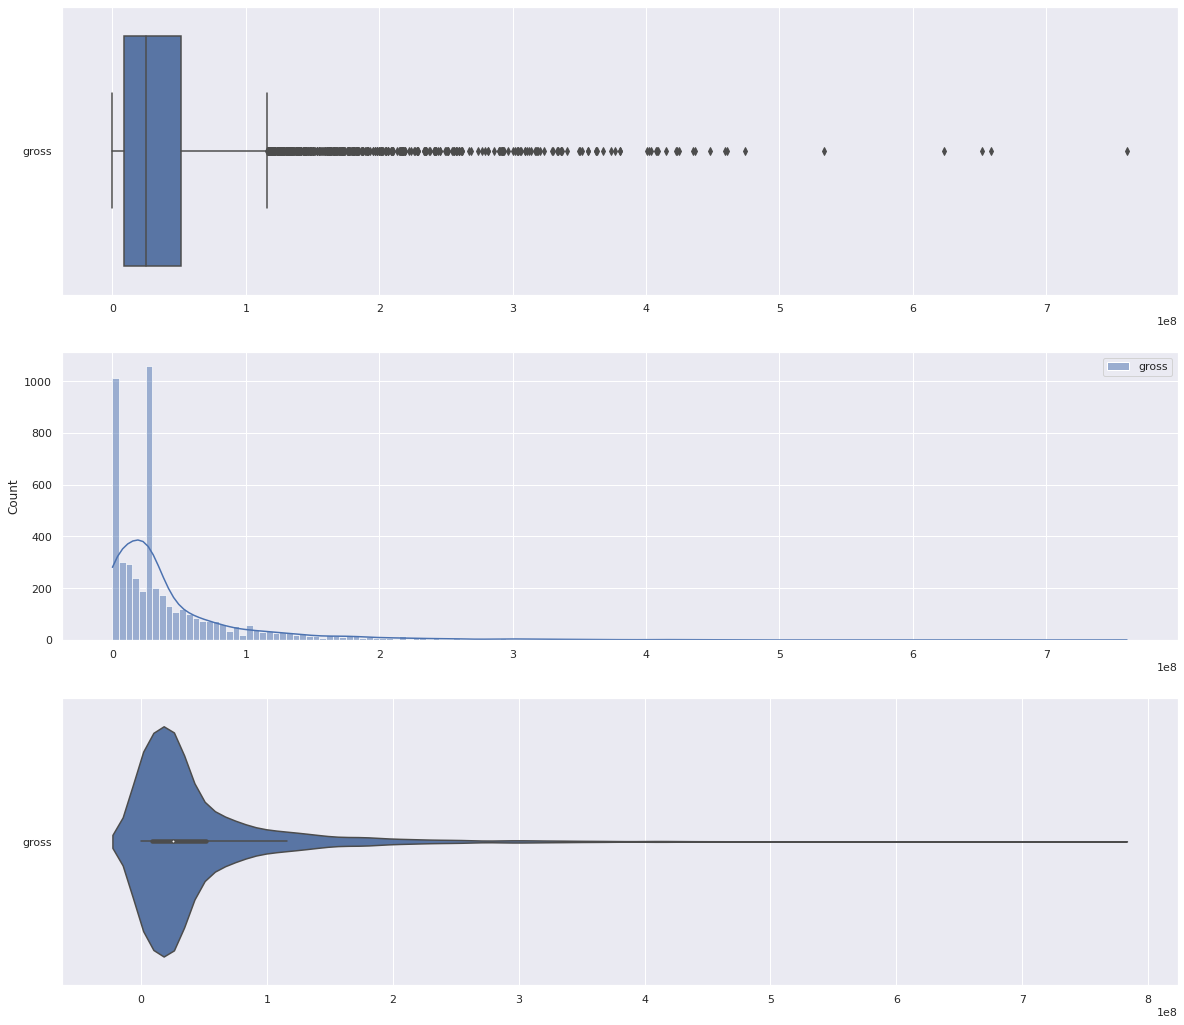

In [ ]:
f, axes = plt.subplots(3,1, figsize=(20,18)) 

sb.boxplot(data = gross, orient = 'h', ax=axes[0]);
sb.histplot(data = gross, ax=axes[1], kde=True);
sb.violinplot(data = gross, orient = 'h', ax=axes[2]);

From the distribution plots above, we note that `gross` has many outliers that lie outside of its whiskers (1.5 * IQR) and also have very fat right tails which indicate high positive skewness. This could prove to be a problem later when we pass it as input to our ML model but we'll deal with the scaling later on.

## 4. EDA for Numerical Features

To analyze numerical values we will plot the following:
1. Box, Histogram, Violin Plots for All Features
2. Correlation Matrix for Numerical Features with `gross`
3. Pair Plots between Numerical Features with `gross`

In [ ]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4998 non-null   float64
 1   duration                   4998 non-null   float64
 2   director_facebook_likes    4998 non-null   float64
 3   actor_3_facebook_likes     4998 non-null   float64
 4   actor_1_facebook_likes     4998 non-null   float64
 5   gross                      4998 non-null   float64
 6   num_voted_users            4998 non-null   int64  
 7   cast_total_facebook_likes  4998 non-null   int64  
 8   num_user_for_reviews       4998 non-null   float64
 9   budget                     4998 non-null   float64
 10  actor_2_facebook_likes     4998 non-null   float64
 11  imdb_score                 4998 non-null   float64
 12  movie_facebook_likes       4998 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 546.7 KB


#### Data Description
- `num_critic_for_reviews` represents the number of crtitical reviews 
- `duration` represents the running time of the movie in minutes
- `actor/director_facebook_likes` represents the number of Facebook likes of the actor/director
- `gross` is our response variable which we have already explored earlier
- `num_voted_users` represents the number of users who voted for the movie
- `cast_total_facebook_likes` represents the total number of Facebook likes of the entire cast of the movie
- `num_user_for_reviews` represents the number of users who gave a review
- `budget` represents the budget of the movie in dollars
- `imdb_score` represents the IMDB score of the movie on IMDB
- `movie_facebook_likes` represents the number of Facebook likes of the movie page

In [ ]:
numerical_df.describe().T

count          mean           std    min  \
num_critic_for_reviews     4998.0  1.395970e+02  1.209164e+02    1.0   
duration                   4998.0  1.072007e+02  2.521190e+01    7.0   
director_facebook_likes    4998.0  6.754964e+02  2.793896e+03    0.0   
actor_3_facebook_likes     4998.0  6.386658e+02  1.639613e+03    0.0   
actor_1_facebook_likes     4998.0  6.549140e+03  1.505247e+04    0.0   
gross                      4998.0  4.433719e+07  6.234076e+07  162.0   
num_voted_users            4998.0  8.347020e+04  1.380866e+05    5.0   
cast_total_facebook_likes  4998.0  9.676941e+03  1.816540e+04    0.0   
num_user_for_reviews       4998.0  2.715272e+02  3.770563e+02    1.0   
budget                     4998.0  3.782366e+07  1.967122e+08  218.0   
actor_2_facebook_likes     4998.0  1.640273e+03  4.026032e+03    0.0   
imdb_score                 4998.0  6.441056e+00  1.124107e+00    1.6   
movie_facebook_likes       4998.0  7.487430e+03  1.929073e+04    0.0   

                                  25%         50%          75%           max  
num_critic_for_reviews          50.00       110.0       193.00  8.130000e+02  
duration                        93.00       103.0       118.00  5.110000e+02  
director_facebook_likes          7.00        49.0       189.00  2.300000e+04  
actor_3_facebook_likes         134.00       371.5       634.75  2.300000e+04  
actor_1_facebook_likes         613.00       986.0     11000.00  6.400000e+05  
gross                      8382841.25  25517500.0  51376923.25  7.605058e+08  
num_voted_users               8560.00     34260.5     96120.75  1.689764e+06  
cast_total_facebook_likes     1405.50      3085.5     13740.50  6.567300e+05  
num_user_for_reviews            65.00       156.0       323.00  5.060000e+03  
budget                     7000000.00  20000000.0  40000000.00  1.221550e+10  
actor_2_facebook_likes         281.00       595.0       912.75  1.370000e+05  
imdb_score                       5.80         6.6         7.20  9.500000e+00  
movie_facebook_likes             0.00       162.5      3000.00  3.490000e+05

Likewise, we note that our numerical features have vastly different ranges and also have very high standard deviations across the board. 

### 4.1 Box, Histogram, Violin Plots for All Features

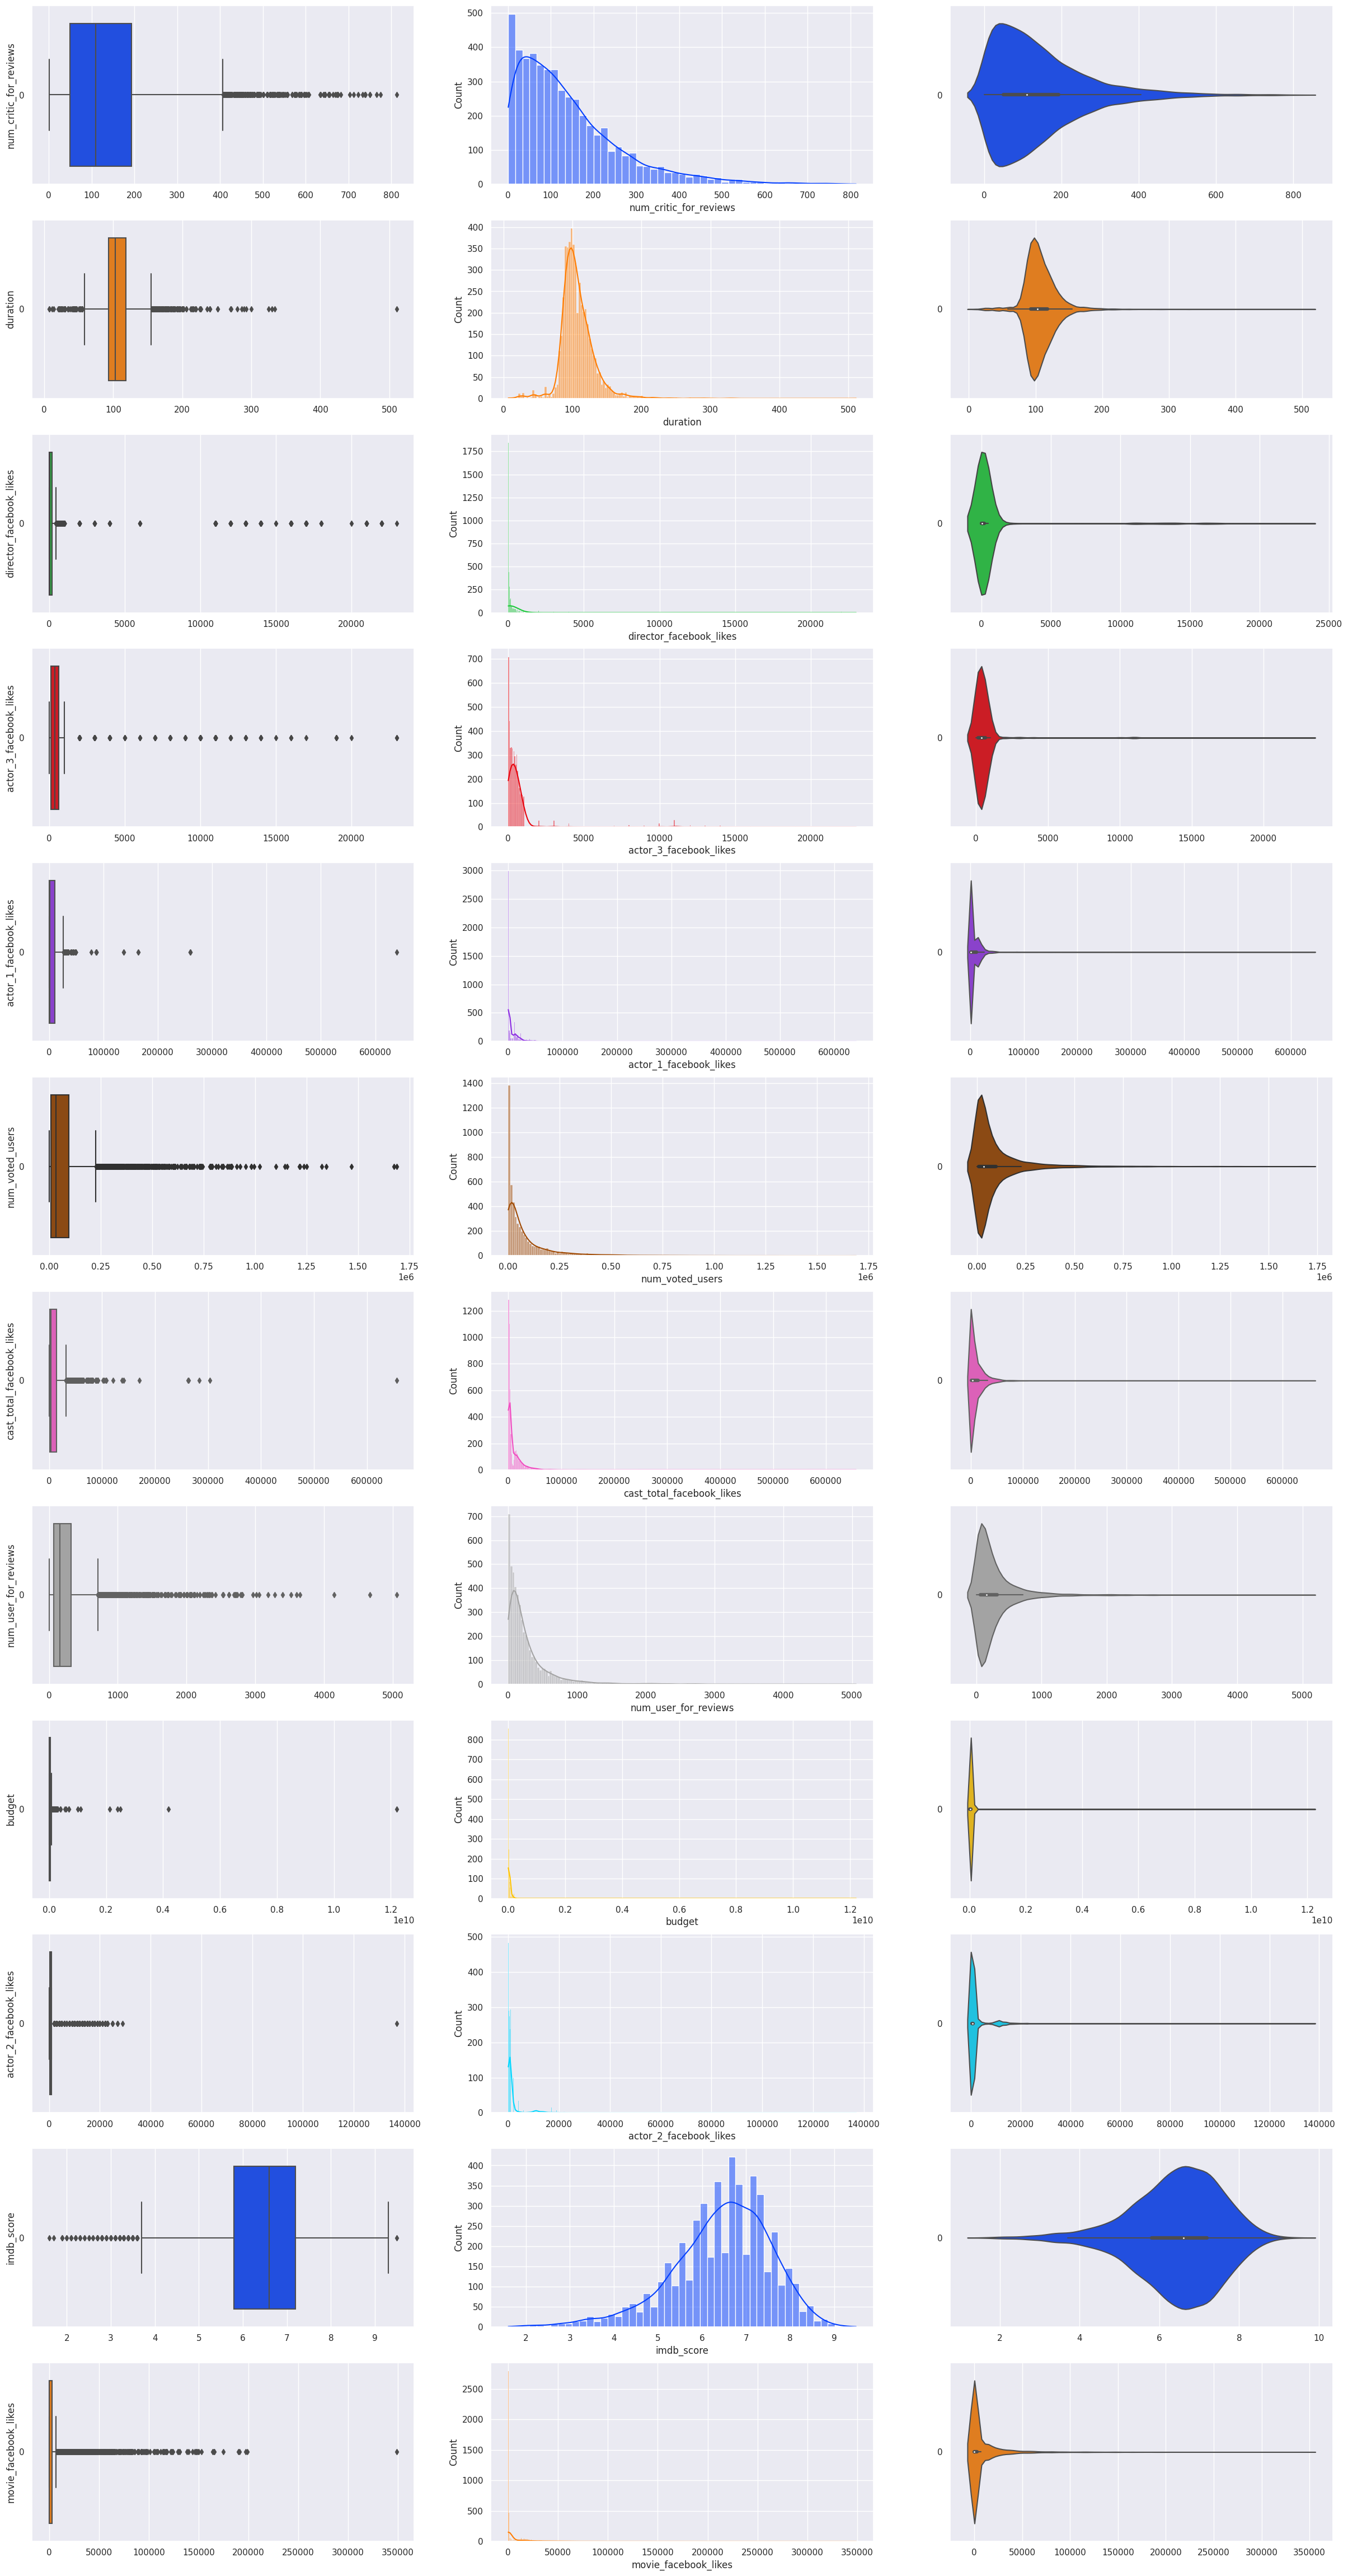

In [ ]:
# Draw the distributions of all variables
def numericalEDA(numerical_df):
    f, axes = plt.subplots(12, 3, figsize=(30,60), dpi=100)
    colors = sb.color_palette("bright", 12)

    count = 0
    for var in numerical_df:
        if var != 'gross':
            sb.boxplot(data = numerical_df[var], orient = "h", ax = axes[count,0], color=colors[count]);
            axes[count, 0].set_ylabel(var)

            sb.histplot(data = numerical_df[var], ax = axes[count,1], color=colors[count], kde=True);

            sb.violinplot(data = numerical_df[var], orient = "h", ax = axes[count,2], color=colors[count]);

            count += 1

numericalEDA(numerical_df)

Looking at the distributions, we do indeed see very positively skewed distributions with fat right tails and plenty of outliers. Unless we scale the features later, larger values might skew and dominate our ML models.

### 4.2 Correlation Matrix for Numerical Features with `gross`

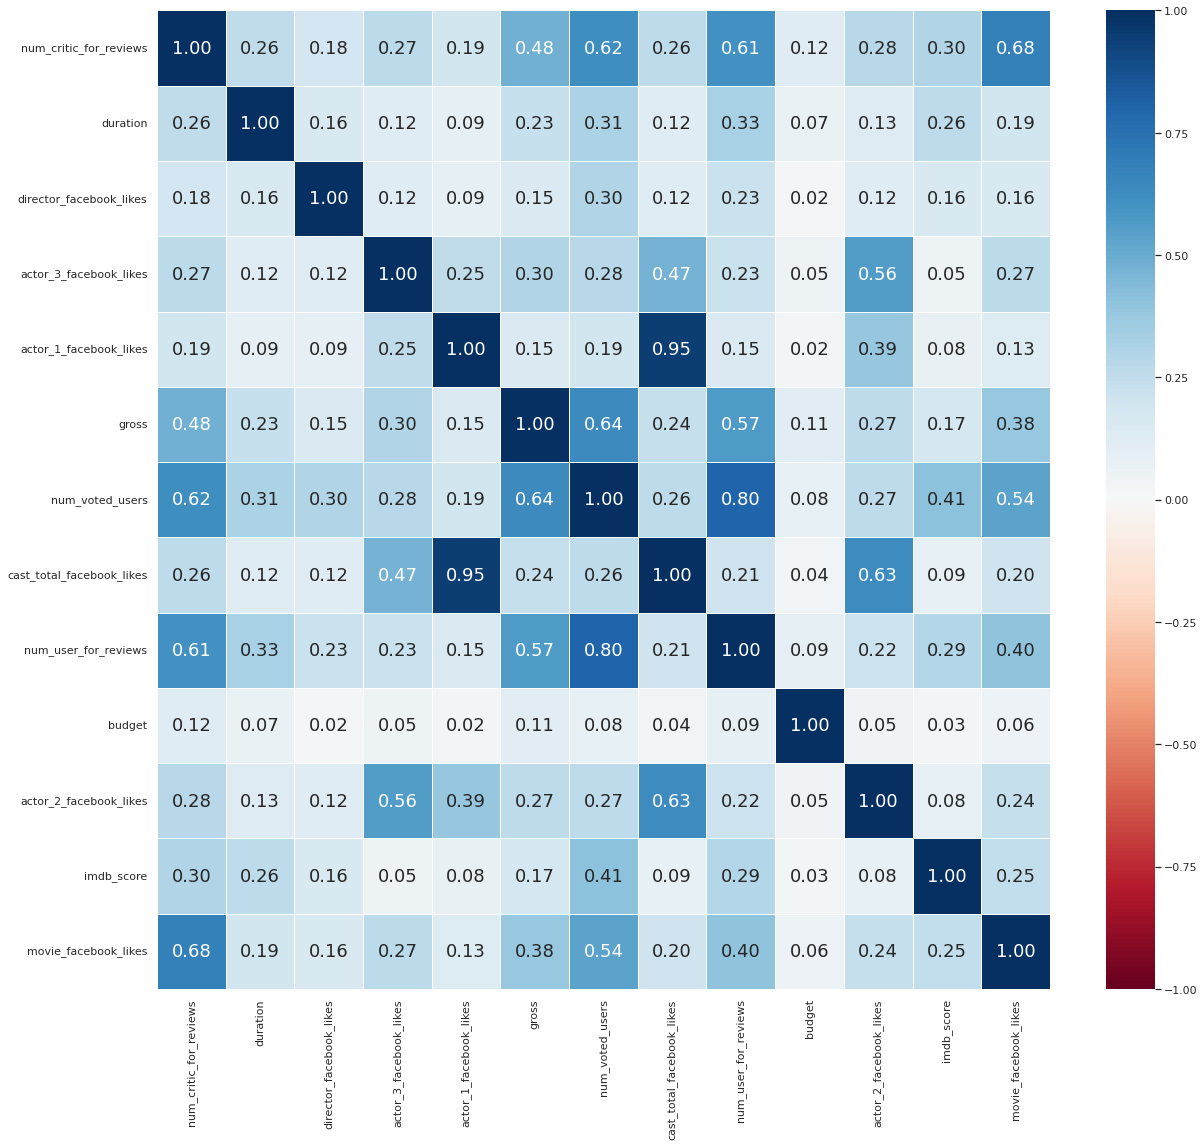

In [ ]:
f = plt.figure(figsize=(20, 18))
sb.heatmap(numerical_df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu");

We note from the heatmap that there are 3 features that are somewhat positively correlated with gross. 
1. `num_voted_users` correlation coefficient of $0.64$
2. `num_user_for_reviews` correlation coefficient of $0.57$
3. `num_critic_for_reviews` correlation coefficient of $0.48$
This indicates some form of dependence of gross on these variables.

### 4.3 Scatter Plots between Numerical Features and `gross`

In [ ]:
numerical_df_wo_gross = [var for var in numerical_df if var != 'gross']

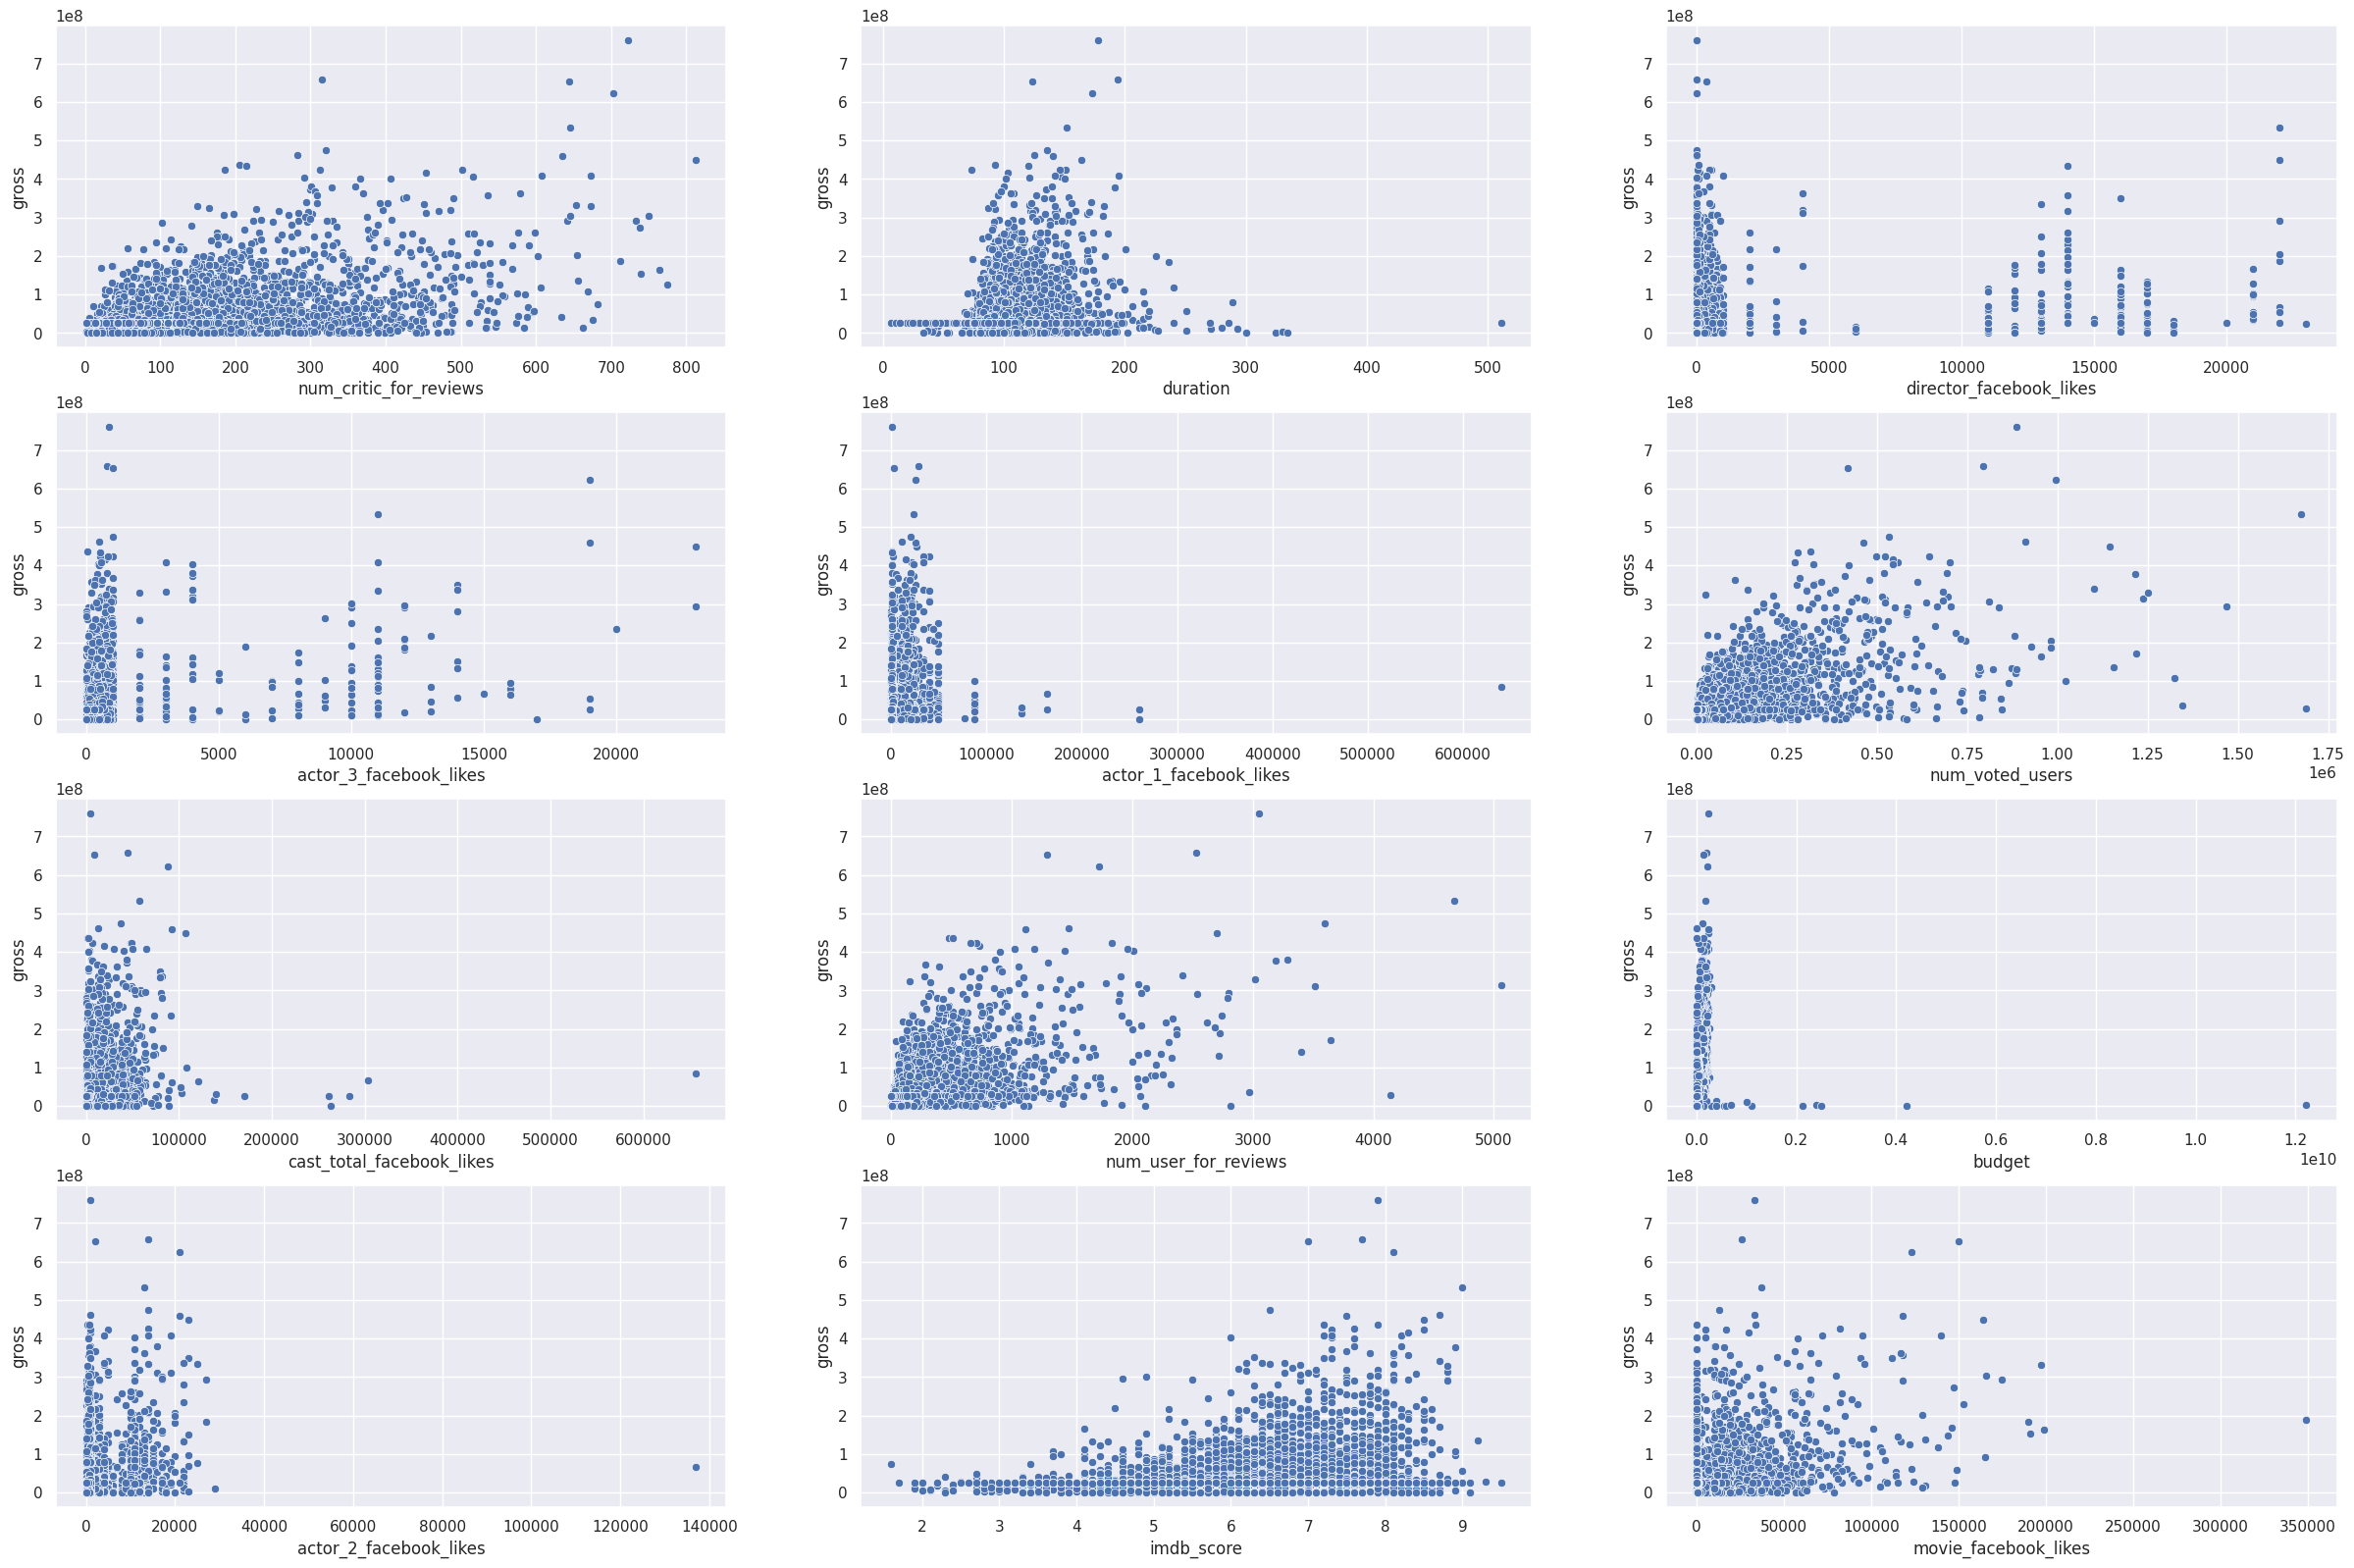

In [ ]:
f, axes = plt.subplots(4, 3, figsize=(30,20), dpi=100)

count = 0
for i in range(4):
    for j in range(3):
        sb.scatterplot(x=numerical_df_wo_gross[count], y='gross', data=df, ax=axes[i, j]);
        count += 1

On the scatter plot, we see the relationship between the 3 features with the highest positive correlation (`num_voted_users`, `num_user_for_reviews` dand `num_critic_for_reviews`) and `gross` play out. As the features increase in value, `gross` somewhat increases as well.

## 5. EDA for Categorical features

In [ ]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   color                 4998 non-null   category
 1   facenumber_in_poster  4998 non-null   category
 2   language              4998 non-null   category
 3   country               4998 non-null   category
 4   content_rating        4998 non-null   category
 5   title_year            4998 non-null   category
 6   aspect_ratio          4998 non-null   category
 7   director_count        4998 non-null   category
 8   actor_1_count         4998 non-null   category
 9   actor_2_count         4998 non-null   category
 10  actor_3_count         4998 non-null   category
 11  Action                4998 non-null   category
 12  Adventure             4998 non-null   category
 13  Animation             4998 non-null   category
 14  Biography             4998 non-null   category
 15  Come

### Data Descriptiond
- `color` is a string which represents film coloriaztion. 'Black and white' or 'Color'
- `facenumber_in_poster` is an integer which represents the number of actors who featured in the movie poster
- `language` is a string which represents the language the movie was shot in
- `country` isd a string which represents the country where the movie is produced
- `content_rating` is a string which represents content rating of the movie
- `title_year` is an integer which represents the year which the movie is released
- `aspect_ratio` is a float which represents the aspect ratio the movie was made in
- `director/actor_count` is an integer which represents the total number of movies in this dataset a specific director has directed/actor has acted in
- `Action` ... `Western` is an integer (0 or 1) which represents the one hot encoded genre categories
- `genres_count` is an integer which represents the number of genres a movie can be categorized in
- `main_keyword` is a string which represents the main keyword of a movie e.g 'alien', 'boy' etc
- `main_keyword_count` is an integer which represents the total number of movies in this dataset that also has this specific main keyword as its main keyword

In [ ]:
categorical_df.describe().T

count unique          top    freq
color                   4998      2        Color    4791
facenumber_in_poster  4998.0   19.0          0.0  2149.0
language                4998     47      English    4674
country                 4998     65          USA    3778
content_rating          4998     18            R    2399
title_year            4998.0   91.0       2009.0   365.0
aspect_ratio          4998.0   22.0         2.35  2664.0
director_count          4998     21            1    1513
actor_1_count           4998     34            1    1369
actor_2_count           4998     15            1    2104
actor_3_count           4998      9            1    2669
Action                  4998      2            0    3855
Adventure               4998      2            0    4084
Animation               4998      2            0    4756
Biography               4998      2            0    4706
Comedy                  4998      2            0    3136
Crime                   4998      2            0    4115
Documentary             4998      2            0    4877
Drama                   4998      2            1    2571
Family                  4998      2            0    4454
Fantasy                 4998      2            0    4394
Film-Noir               4998      2            0    4992
Game-Show               4998      2            0    4997
History                 4998      2            0    4793
Horror                  4998      2            0    4442
Music                   4998      2            0    4786
Musical                 4998      2            0    4866
Mystery                 4998      2            0    4505
News                    4998      2            0    4995
Reality-TV              4998      2            0    4996
Romance                 4998      2            0    3900
Sci-Fi                  4998      2            0    4387
Short                   4998      2            0    4993
Sport                   4998      2            0    4817
Thriller                4998      2            0    3602
War                     4998      2            0    4787
Western                 4998      2            0    4904
genres_count          4998.0    8.0          3.0  1613.0
main_keyword            4998   2064  No keywords     152
main_keyword_count    4998.0   35.0          1.0  1382.0

### `color`

<Figure size 1000x2000 with 0 Axes>

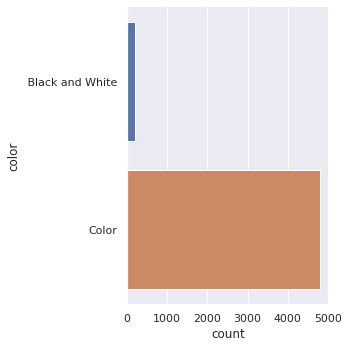

In [ ]:
plt.figure(figsize=(5,10), dpi=200)
sb.catplot(data=categorical_df, y='color', kind='count');
plt.show();

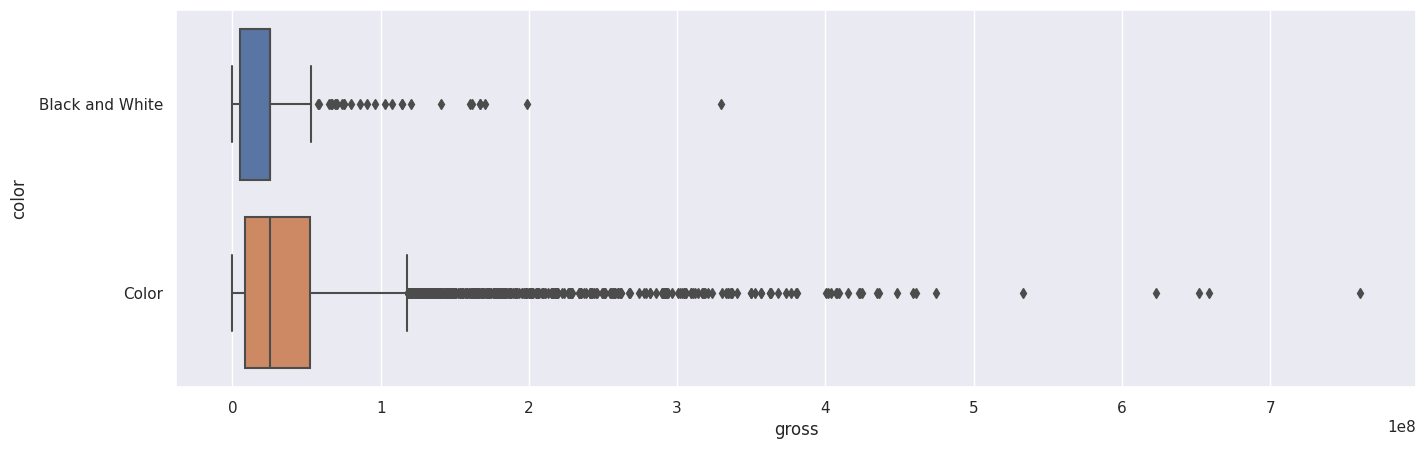

In [ ]:
plt.figure(figsize=(16,5), dpi=(100))
sb.boxplot(data=df, y='color', x='gross');

We see that there is high class imbalance, most movies are colored and colored movies tend to gross more.

### `facenumber_in_poster`

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel

<Figure size 1000x4000 with 0 Axes>

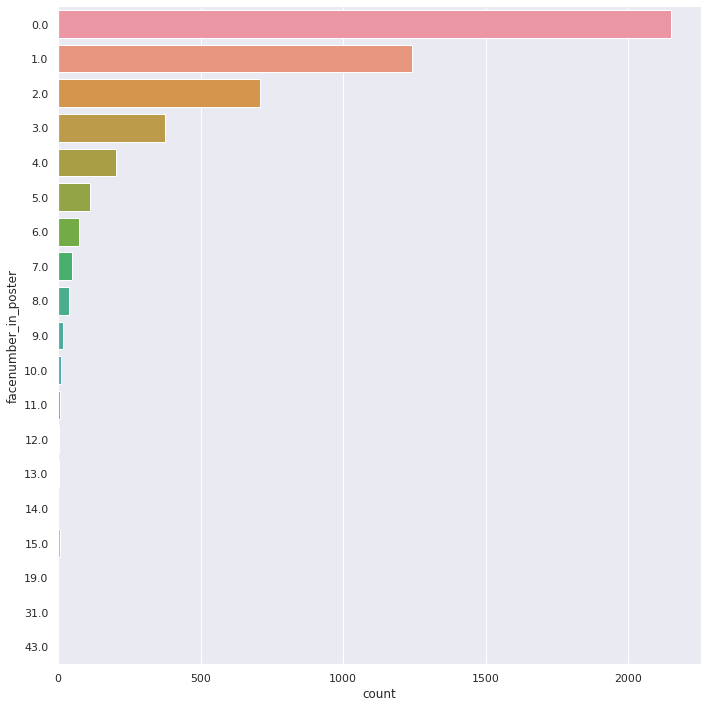

In [ ]:
plt.figure(figsize=(5,20), dpi=200)
sb.catplot(data=categorical_df, y='facenumber_in_poster', kind='count',height=10);
plt.show();

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


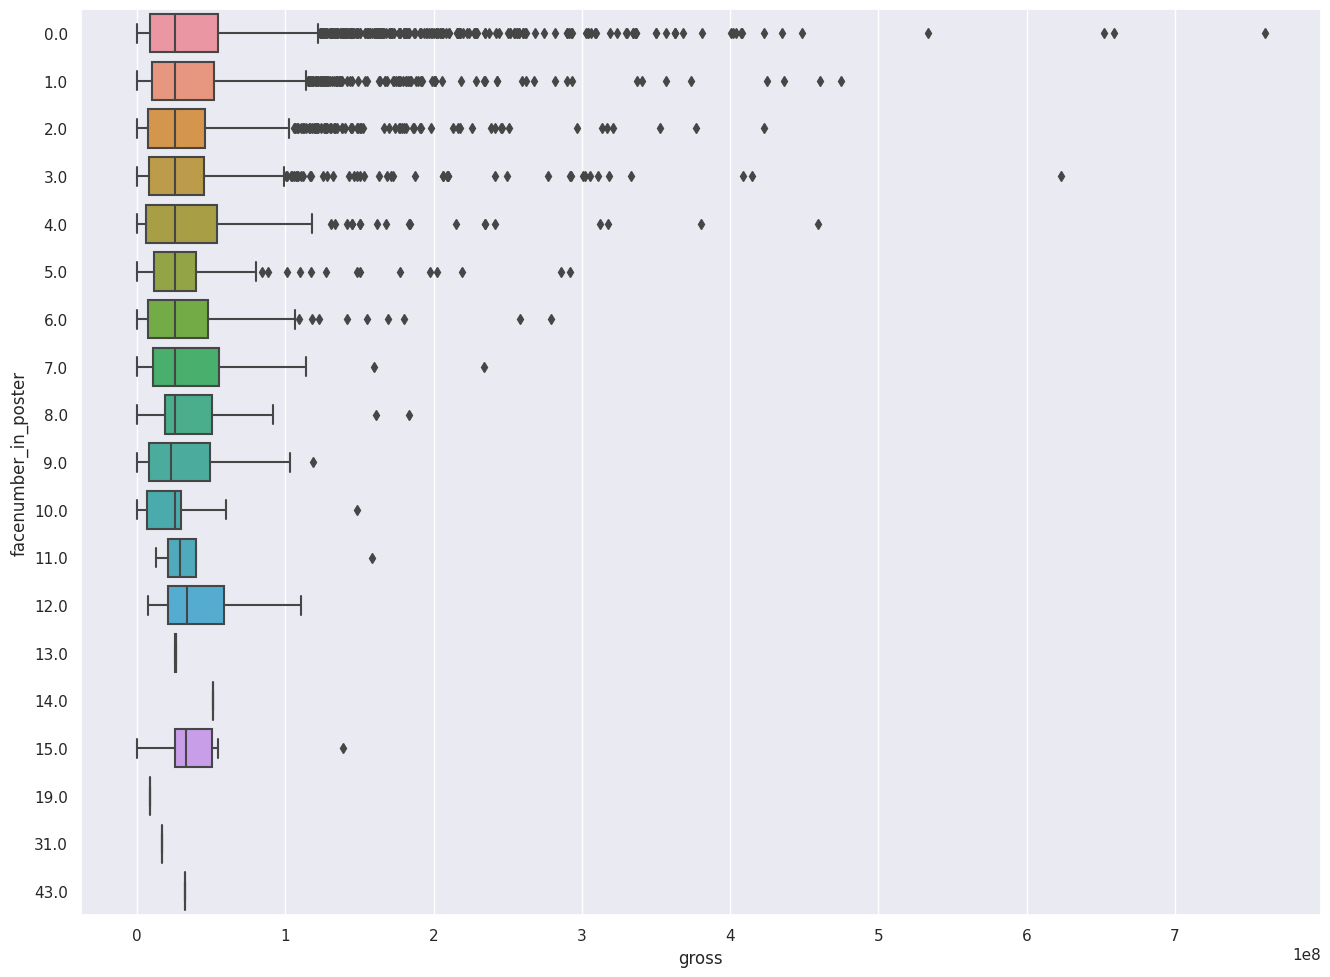

In [ ]:
plt.figure(figsize=(16,12), dpi=100)
sb.boxplot(data=df, y='facenumber_in_poster', x='gross');

Movie posters can have a range of actors featured in their posters (0-40) with majority of movies only having 0-3 actors featured. Again we see some form of class imbalance

There is no clear trend in `gross`'s mean across difference `facenumber_in_poster` counts. This means that `gross` may not be a function of the number of actors featured in a movie poster. But having said this, movies with posters containing 12-15 faces grossed the most.

### `language`

<Figure size 1200x800 with 0 Axes>

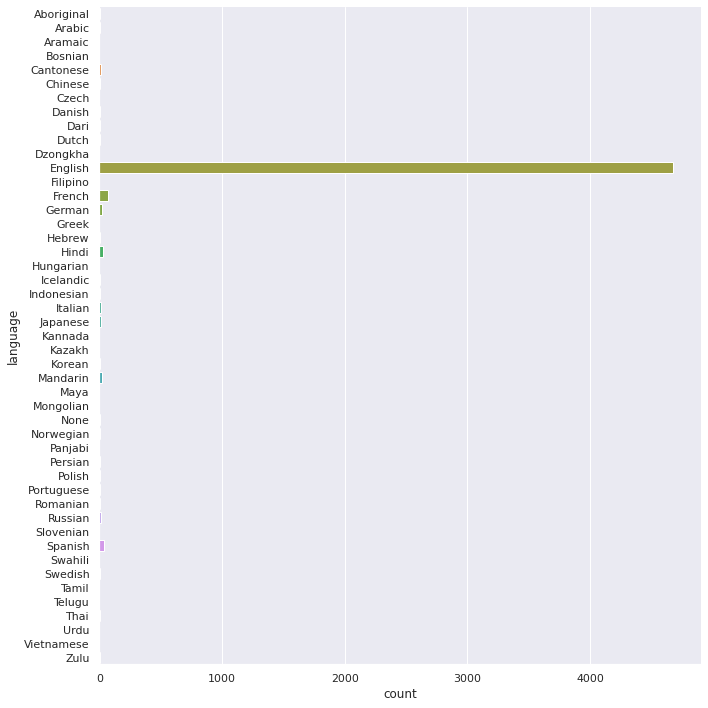

In [ ]:
plt.figure(dpi=200)
sb.catplot(data=categorical_df, y='language', kind='count', height=10);
plt.show();

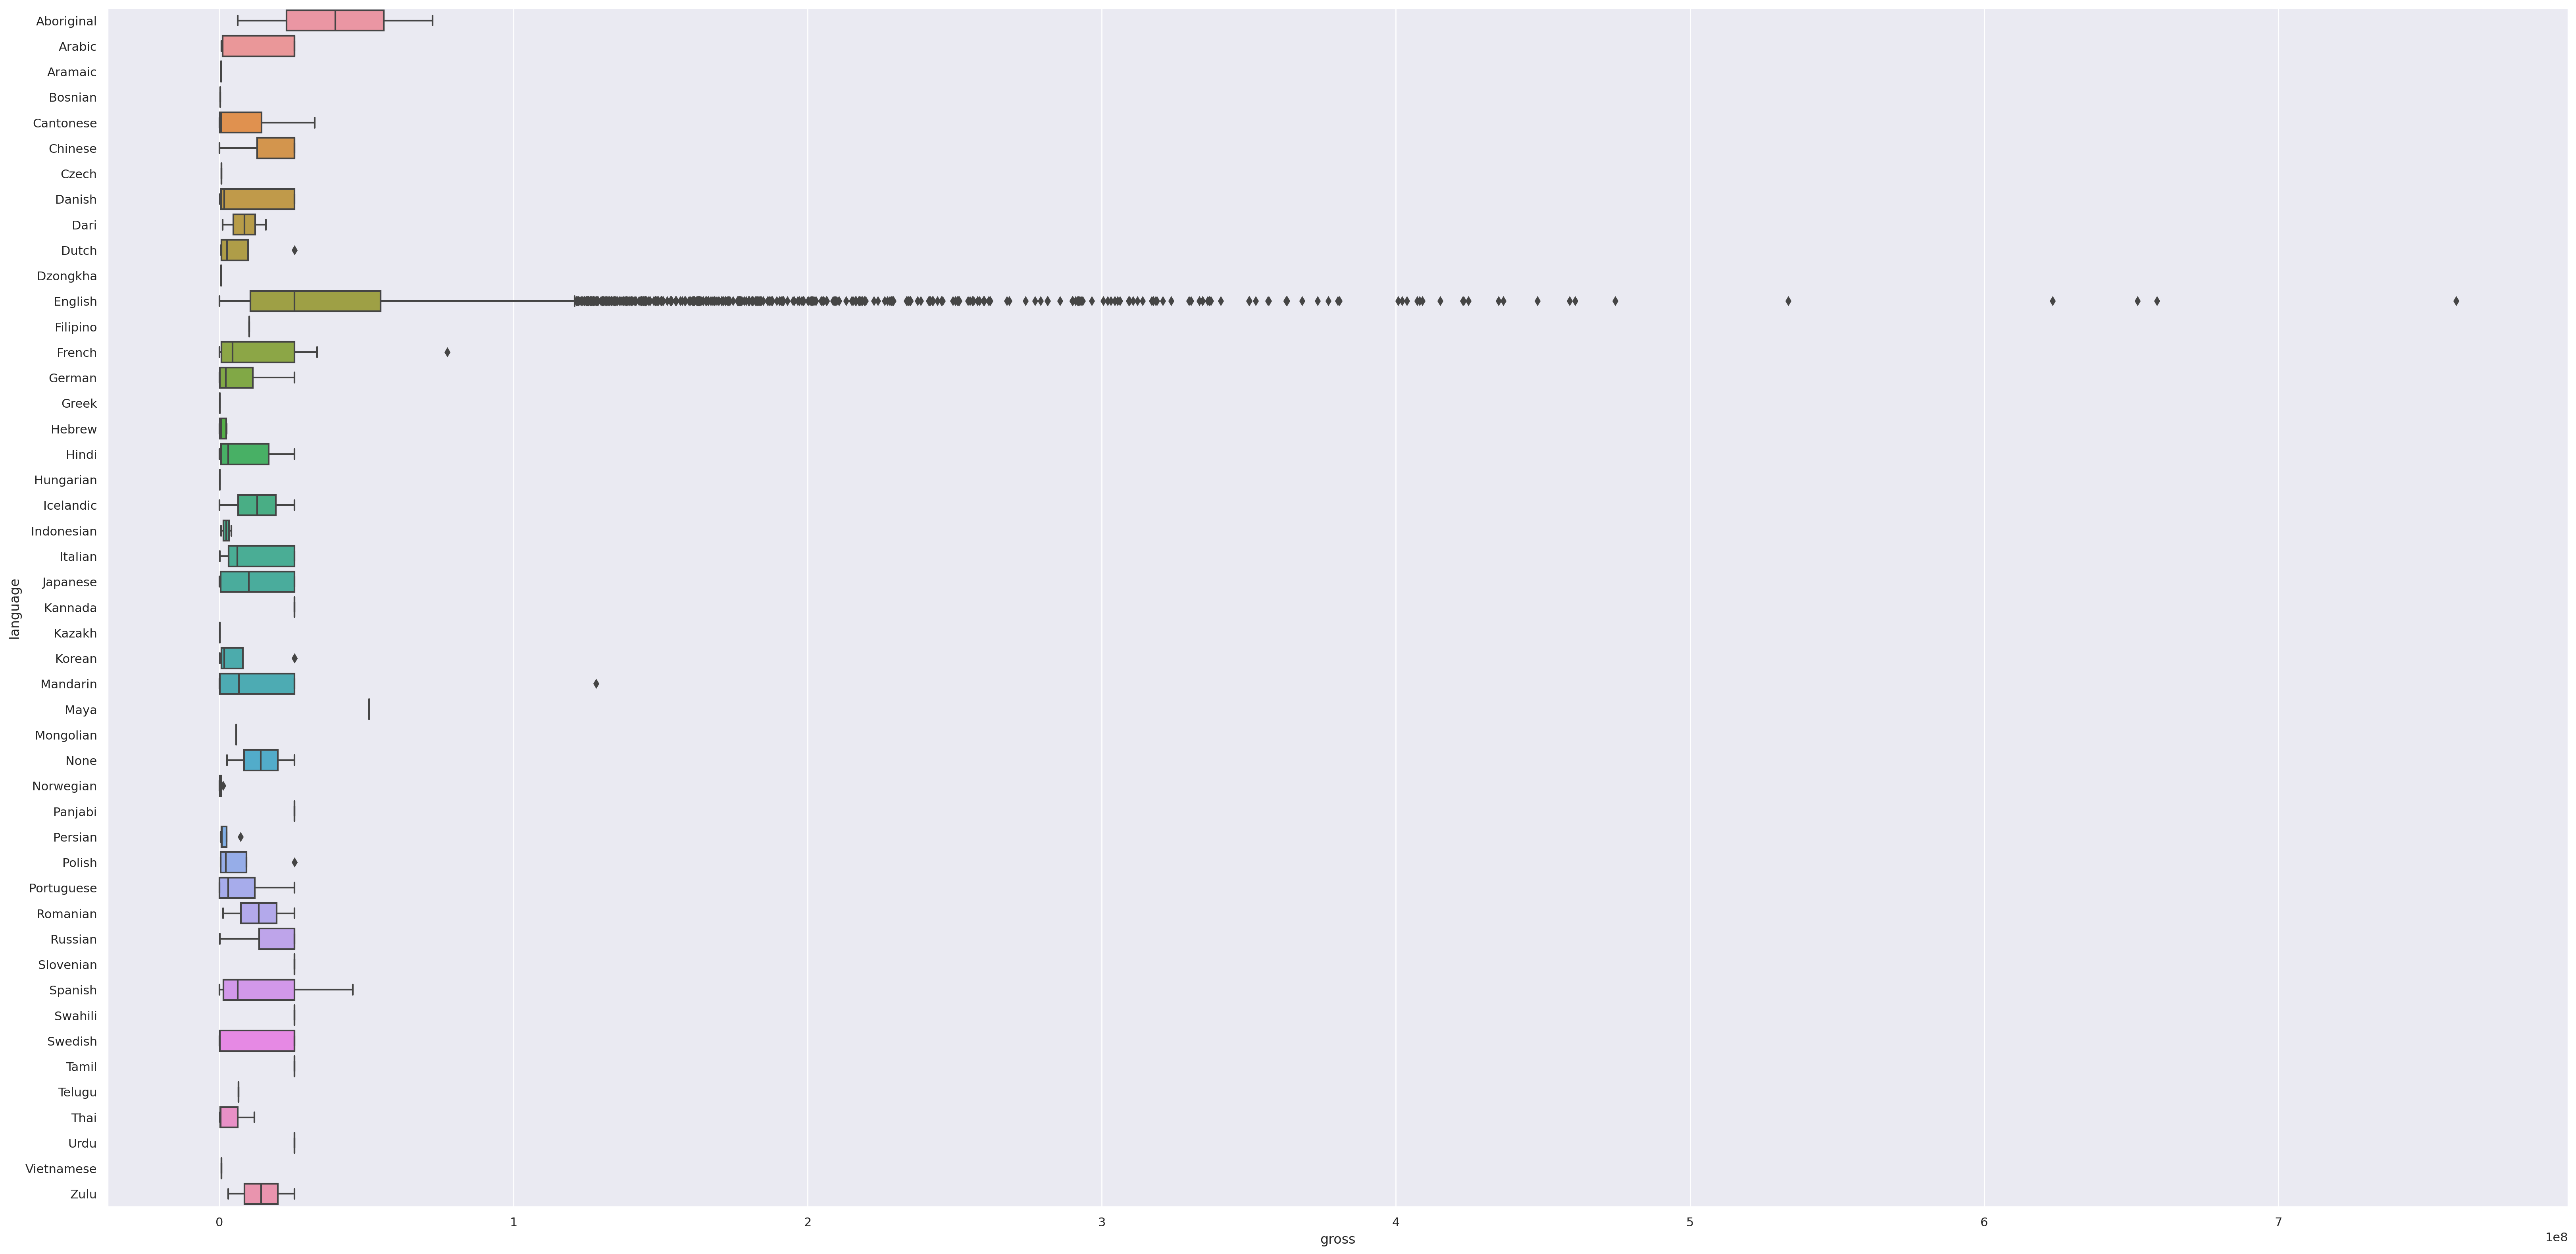

In [ ]:
plt.figure(figsize=(40,20), dpi=200)
sb.boxplot(data=df, y='language', x='gross');

Extreme class imblanace here, unsurprisingly most movies are in English.

English movies grossed the most. This is discounting arboginal's higher mean which may not be indicative due to its small sample size

### `country`

<Figure size 1200x800 with 0 Axes>

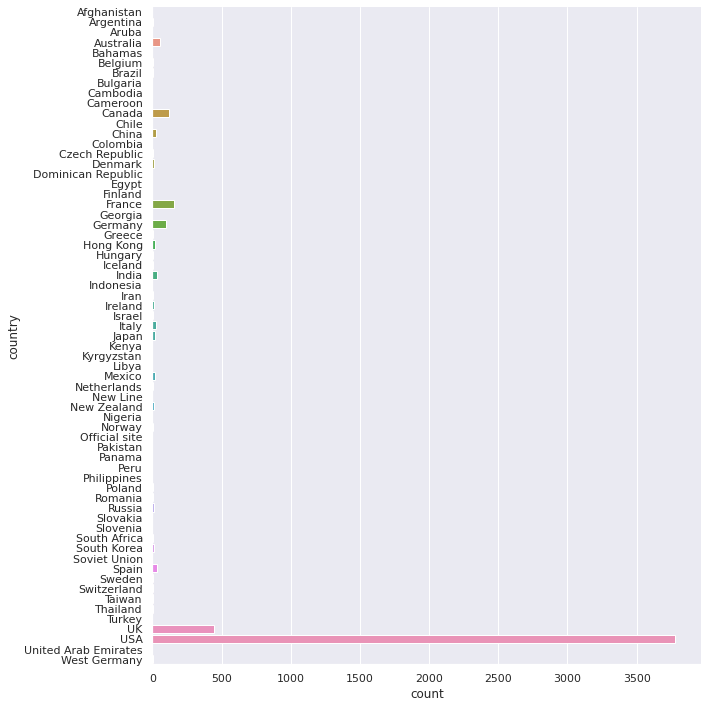

In [ ]:
plt.figure(dpi=200)
sb.catplot(data=categorical_df, y='country', kind='count', height=10);
plt.show();

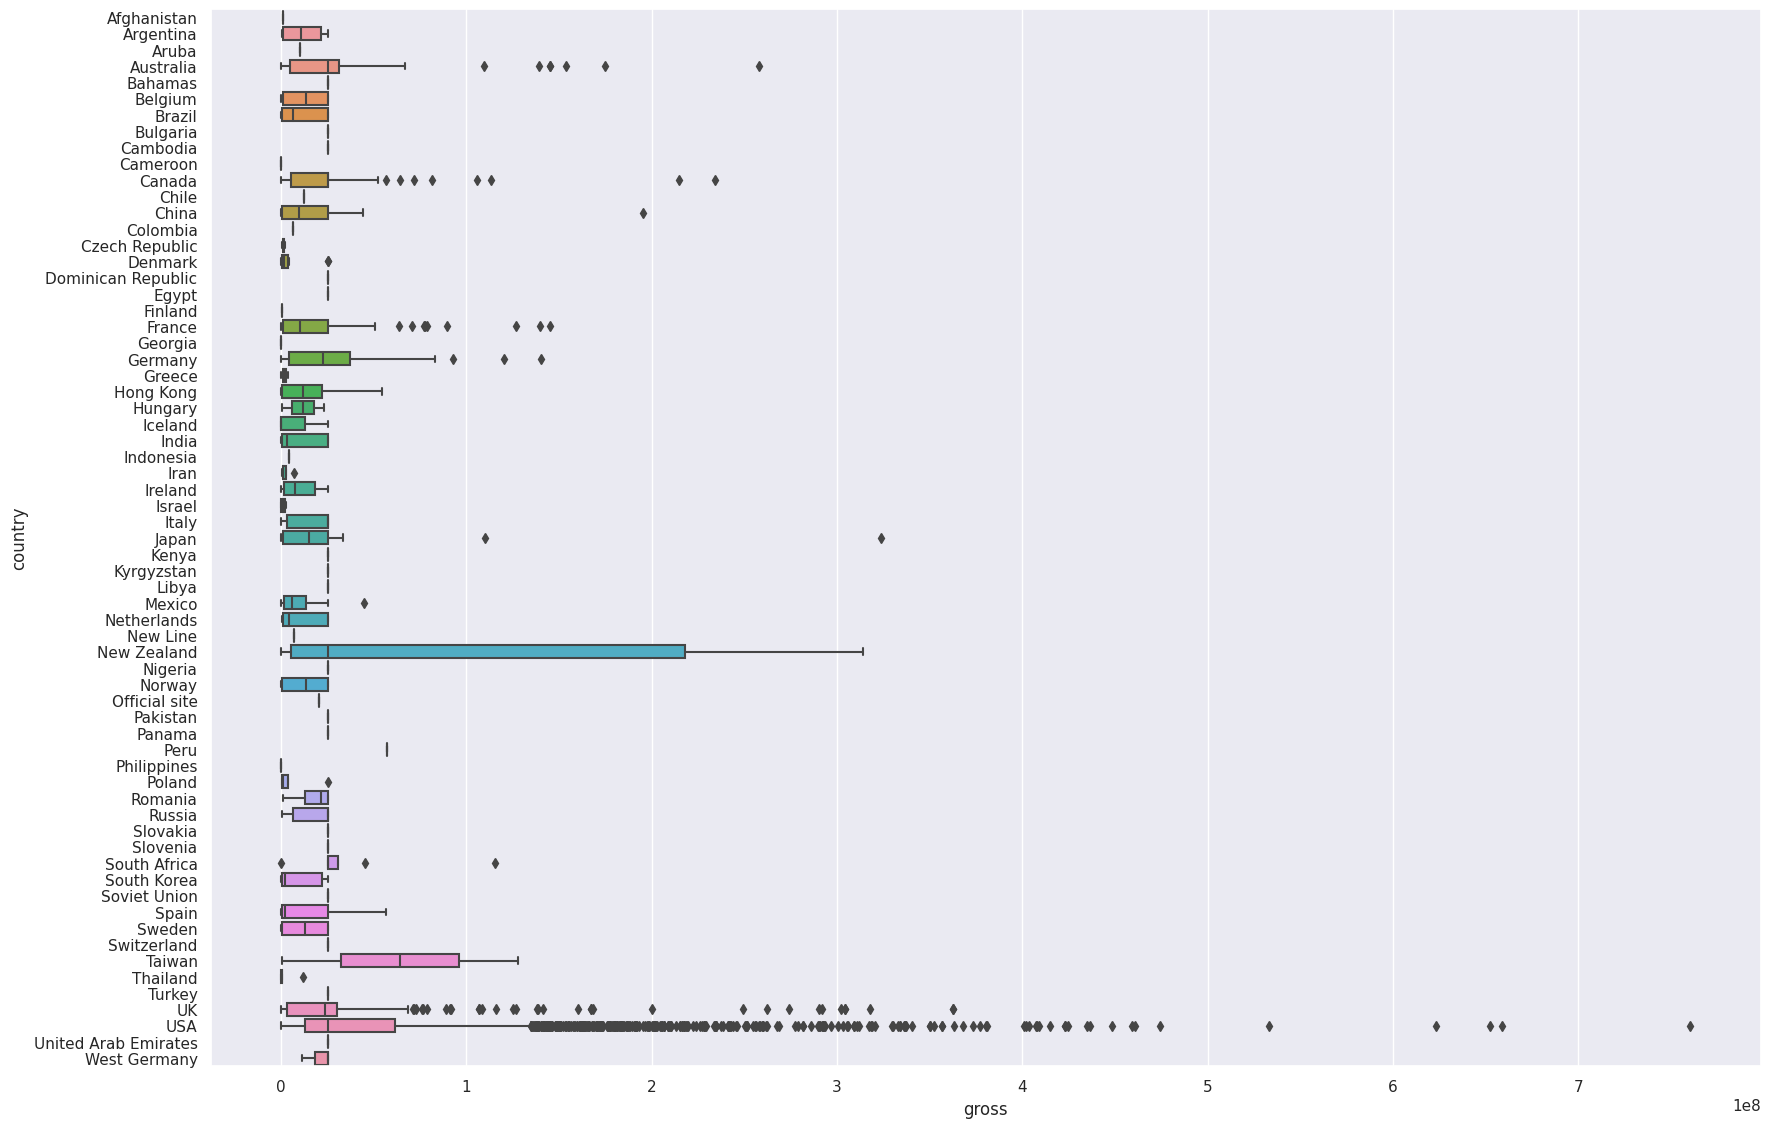

In [ ]:
plt.figure(figsize=(20, 14), dpi=100)
sb.boxplot(data=df, y='country', x='gross');

`country` also suffers from high class imblanace with US and UK producing the lion's share of movies.

Although there’s no clear trend as to which movies may do better given their country, USA has a lot more extreme outliers while Taiwan has the highest mean gross earnings.

### `title_year`

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel

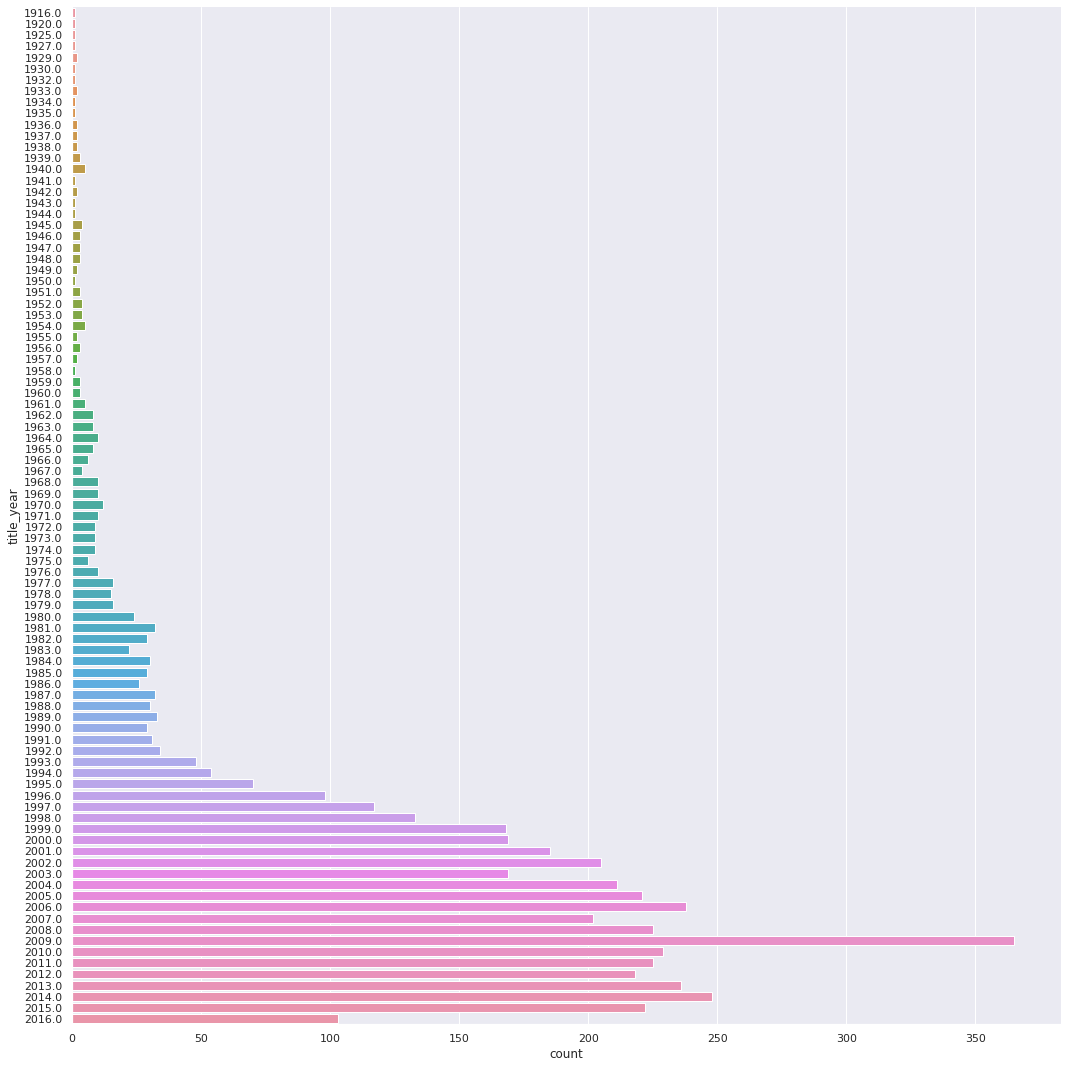

In [ ]:
sb.catplot(data=categorical_df, y='title_year', kind='count', height=15);

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


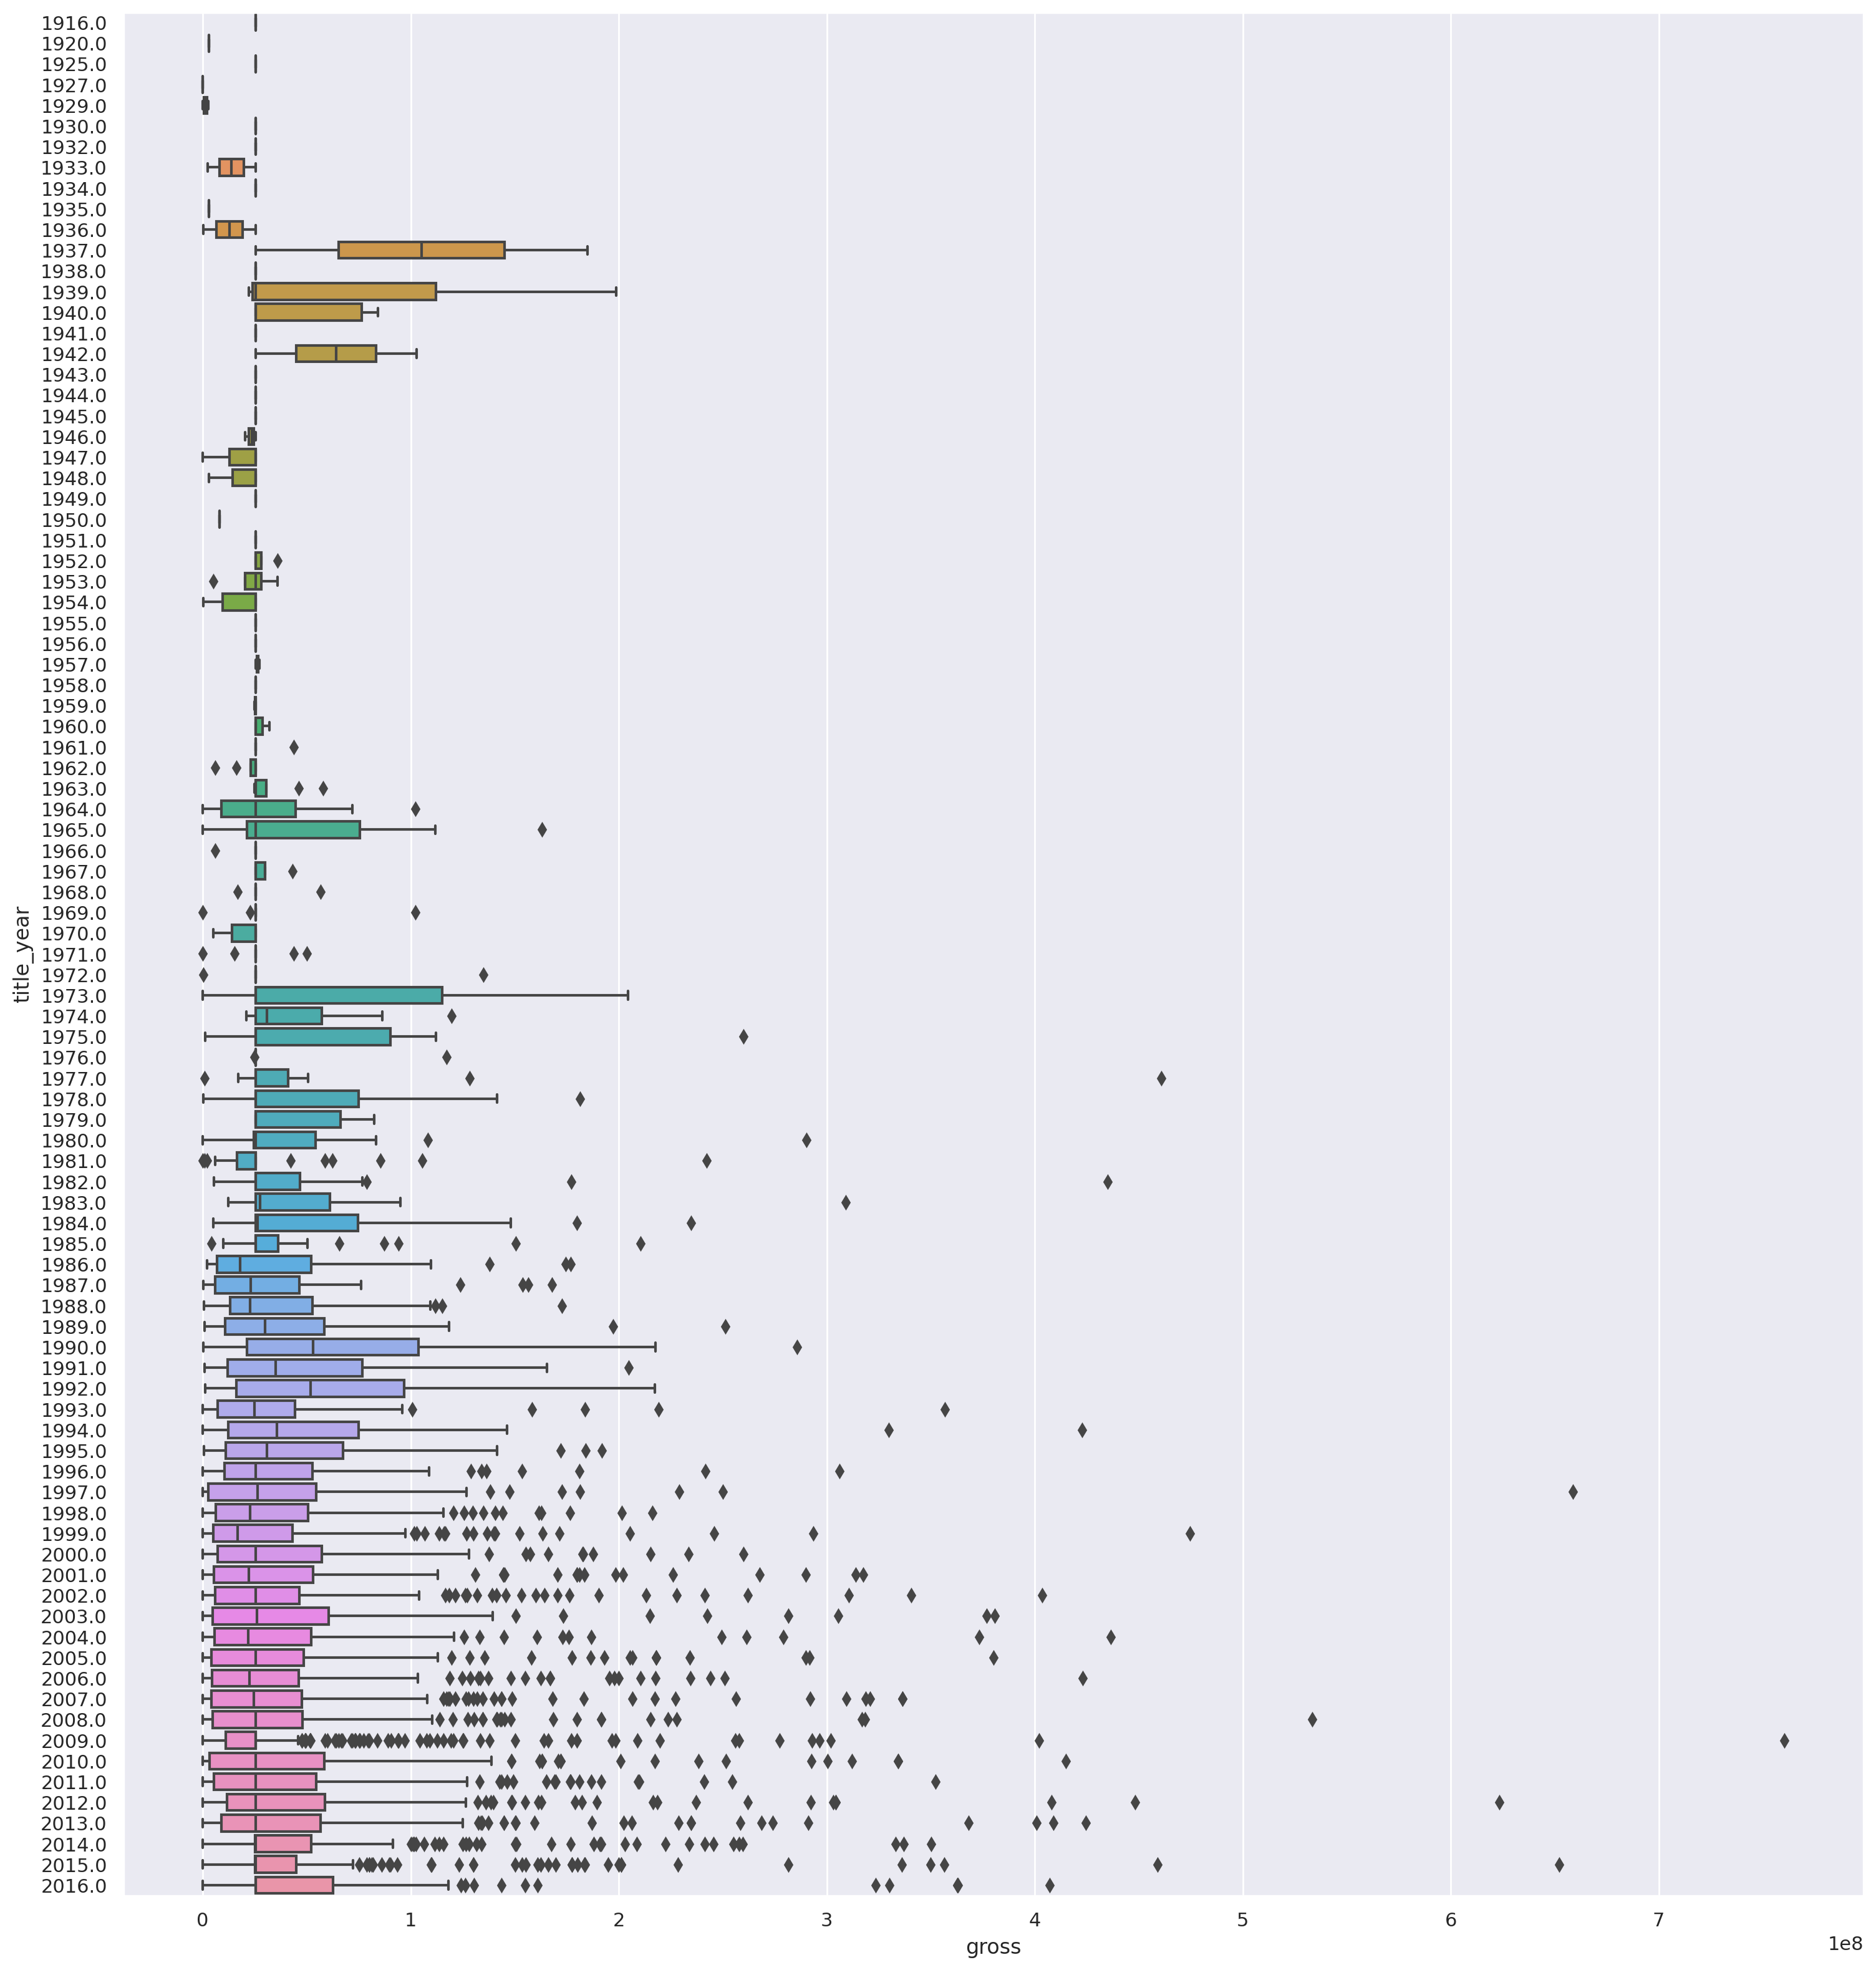

In [ ]:
plt.figure(figsize=(18,20), dpi=200)
sb.boxplot(data=df, y='title_year', x='gross');

As for when the movie is produced, majority of movies were produced after the year 2000 and the most number of movies made were in 09'.

Apart from the many outliers we notice, there’s no clear trend for in `gross`


### `aspect_ratio`

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel

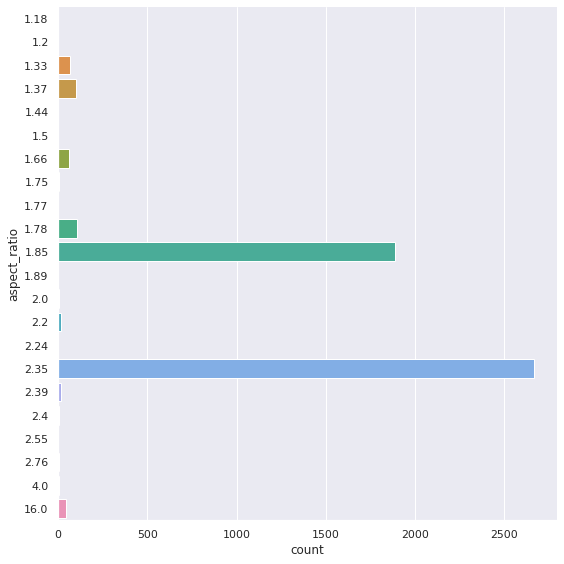

In [ ]:
sb.catplot(data=categorical_df, y='aspect_ratio', kind='count', height=8);

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


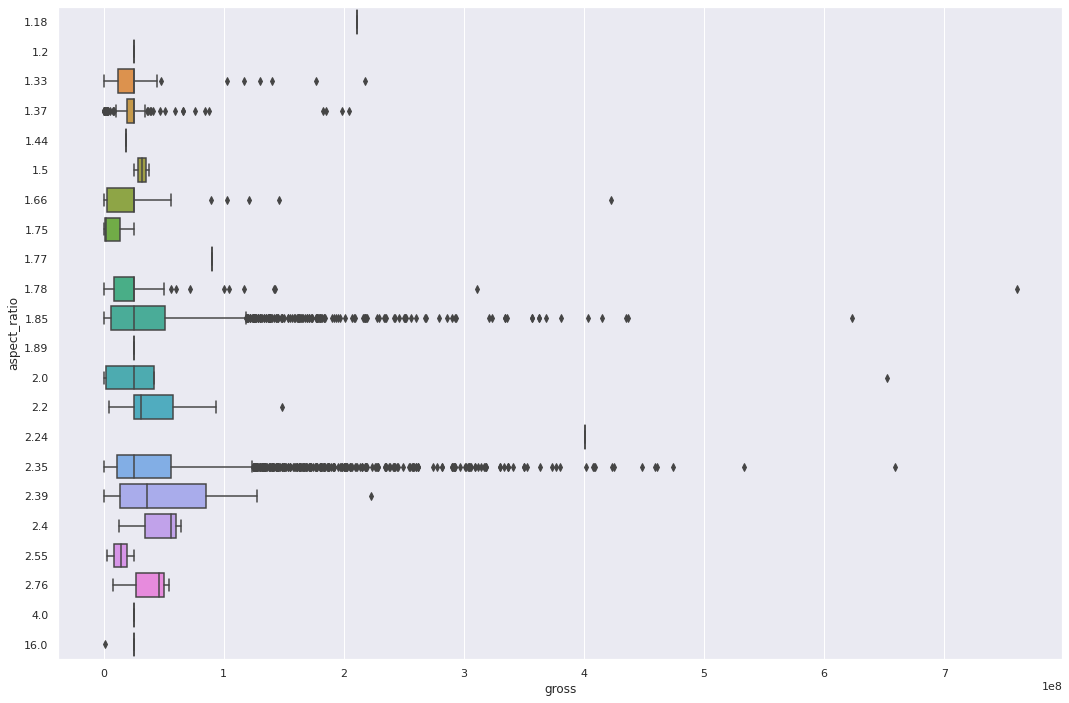

In [ ]:
plt.figure(figsize=(18,12))
sb.boxplot(data=df, y='aspect_ratio', x='gross');

Aspect ratio is the ratio of width : height of a movie. We see that 1.85 and 2.35 are the most popular.

However, 2.4 and 2.76 actually has the highest mean gross earnings. But its important to take these mean values with a pinch of salt as they do have a smaller sample size.

### `content rating`

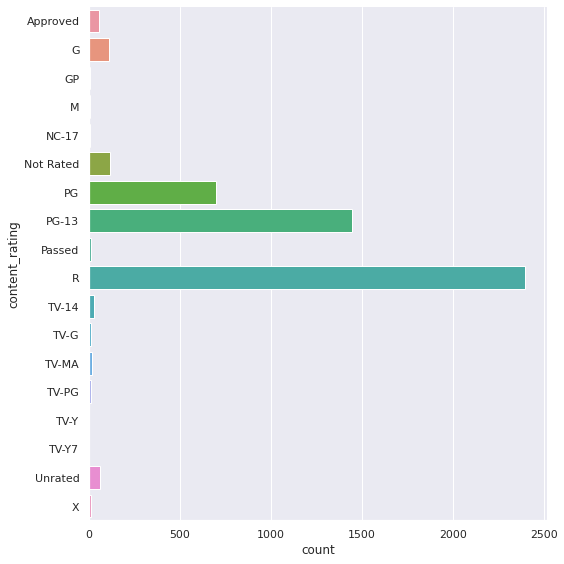

In [ ]:
sb.catplot(data=categorical_df, y='content_rating', kind='count', height=8);

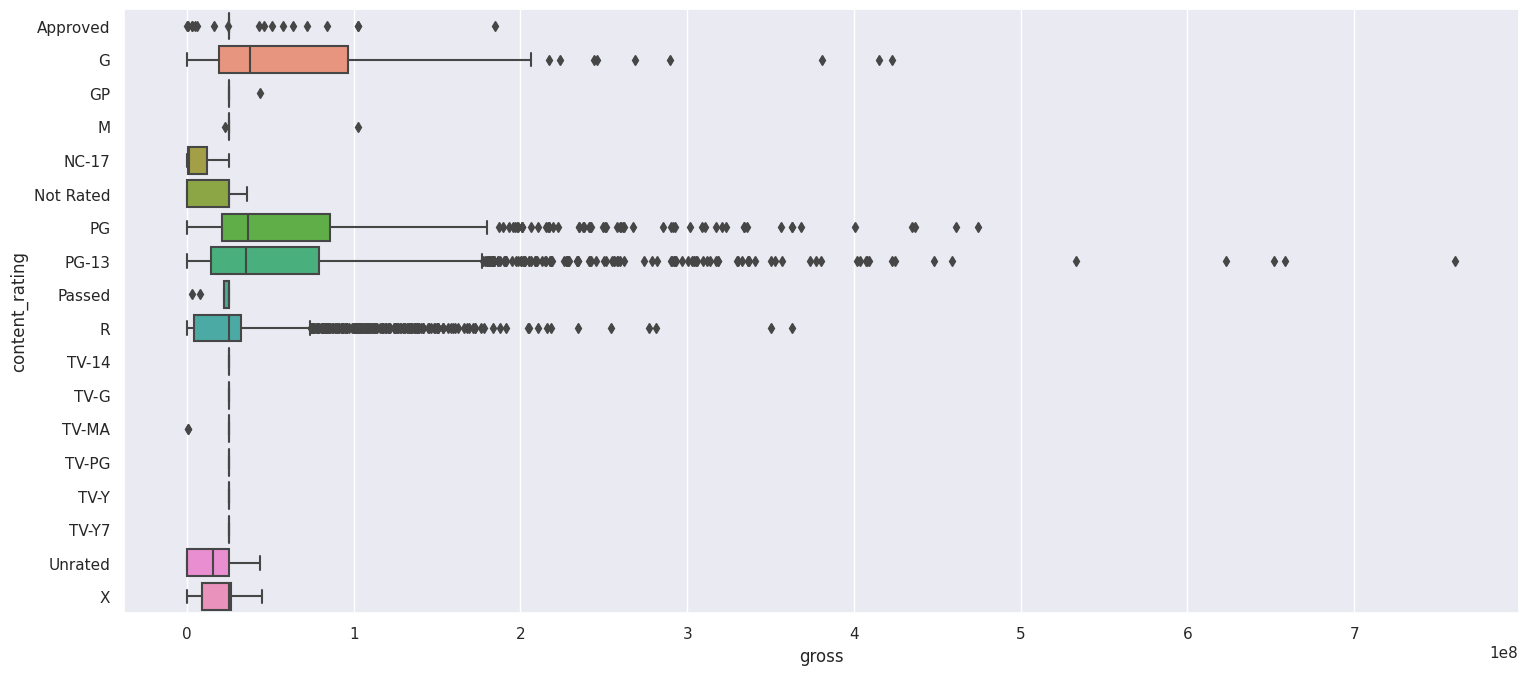

In [ ]:
plt.figure(figsize=(18,8), dpi=100)
sb.boxplot(data=df, y='content_rating', x='gross');

Most movies fall under R, PG-13 or PG content rating. However, from the box plots we see that movies rated G, PG and PG-13 actually grossed the most.

### `actor_1/2/3_count`

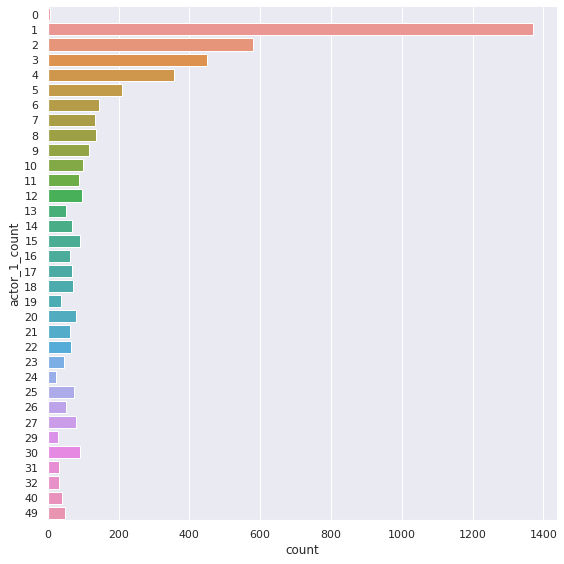

In [ ]:
sb.catplot(data=categorical_df, y='actor_1_count', kind='count', height=8);

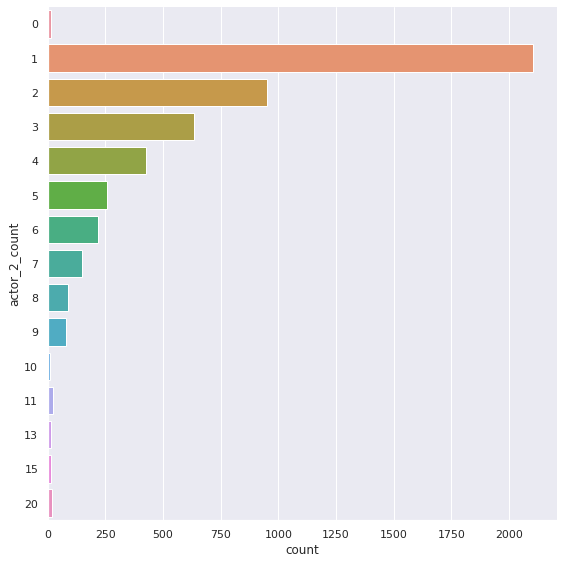

In [ ]:
sb.catplot(data=categorical_df, y='actor_2_count', kind='count', height=8);

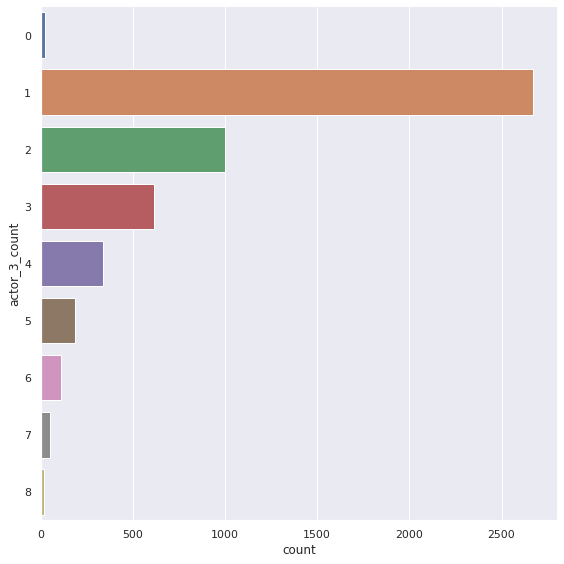

In [ ]:
sb.catplot(data=categorical_df, y='actor_3_count', kind='count', height=8);

Looking at the `actor_1/2/3_count` which is the count of how many movies a particular actor has acted in, we can draw some interesting conclusions:
1. Most movies have actors who have only appeared in 1-3 movies and a small proportion of movies have actors who appeared in multiple movies
2. Here we note that the max count decreases as we go from actor 1 -> actor 2 -> actor 3 implying that main actors are more likely to star again 


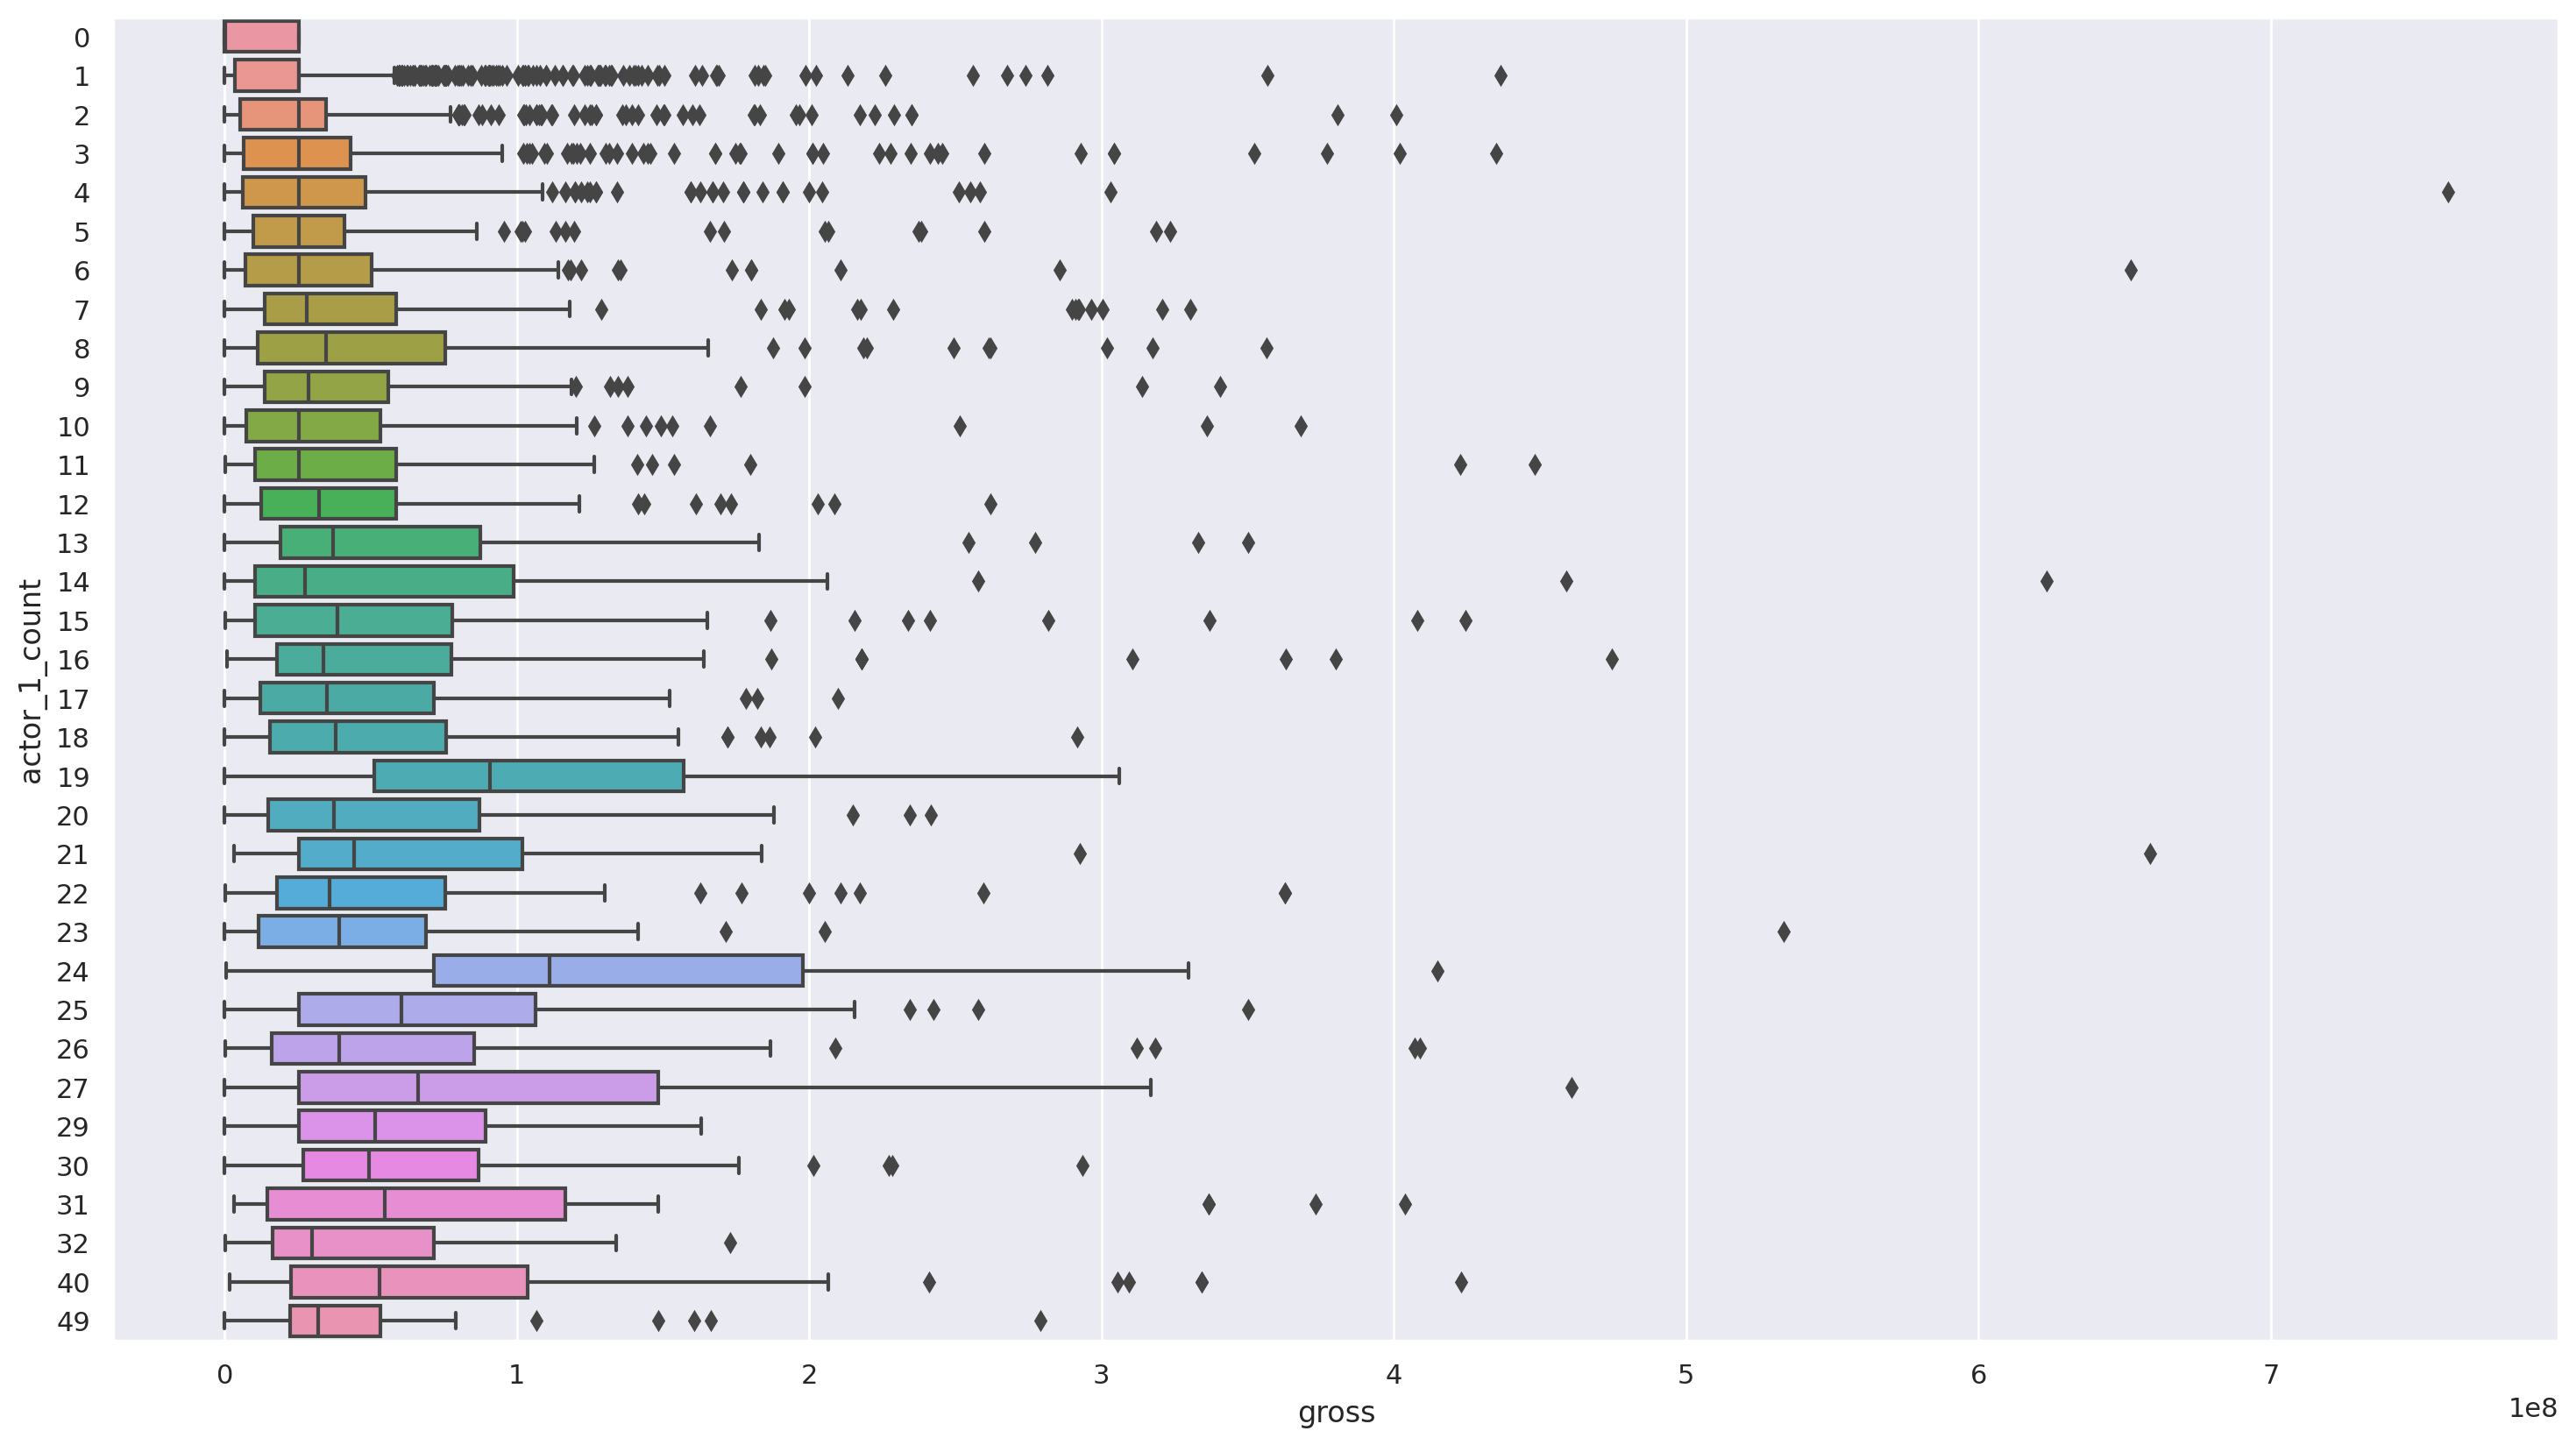

In [ ]:
plt.figure(figsize=(18,10), dpi=200)
sb.boxplot(data=df, y='actor_1_count', x='gross');

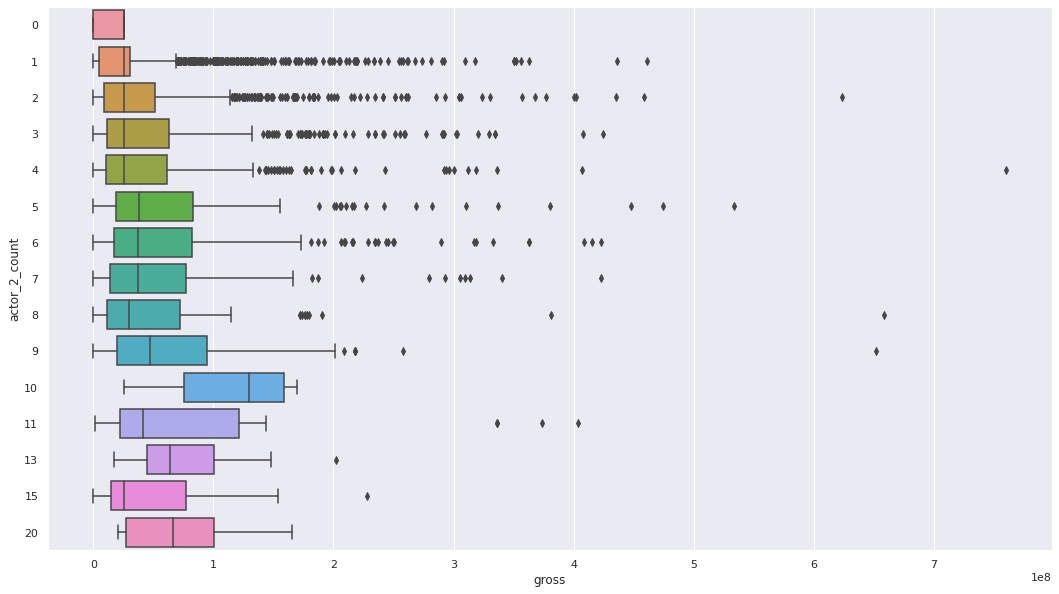

In [ ]:
plt.figure(figsize=(18,10))
sb.boxplot(data=df, y='actor_2_count', x='gross');

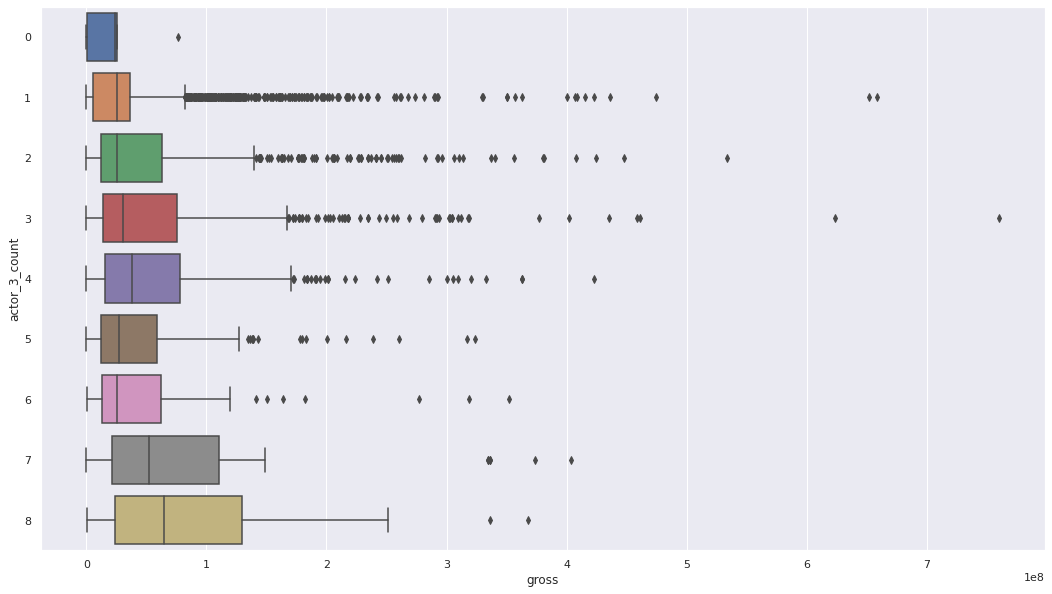

In [ ]:
plt.figure(figsize=(18,10))
sb.boxplot(data=df, y='actor_3_count', x='gross');

We see an increasing trend for `actor_1/2/3_count` and `gross`. 

Movies with actors who have appeared in many other movies tend to gross more. Even though the trend is the most obvious for `actor_3_count`, these metrics could be a proxy for actor popularity and signify the relationship between a movie's cast and it's `gross`. The more movies the cast has appeared in previously could point to a higher gross earning.

### `director_count`

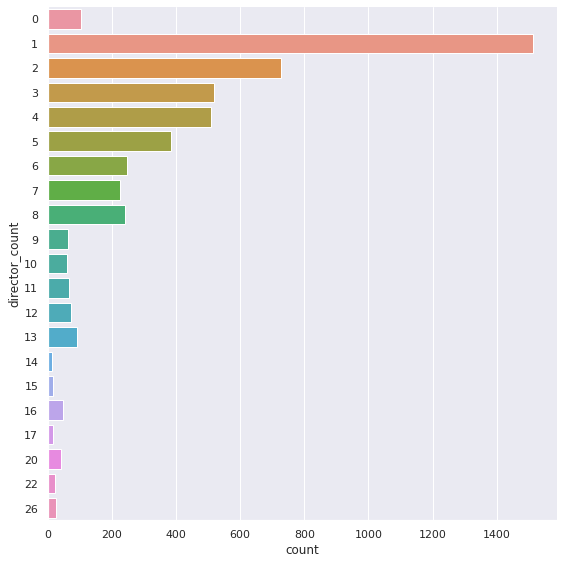

In [ ]:
sb.catplot(data=categorical_df, y='director_count', kind='count', height=8);

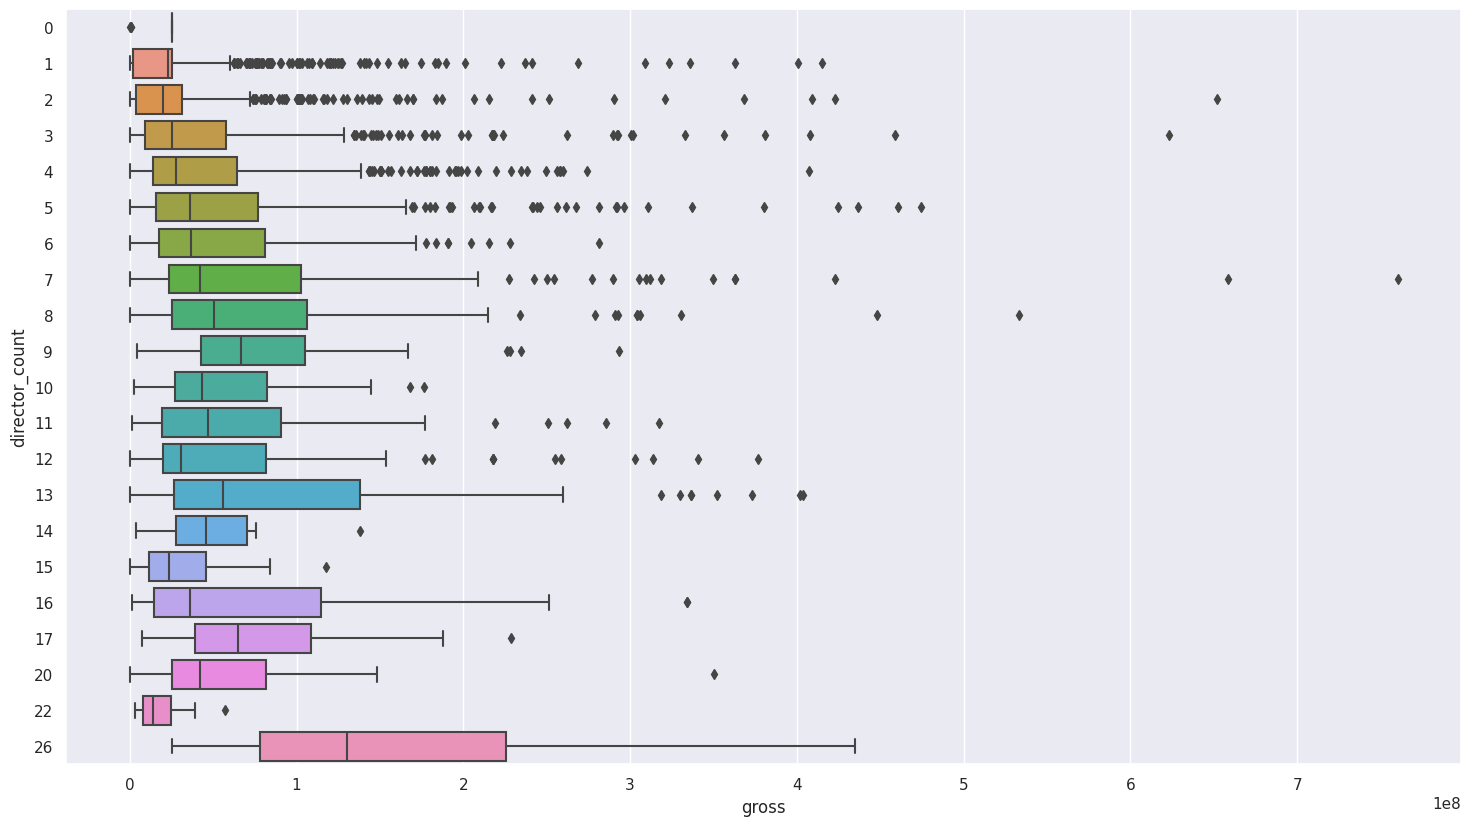

In [ ]:
plt.figure(figsize=(18,10), dpi=100)
sb.boxplot(data=df, y='director_count', x='gross');

Likewise for `director_count` – we see the same kind of distribution as actor count where most movies are directed by directors that have directed only a few movies (~1-4) but there is an increasing trend with `gross`. Movies with directors that have directed more movies tend to gross more with count = 26 grossing the most.

This could also be a proxy metric for a director’s credibility.

### `genres_count`

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


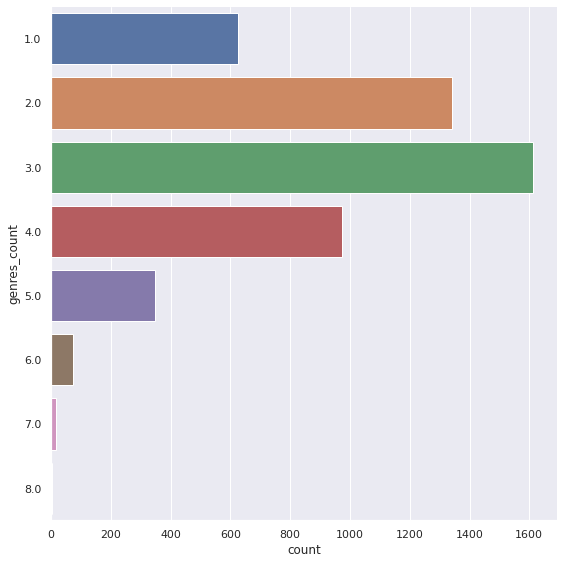

In [ ]:
sb.catplot(data=categorical_df, y='genres_count', kind='count', height=8);

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


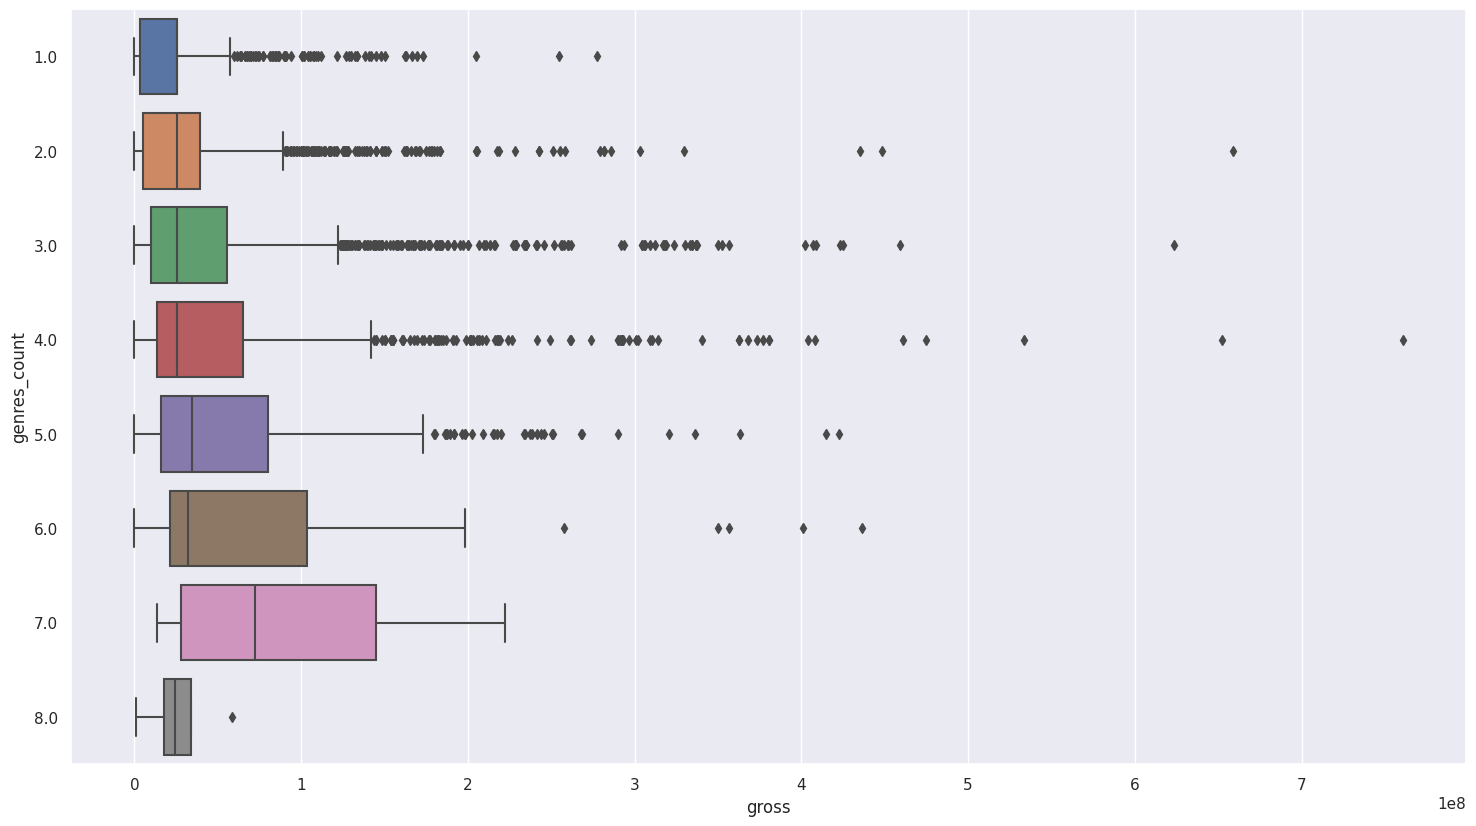

In [ ]:
plt.figure(figsize=(18,10), dpi=100)
sb.boxplot(data=df, y='genres_count', x='gross');

Most movies have 2-3 genres that it can be categorised in. We see that as the number of genres a movie can be categorized in increases, its `gross` mean also increases.

### Genre Categories Frequency

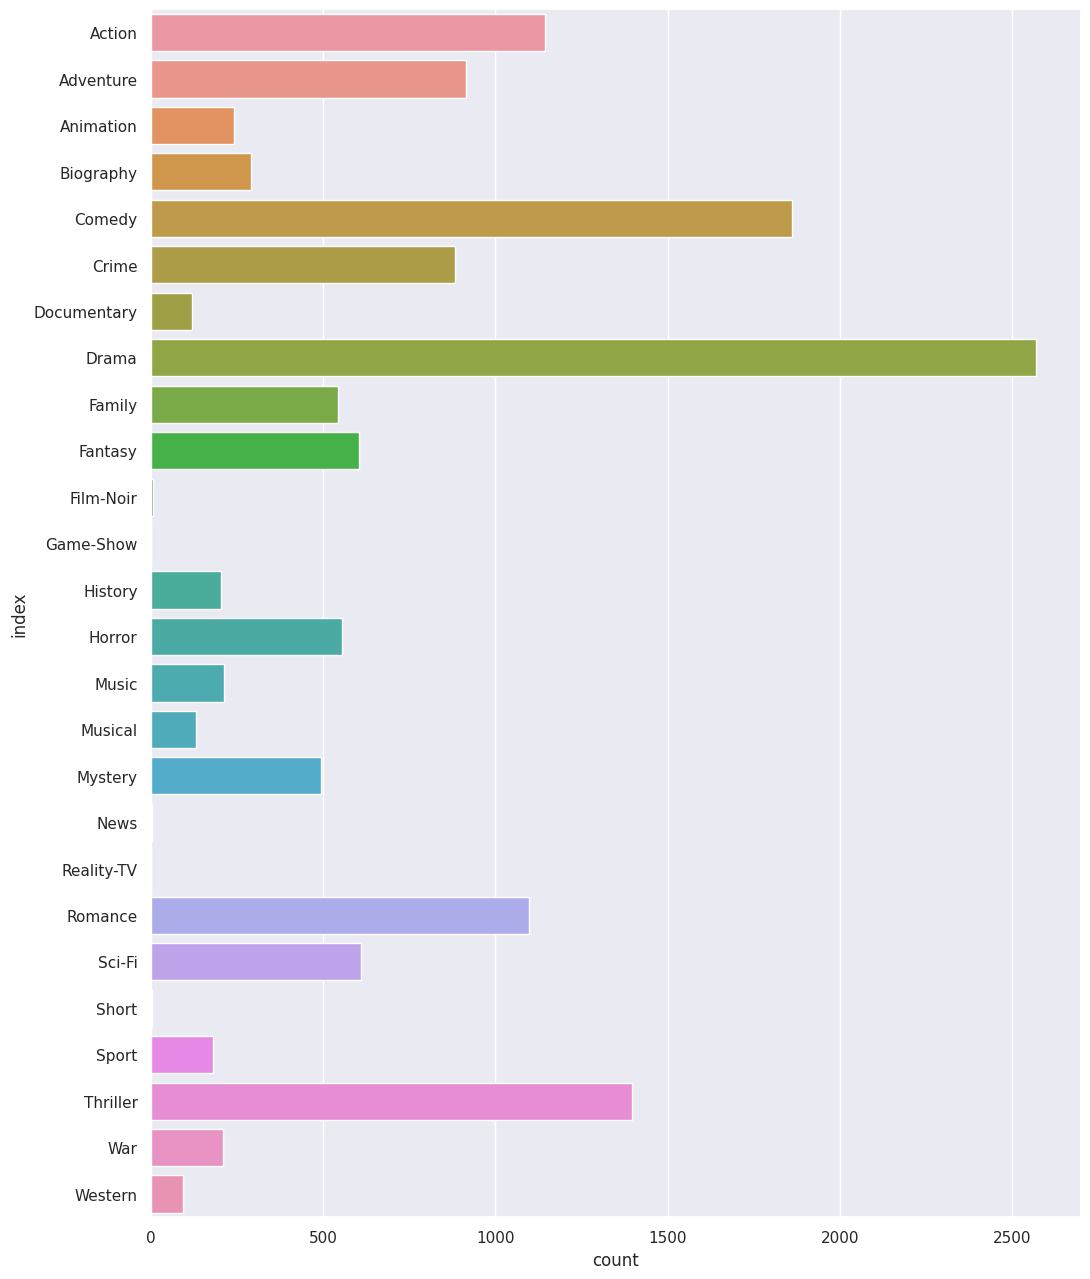

In [ ]:
genres_count = pd.DataFrame(df[genres].apply(lambda x: sum(x == 1)), columns=['count']).reset_index()

plt.figure(figsize=(12,16), dpi=100)
sb.barplot(data=genres_count, y='index', x='count');

In [ ]:
df_for_genresEDA = pd.DataFrame(columns=['gross', 'genre'])

In [ ]:
# Appending to newly created df all the movies of a particular genre
for genre in genres:
    temp = df[df[genre] == 1][['gross', genre]]
    temp[genre] = temp[genre].replace([1], genre)
    temp.rename(columns={genre : 'genre'}, inplace=True)
    df_for_genresEDA = df_for_genresEDA.append(temp)

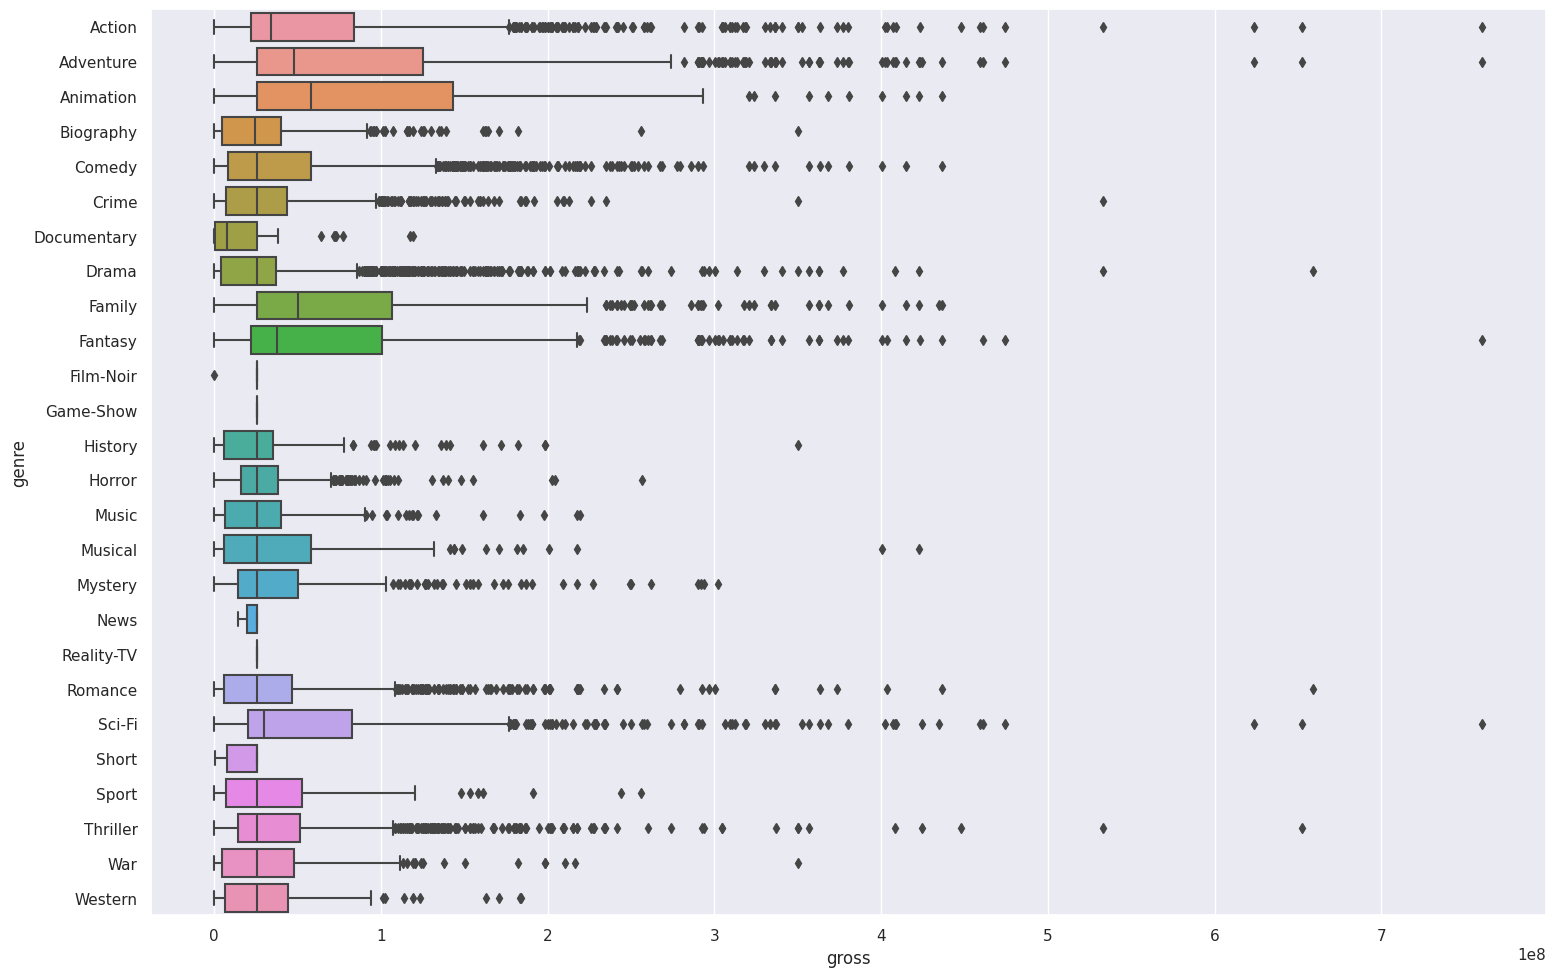

In [ ]:
plt.figure(figsize=(18,12), dpi=100)
sb.boxplot(data=df_for_genresEDA, y='genre', x='gross');

Comedy and drama movies are the most widely produced.

There is no clear trend between a movies genre and its `gross` but we do see that Animation, Family and Adventure movies have the highest mean.

### `main_keyword_count`

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel

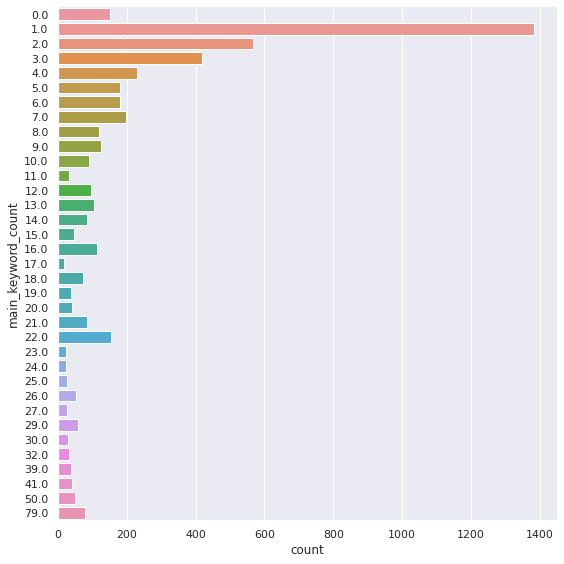

In [ ]:
sb.catplot(data=categorical_df, y='main_keyword_count', kind='count', height=8);

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


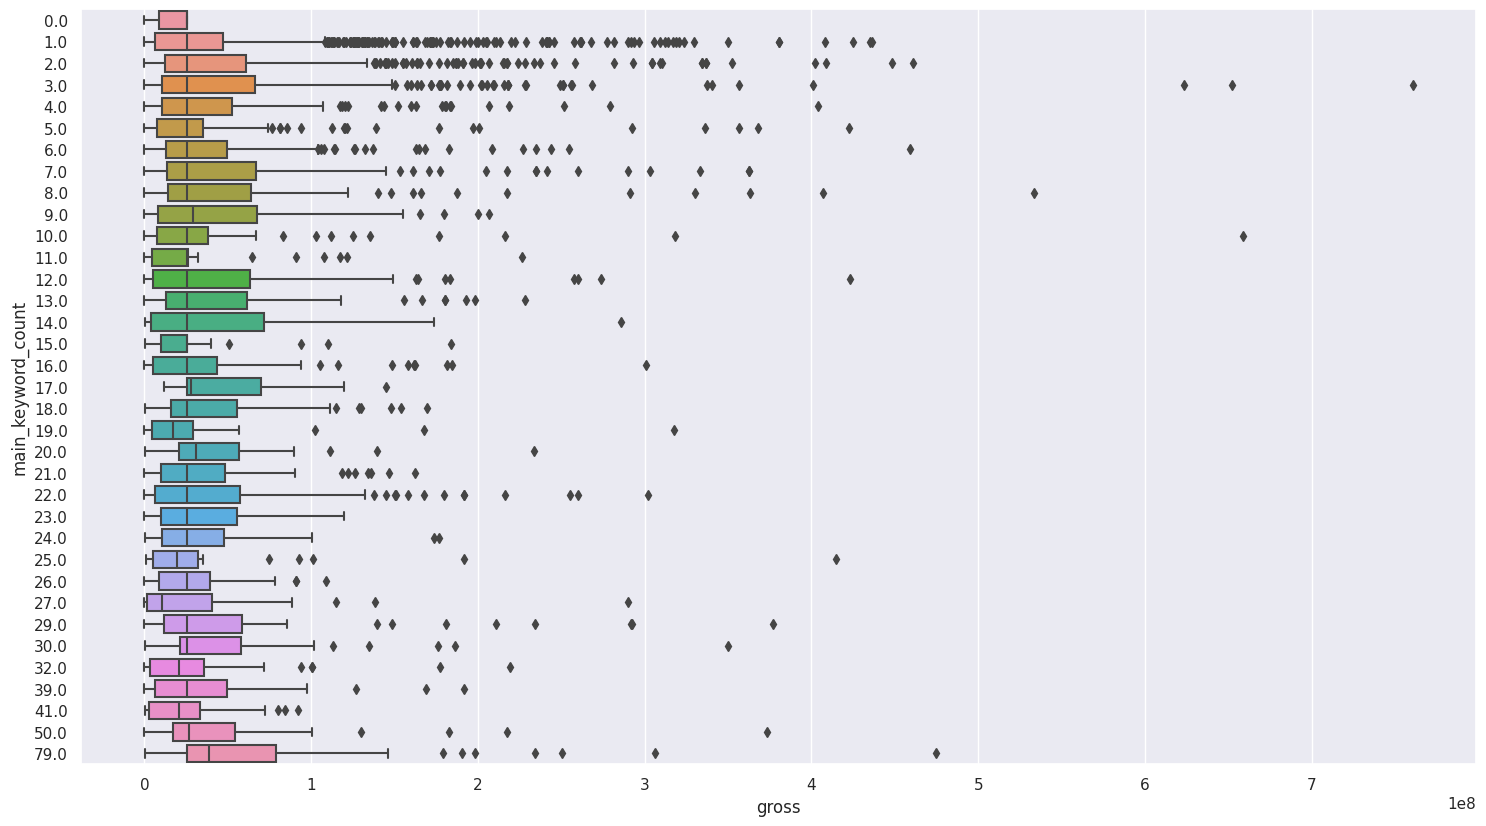

In [ ]:
plt.figure(figsize=(18,10), dpi=100)
sb.boxplot(data=df, y='main_keyword_count', x='gross');

We find that most main keywords have only appeared in 1-3 movies. But some movies have main keywords that appeared in 79 movies, denoting that particular keyword’s popularity.

While there is no clear trend in how widespread the main keyword of a movie is vs. its `gross`, we see that the most popular main keyword (`main_keyword_count` = 79) has grossed the most


### Top 30 `main_keyword`

In [ ]:
top_keywords = pd.DataFrame(categorical_df['main_keyword'].value_counts()[:30]).reset_index()
top_keywords.columns = ['main_keyword', 'count']
top_keywords

main_keyword  count
0        No keywords    152
1              alien     79
2              death     50
3                boy     41
4        best friend     39
5              actor     32
6           assassin     30
7             battle     29
8    box office flop     29
9             friend     27
10         apartment     26
11  african american     26
12           college     25
13              baby     24
14              bank     23
15              army     22
16               bar     22
17             beach     22
18             1980s     22
19             1960s     22
20             1950s     22
21             blood     22
22           breasts     21
23             1970s     21
24               cia     21
25        basketball     21
26         christmas     20
27           captain     20
28    blood splatter     19
29    based on novel     19

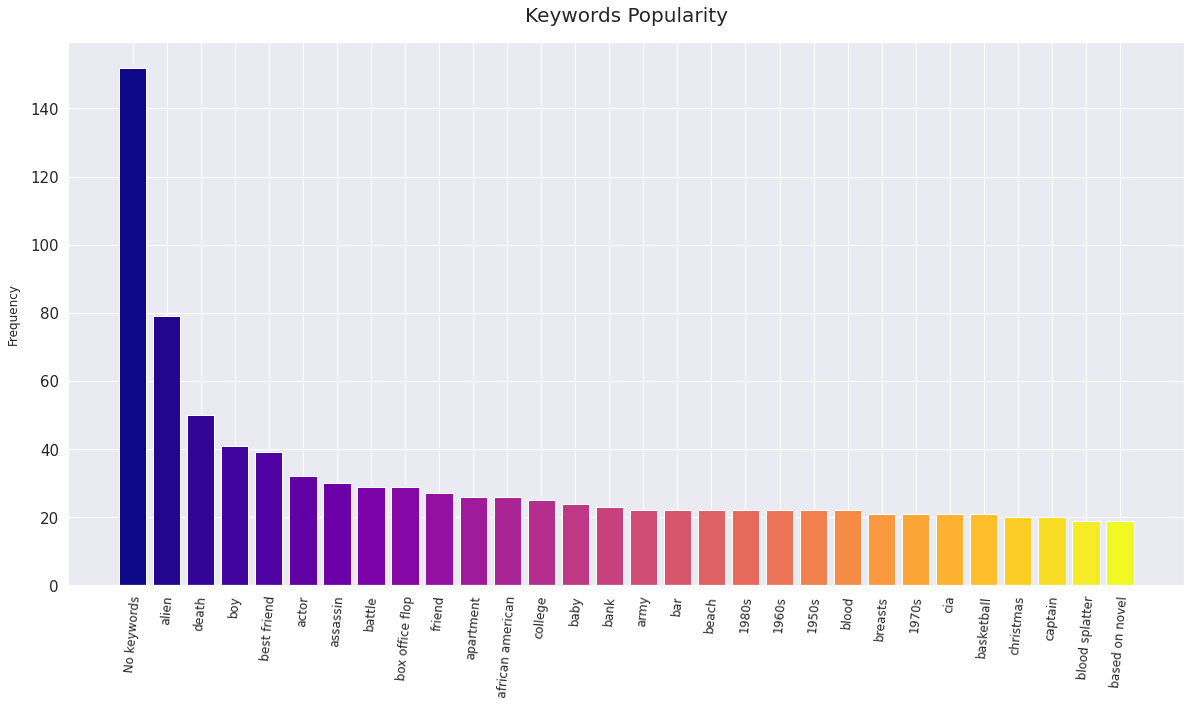

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=85, fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel("Frequency", fontsize=12, labelpad=10)
plt.bar(top_keywords['main_keyword'], top_keywords['count'], align='center', color=plt.cm.get_cmap('plasma', 30).colors)
plt.title("Keywords Popularity", fontsize=20, pad=20)
plt.show();

## 6. Dimensionality Reduction and Robust Scaler Transformation

Here, dimensionality reduction will be performed on categorical features due to their high cardinality. Also, robust scaler transformation will be used to standardise numerical features while ignoring outliers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
import math

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   color                      4998 non-null   category
 1   num_critic_for_reviews     4998 non-null   float64 
 2   duration                   4998 non-null   float64 
 3   director_facebook_likes    4998 non-null   float64 
 4   actor_3_facebook_likes     4998 non-null   float64 
 5   actor_1_facebook_likes     4998 non-null   float64 
 6   gross                      4998 non-null   float64 
 7   num_voted_users            4998 non-null   int64   
 8   cast_total_facebook_likes  4998 non-null   int64   
 9   facenumber_in_poster       4998 non-null   category
 10  num_user_for_reviews       4998 non-null   float64 
 11  language                   4998 non-null   category
 12  country                    4998 non-null   category
 13  content_rating             4998 n

### One-Hot Encoding for Categorical Features

Before we can use the rest of our categorical features in our machine learning model, we have to implement <b>One-Hot Encoding</b>, just like what we did for the `genre` category. We omit the set of categories under `genre` from the One-Hot Encoding so as it has already been done

In [ ]:
len(list(set(categorical) - set(genres)))

14

In [ ]:
df[list(set(categorical) - set(genres))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   director_count        4998 non-null   category
 1   main_keyword          4998 non-null   category
 2   actor_2_count         4998 non-null   category
 3   actor_1_count         4998 non-null   category
 4   main_keyword_count    4998 non-null   category
 5   color                 4998 non-null   category
 6   content_rating        4998 non-null   category
 7   country               4998 non-null   category
 8   facenumber_in_poster  4998 non-null   category
 9   aspect_ratio          4998 non-null   category
 10  genres_count          4998 non-null   category
 11  actor_3_count         4998 non-null   category
 12  title_year            4998 non-null   category
 13  language              4998 non-null   category
dtypes: category(14)
memory usage: 335.6 KB


In [ ]:
df[list(set(categorical) - set(genres))].describe().T

count unique          top    freq
director_count          4998     21            1    1513
main_keyword            4998   2064  No keywords     152
actor_2_count           4998     15            1    2104
actor_1_count           4998     34            1    1369
main_keyword_count    4998.0   35.0          1.0  1382.0
color                   4998      2        Color    4791
content_rating          4998     18            R    2399
country                 4998     65          USA    3778
facenumber_in_poster  4998.0   19.0          0.0  2149.0
aspect_ratio          4998.0   22.0         2.35  2664.0
genres_count          4998.0    8.0          3.0  1613.0
actor_3_count           4998      9            1    2669
title_year            4998.0   91.0       2009.0   365.0
language                4998     47      English    4674

### 6.1 Dimensionality Reduction

We see that the above categorical features (less genres) suffer from high cardinality. This means that they possess too many unique values and <b>One Hot Encoding</b> would prove to be a big problem. Looking at the categorical EDA above we can also confirm that many of these categorical values suffer from class imbalance

To reduce cardinality, we can implement an aggregating function that aggregates dimensions based on a certain threshold, in this case we set the threshold at 70% of our dataset. This means we will keep the first n that make up the 70% of our dataset, and classify the rest as "Others"

In [ ]:
from collections import Counter

def dimsReduction(column, threshold=0.70, return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
    
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column = column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return pd.Series(new_column), categories_list
  #Return only the transformed column if return_categories=False
  else:
    return pd.Series(new_column)

In [ ]:
for var in df[list(set(categorical) - set(genres))]:
    _ , cat_list = dimsReduction(df[var], return_categories_list=True)
    print(var, len(cat_list))

director_count 6
main_keyword 624
actor_2_count 4
actor_1_count 11
main_keyword_count 11
color 2
content_rating 3
country 2
facenumber_in_poster 4
aspect_ratio 3
genres_count 4
actor_3_count 3
title_year 17
language 2


We see that we have reduced the dimensions of most categorical features except `main_keyword` which still has 624 dimensions. For that feature alone, we would have to implement a tighter threshold.

In [ ]:
for var in df[list(set(categorical) - set(genres))]:
    if var == 'main_keyword':
        df[var], cat_list =  dimsReduction(df[var], threshold=0.2)
    # since color only has 2 unique features, we set the threshold to 100% to capture the other feature
    elif var == 'color': 
        df[var], cat_list = dimsReduction(df[var], threshold=1)
    else:
        df[var], cat_list = dimsReduction(df[var])
    
    print(var, cat_list)

director_count [1, 2, 3, 4, 5, 'Other']
main_keyword ['No keywords', 'alien', 'death', 'boy', 'best friend', 'actor', 'assassin', 'box office flop', 'battle', 'friend', 'apartment', 'african american', 'college', 'baby', 'bank', 'blood', 'army', '1980s', 'beach', '1960s', '1950s', 'bar', 'cia', '1970s', 'basketball', 'breasts', 'captain', 'christmas', 'based on novel', 'blood splatter', 'dog', 'band', 'california', 'Other']
actor_2_count [1, 2, 3, 'Other']
actor_1_count [1, 2, 3, 4, 5, 6, 8, 7, 9, 10, 'Other']
main_keyword_count [1.0, 2.0, 3.0, 4.0, 7.0, 5.0, 6.0, 22.0, 0.0, 9.0, 'Other']
color ['Color', ' Black and White', 'Other']
content_rating ['R', 'PG-13', 'Other']
country ['USA', 'Other']
facenumber_in_poster [0.0, 1.0, 2.0, 'Other']
aspect_ratio [2.35, 1.85, 'Other']
genres_count [3.0, 2.0, 4.0, 'Other']
actor_3_count [1, 2, 'Other']
title_year [2009.0, 2014.0, 2006.0, 2013.0, 2010.0, 2008.0, 2011.0, 2015.0, 2005.0, 2012.0, 2004.0, 2002.0, 2007.0, 2001.0, 2003.0, 2000.0, 'Other

In [ ]:
df[list(set(categorical) - set(genres))].describe().T

count unique      top    freq
main_keyword_count      4998     11    Other    1415
aspect_ratio          4998.0    3.0     2.35  2664.0
main_keyword            4998     34    Other    3996
director_count          4998      6        1    1513
actor_1_count           4998     11    Other    1403
actor_2_count           4998      4        1    2104
country                 4998      2      USA    3778
title_year              4998     17    Other    1430
language                4998      2  English    4674
genres_count          4998.0    4.0      3.0  1613.0
color                   4998      2    Color    4791
actor_3_count           4998      3        1    2669
facenumber_in_poster  4998.0    4.0      0.0  2149.0
content_rating          4998      3        R    2399

We see that the unique values dropped drastically. Let's output some count plots to check the distributions.

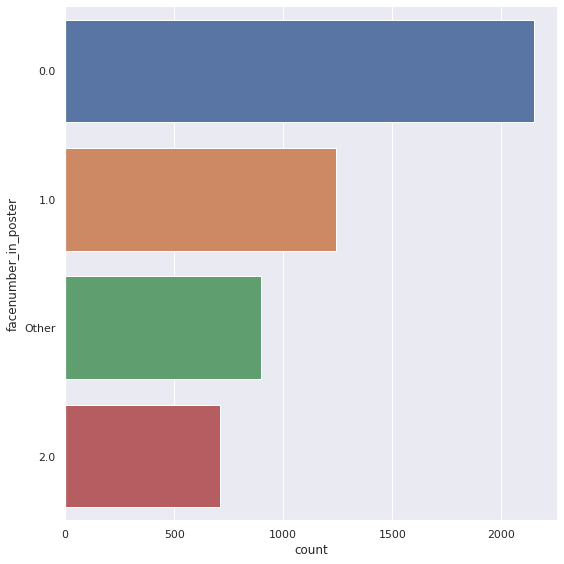

In [ ]:
sb.catplot(data=df, y='facenumber_in_poster', kind='count', height=8);

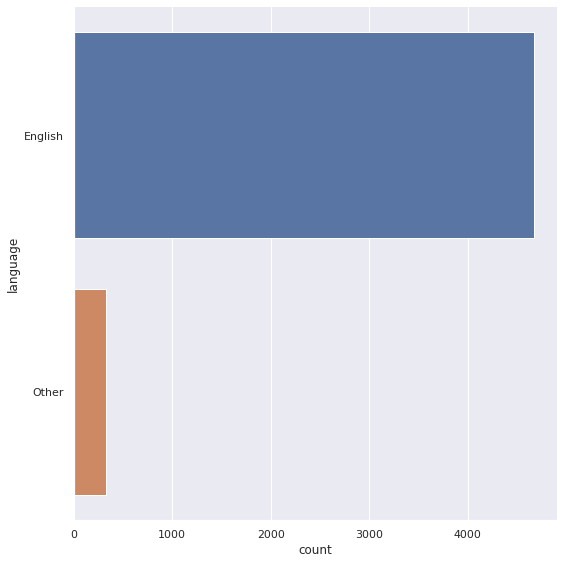

In [ ]:
sb.catplot(data=df, y='language', kind='count', height=8);

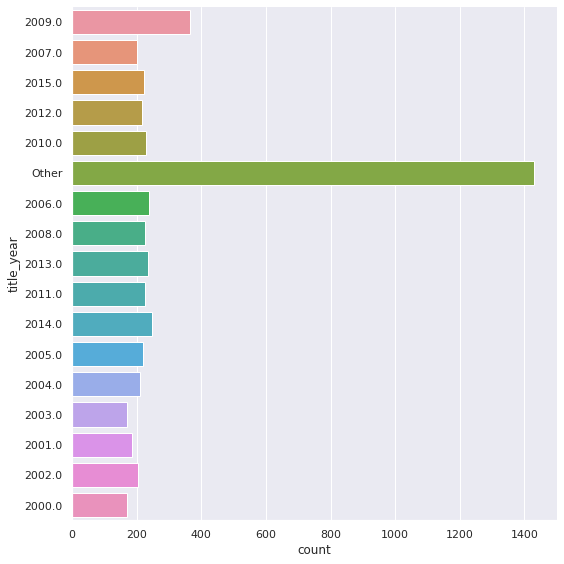

In [ ]:
sb.catplot(data=df, y='title_year', kind='count', height=8);

We output some graphs of features and see that we successfully reduced the cardinality of the features by a drastic amount and can <b>one hot encode</b> our categorical features now.

In [ ]:
ohe_columns =  list(set(categorical) - set(genres))
ohe_df =  pd.get_dummies(df[ohe_columns])
ohe_df

main_keyword_count_0.0  main_keyword_count_1.0  main_keyword_count_2.0  \
0                          0                       0                       0   
1                          0                       1                       0   
2                          0                       0                       0   
3                          0                       0                       1   
4                          1                       0                       0   
...                      ...                     ...                     ...   
4993                       0                       0                       1   
4994                       0                       0                       0   
4995                       1                       0                       0   
4996                       1                       0                       0   
4997                       0                       1                       0   

      main_keyword_count_3.0  main_keyword_count_4.0  main_keyword_count_5.0  \
0                          1                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   
...                      ...                     ...                     ...   
4993                       0                       0                       0   
4994                       0                       0                       1   
4995                       0                       0                       0   
4996                       0                       0                       0   
4997                       0                       0                       0   

      main_keyword_count_6.0  main_keyword_count_7.0  main_keyword_count_9.0  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       1   
3                          0                       0                       0   
4                          0                       0                       0   
...                      ...                     ...                     ...   
4993                       0                       0                       0   
4994                       0                       0                       0   
4995                       0                       0                       0   
4996                       0                       0                       0   
4997                       0                       0                       0   

      main_keyword_count_22.0  ...  actor_3_count_1  actor_3_count_2  \
0                           0  ...                0                0   
1                           0  ...                0                0   
2                           0  ...                1                0   
3                           0  ...                0                1   
4                           0  ...                0                0   
...                       ...  ...              ...              ...   
4993                        0  ...                0                0   
4994                        0  ...                1                0   
4995                        0  ...                1                0   
4996                        0  ...                1                0   
4997                        0  ...                1                0   

      actor_3_count_Other  facenumber_in_poster_0.0  facenumber_in_poster_1.0  \
0                       1                         1                         0   
1                       1                         1                         0   
2              

In [ ]:
df_merged = pd.concat([df, ohe_df], axis=1)
df_merged = df_merged.drop(ohe_columns, axis=1)
df_merged

num_critic_for_reviews  duration  director_facebook_likes  \
0                      723.0     178.0                      0.0   
1                      302.0     169.0                    563.0   
2                      602.0     148.0                      0.0   
3                      813.0     164.0                  22000.0   
4                      110.0     103.0                    131.0   
...                      ...       ...                      ...   
4993                     1.0      87.0                      2.0   
4994                    43.0      43.0                     49.0   
4995                    13.0      76.0                      0.0   
4996                    14.0     100.0                      0.0   
4997                    43.0      90.0                     16.0   

      actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                      855.0                  1000.0  760505847.0   
1                     1000.0                 40000.0  309404152.0   
2                      161.0                 11000.0  200074175.0   
3                    23000.0                 27000.0  448130642.0   
4                      371.5                   131.0   25517500.0   
...                      ...                     ...          ...   
4993                   318.0                   637.0   25517500.0   
4994                   319.0                   841.0   25517500.0   
4995                     0.0                     0.0   25517500.0   
4996                   489.0                   946.0      10443.0   
4997                    16.0                    86.0      85222.0   

      num_voted_users  cast_total_facebook_likes  num_user_for_reviews  \
0              886204                       4834                3054.0   
1              471220                      48350                1238.0   
2              275868                      11700                 994.0   
3             1144337                     106759                2701.0   
4                   8                        143                 156.0   
...               ...                        ...                   ...   
4993              629                       2283                   6.0   
4994            73839                       1753                 359.0   
4995               38                          0                   3.0   
4996             1255                       2386                   9.0   
4997             4285                        163                  84.0   

           budget  ...  actor_3_count_1  actor_3_count_2  actor_3_count_Other  \
0     237000000.0  ...                0                0                    1   
1     300000000.0  ...                0                0                    1   
2     245000000.0  ...                1                0                    0   
3     250000000.0  ...                0                1                    0   
4      20000000.0  ...                0                0                    1   
...           ...  ...              ...              ...                  ...   
4993   20000000.0  ...                0                0                    1   
4994   20000000.0  ...                1                0                    0   
4995       1400.0  ...                1                0                    0   
4996   20000000.0  ...                1                0                    0   
4997       1100.0  ...                1                0                    0   

     facenumber_in_poster_0.0 facenumber_in_poster_1.0  \
0                           1                        0   
1                           1                        0   
2                           0                        1   
3                           1                        0   
4                           1                        0   
...                       ...                      ...   
4993                        0                        0   
4994                        0                 

In [ ]:
df_merged = df_merged.astype('float64')

In [ ]:
df_merged.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 145 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    num_critic_for_reviews         float64
 1    duration                       float64
 2    director_facebook_likes        float64
 3    actor_3_facebook_likes         float64
 4    actor_1_facebook_likes         float64
 5    gross                          float64
 6    num_voted_users                float64
 7    cast_total_facebook_likes      float64
 8    num_user_for_reviews           float64
 9    budget                         float64
 10   actor_2_facebook_likes         float64
 11   imdb_score                     float64
 12   movie_facebook_likes           float64
 13   Action                         float64
 14   Adventure                      float64
 15   Animation                      float64
 16   Biography                      float64
 17   Comedy                         

### Feature Scaling for Numerical Features

We see from the above EDA that the distributions of our numerical features are very much skewed (positively). Only `duration` and `imdb_score` remotely resembles a normal distribution. This implies that there is a lot of outliers in our dataset.

In [ ]:
df_merged[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4998 non-null   float64
 1   duration                   4998 non-null   float64
 2   director_facebook_likes    4998 non-null   float64
 3   actor_3_facebook_likes     4998 non-null   float64
 4   actor_1_facebook_likes     4998 non-null   float64
 5   gross                      4998 non-null   float64
 6   num_voted_users            4998 non-null   float64
 7   cast_total_facebook_likes  4998 non-null   float64
 8   num_user_for_reviews       4998 non-null   float64
 9   budget                     4998 non-null   float64
 10  actor_2_facebook_likes     4998 non-null   float64
 11  imdb_score                 4998 non-null   float64
 12  movie_facebook_likes       4998 non-null   float64
dtypes: float64(13)
memory usage: 675.7 KB


In [ ]:
df_merged[numerical].describe().T

count          mean           std    min  \
num_critic_for_reviews     4998.0  1.395970e+02  1.209164e+02    1.0   
duration                   4998.0  1.072007e+02  2.521190e+01    7.0   
director_facebook_likes    4998.0  6.754964e+02  2.793896e+03    0.0   
actor_3_facebook_likes     4998.0  6.386658e+02  1.639613e+03    0.0   
actor_1_facebook_likes     4998.0  6.549140e+03  1.505247e+04    0.0   
gross                      4998.0  4.433719e+07  6.234076e+07  162.0   
num_voted_users            4998.0  8.347020e+04  1.380866e+05    5.0   
cast_total_facebook_likes  4998.0  9.676941e+03  1.816540e+04    0.0   
num_user_for_reviews       4998.0  2.715272e+02  3.770563e+02    1.0   
budget                     4998.0  3.782366e+07  1.967122e+08  218.0   
actor_2_facebook_likes     4998.0  1.640273e+03  4.026032e+03    0.0   
imdb_score                 4998.0  6.441056e+00  1.124107e+00    1.6   
movie_facebook_likes       4998.0  7.487430e+03  1.929073e+04    0.0   

                                  25%         50%          75%           max  
num_critic_for_reviews          50.00       110.0       193.00  8.130000e+02  
duration                        93.00       103.0       118.00  5.110000e+02  
director_facebook_likes          7.00        49.0       189.00  2.300000e+04  
actor_3_facebook_likes         134.00       371.5       634.75  2.300000e+04  
actor_1_facebook_likes         613.00       986.0     11000.00  6.400000e+05  
gross                      8382841.25  25517500.0  51376923.25  7.605058e+08  
num_voted_users               8560.00     34260.5     96120.75  1.689764e+06  
cast_total_facebook_likes     1405.50      3085.5     13740.50  6.567300e+05  
num_user_for_reviews            65.00       156.0       323.00  5.060000e+03  
budget                     7000000.00  20000000.0  40000000.00  1.221550e+10  
actor_2_facebook_likes         281.00       595.0       912.75  1.370000e+05  
imdb_score                       5.80         6.6         7.20  9.500000e+00  
movie_facebook_likes             0.00       162.5      3000.00  3.490000e+05

We see that the ranges for our numerical features also differ by a lot. For example we have `imdb_score` ranging from 1-10 whilst `actor_1_facebook_likes` ranging up till 640,000.

The presence of outliers and large standard deviation and range make it essential for us to scale our features to account for outliers. This is because large values can skew and dominate ML models, causing the algorithms to give higher importance to larger variables and overlooking smaller ones when that may not be the case.

To account for outliers, we use a Robust Scaler Transformation as opposed to other popular techniques like Z-score standarization or Min-max normalization which do not account for outliers.

### 6.2 Robust Scaler Transformation
The newly scaled variable is calculated as follows:

$$
x_{scaled} = \frac{x_i - x_{med}}{x_{75} - x_{25}}
$$

The robust scaler transformation standardises input variables by ignoring the outliers from the calculation of the mean and standard deviation. These calculated values are then used to scale the variables.

In [ ]:
# X -> Numerical predictors 
# y -> gross, numerical response 
X, y = df_merged[numerical].loc[:, df_merged[numerical].columns != 'gross'], df_merged['gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [ ]:
print("X train data dims: \t", X_train.shape)
print("X test data dims: \t", X_test.shape)
print("y train data dims: \t", y_train.shape)
print("y test data dims: \t", y_test.shape)

X train data dims: 	 (3748, 12)
X test data dims: 	 (1250, 12)
y train data dims: 	 (3748,)
y test data dims: 	 (1250,)


In [ ]:
# Fitting the robust scaler transform on the train set
rs1 = RobustScaler().fit(X_train)
rs2 = RobustScaler().fit(y_train.values.reshape(-1,1))

We must prepare the robust scaler transform on the training dataset only to prevent data leakage. After fitting, we then transform both the train and test datasets.

In [ ]:
# Transforming both train and test sets
X_train = pd.DataFrame(rs1.transform(X_train.values), index=X_train.index, columns=X_train.columns)
y_train = pd.DataFrame(rs2.transform(y_train.values.reshape(-1,1)), index=y_train.index, columns=['gross'])

X_test = pd.DataFrame(rs1.transform(X_test), index=X_test.index, columns=X_test.columns)
y_test = pd.DataFrame(rs2.transform(y_test.values.reshape(-1,1)), index=y_test.index, columns=['gross'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("X train data dims: \t", X_train.shape)
print("X test data dims: \t", X_test.shape)
print("y train data dims: \t", y_train.shape)
print("y test data dims: \t", y_test.shape)

X train data dims: 	 (3748, 12)
X test data dims: 	 (1250, 12)
y train data dims: 	 (3748, 1)
y test data dims: 	 (1250, 1)


In [ ]:
X_train.describe().T

count      mean        std       min       25%  \
num_critic_for_reviews     3748.0  0.208511   0.850200 -0.750430 -0.419966   
duration                   3748.0  0.163065   0.995204 -4.000000 -0.416667   
director_facebook_likes    3748.0  3.725224  16.171095 -0.270345 -0.231724   
actor_3_facebook_likes     3748.0  0.546674   3.338499 -0.737525 -0.474052   
actor_1_facebook_likes     3748.0  0.553517   1.588564 -0.095256 -0.036852   
num_voted_users            3748.0  0.581992   1.626931 -0.388589 -0.291053   
cast_total_facebook_likes  3748.0  0.545468   1.575494 -0.249945 -0.137419   
num_user_for_reviews       3748.0  0.448900   1.438544 -0.593870 -0.352490   
budget                     3748.0  0.567793   6.524865 -0.606027 -0.393939   
actor_2_facebook_likes     3748.0  1.645307   6.553330 -0.932237 -0.492362   
imdb_score                 3748.0 -0.108782   0.803186 -3.500000 -0.571429   
movie_facebook_likes       3748.0  2.520312   6.646545 -0.058833 -0.058833   

                           50%       75%         max  
num_critic_for_reviews     0.0  0.580034    4.839931  
duration                   0.0  0.583333    9.458333  
director_facebook_likes    0.0  0.768276  126.626207  
actor_3_facebook_likes     0.0  0.525948   45.170659  
actor_1_facebook_likes     0.0  0.963148   61.484653  
num_voted_users            0.0  0.708947   18.798543  
cast_total_facebook_likes  0.0  0.862581   52.657751  
num_user_for_reviews       0.0  0.647510   17.283525  
budget                     0.0  0.606061  369.560606  
actor_2_facebook_likes     0.0  0.507638  213.717195  
imdb_score                 0.0  0.428571    2.071429  
movie_facebook_likes       0.0  0.941167  116.274500

In [ ]:
y_train.describe().T

count      mean       std       min       25%  50%       75%  \
gross  3748.0  0.453039  1.483369 -0.590795 -0.394226  0.0  0.605774   

             max  
gross  17.016954

In [ ]:
X_test.describe().T

count      mean        std       min       25%  \
num_critic_for_reviews     1250.0  0.189538   0.777043 -0.750430 -0.371773   
duration                   1250.0  0.210900   1.200850 -4.000000 -0.416667   
director_facebook_likes    1250.0  2.650884  12.854992 -0.270345 -0.226207   
actor_3_facebook_likes     1250.0  0.509022   3.067984 -0.737525 -0.455589   
actor_1_facebook_likes     1250.0  0.479048   0.904173 -0.095256 -0.034831   
num_voted_users            1250.0  0.490632   1.374436 -0.388601 -0.293168   
cast_total_facebook_likes  1250.0  0.482232   1.057772 -0.249945 -0.133754   
num_user_for_reviews       1250.0  0.423841   1.463265 -0.593870 -0.340996   
budget                     1250.0  0.457110   3.798761 -0.606054 -0.392424   
actor_2_facebook_likes     1250.0  1.614960   5.509301 -0.932237 -0.490795   
imdb_score                 1250.0 -0.127771   0.802329 -3.571429 -0.571429   
movie_facebook_likes       1250.0  2.187105   5.728190 -0.058833 -0.058833   

                                50%       75%         max  
num_critic_for_reviews     0.000000  0.555938    4.330465  
duration                   0.041667  0.666667   17.000000  
director_facebook_likes    0.000000  0.772414  121.108966  
actor_3_facebook_likes     0.006986  0.531437   37.186627  
actor_1_facebook_likes    -0.001443  0.963148    8.275763  
num_voted_users            0.002271  0.663555   13.677252  
cast_total_facebook_likes -0.011238  0.838251    8.076494  
num_user_for_reviews      -0.001916  0.613027   18.789272  
budget                     0.000000  0.606061  126.666667  
actor_2_facebook_likes    -0.001567  0.484136   44.504505  
imdb_score                 0.000000  0.428571    1.857143  
movie_facebook_likes      -0.016000  0.607833   63.607833

In [ ]:
y_test.describe().T

count      mean       std       min       25%  50%       75%  \
gross  1250.0  0.383815  1.315306 -0.590768 -0.404483  0.0  0.581542   

             max  
gross  10.396185

We can see that the distributions have been adjusted. The median values are now zero and the standard deviation values are now significantly reduce to around the same scale. 
Now we we are ready to merge the numerical features and categorical features we one-hot encoded earlier into the X train and test sets

In [ ]:
cat_tomerge = df_merged[df_merged.columns[~df_merged.columns.isin(numerical)]]
cat_tomerge

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0        1.0        1.0        0.0        0.0     0.0    0.0          0.0   
1        1.0        1.0        0.0        0.0     0.0    0.0          0.0   
2        1.0        1.0        0.0        0.0     0.0    0.0          0.0   
3        1.0        0.0        0.0        0.0     0.0    0.0          0.0   
4        0.0        0.0        0.0        0.0     0.0    0.0          1.0   
...      ...        ...        ...        ...     ...    ...          ...   
4993     0.0        0.0        0.0        0.0     1.0    0.0          0.0   
4994     0.0        0.0        0.0        0.0     0.0    1.0          0.0   
4995     0.0        0.0        0.0        0.0     0.0    0.0          0.0   
4996     0.0        0.0        0.0        0.0     1.0    0.0          0.0   
4997     0.0        0.0        0.0        0.0     0.0    0.0          1.0   

      Drama  Family  Fantasy  ...  actor_3_count_1  actor_3_count_2  \
0       0.0     0.0      1.0  ...              0.0              0.0   
1       0.0     0.0      1.0  ...              0.0              0.0   
2       0.0     0.0      0.0  ...              1.0              0.0   
3       0.0     0.0      0.0  ...              0.0              1.0   
4       0.0     0.0      0.0  ...              0.0              0.0   
...     ...     ...      ...  ...              ...              ...   
4993    1.0     0.0      0.0  ...              0.0              0.0   
4994    1.0     0.0      0.0  ...              1.0              0.0   
4995    1.0     0.0      0.0  ...              1.0              0.0   
4996    1.0     0.0      0.0  ...              1.0              0.0   
4997    0.0     0.0      0.0  ...              1.0              0.0   

      actor_3_count_Other  facenumber_in_poster_0.0  facenumber_in_poster_1.0  \
0                     1.0                       1.0                       0.0   
1                     1.0                       1.0                       0.0   
2                     0.0                       0.0                       1.0   
3                     0.0                       1.0                       0.0   
4                     1.0                       1.0                       0.0   
...                   ...                       ...                       ...   
4993                  1.0                       0.0                       0.0   
4994                  0.0                       0.0                       1.0   
4995                  0.0                       1.0                       0.0   
4996                  0.0                       0.0                       0.0   
4997                  0.0                       1.0                       0.0   

      facenumber_in_poster_2.0  facenumber_in_poster_Other  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
...                        ...                         ...   
4993                       1.0                         0.0   
4994                       0.0                         0.0   
4995                       0.0                         0.0   
4996                       0.0                         1.0   
4997                       0.0                         0.0   

      content_rating_Other  content_rating_PG-13  content_rating_R  
0                      0.0                   1.0               0.0  
1                      0.0                   1.0               0.0  
2                      0.0                   1.0               0.0  
3                      0.0                   1.0               0.0  
4                      0.0                   0.0               1.0  
...                    ...                   ...               ...  
4993                   0.0 

In [ ]:
X_train = pd.merge(X_train, cat_tomerge, left_index=True, right_index=True)
X_test = pd.merge(X_test, cat_tomerge, left_index=True, right_index=True)

In [ ]:
print("X train data dims: \t", X_train.shape)
print("X test data dims: \t", X_test.shape)
print("y train data dims: \t", y_train.shape)
print("y test data dims: \t", y_test.shape)

X train data dims: 	 (3748, 144)
X test data dims: 	 (1250, 144)
y train data dims: 	 (3748, 1)
y test data dims: 	 (1250, 1)


## 7. Baseline Models

We used 4 different baseline models to observe the performance of our feature set. They are:
1. Linear Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting

The hyperparameters of these models will be left to their defaults. Their performances will be used as a baseline for comparison after improvements are made in <b>8. Improvements to Baseline Models</b>

### 7.1 Linear Regression

This model is a simple linear model which aims to minimize the residual sum of squares between actual values and predicted values by manipulating the weights of the given features.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_rmse = []

# Linear Regressor model
model = LinearRegression()
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor features
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

linear_rmse.append(rmse)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.600271823124361
Root Mean Squared Error (RMSE) 	: 0.9377208103573649

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5279425273232824
Root Mean Squared Error (RMSE) 	: 0.9033381698409059



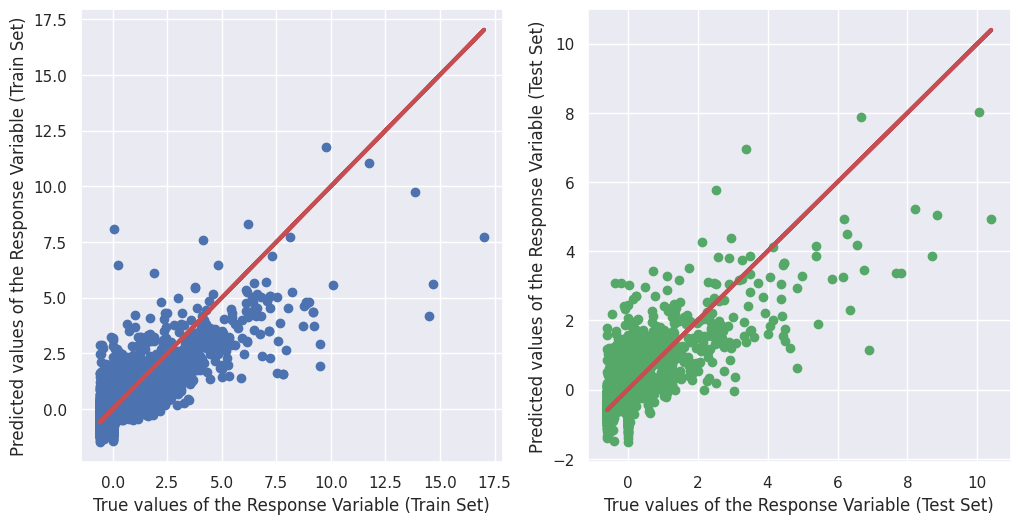

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### 7.2 Decision Tree

This model predicts the value of a target variable by learning simple decision rules inferred from the given features. A tree without hyperparameter tuning is however prone to over-fitting.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_rmse = []

# Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor features
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

dt_rmse.append(rmse)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Root Mean Squared Error (RMSE) 	: 1.2564090540456707e-17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.39921086376821824
Root Mean Squared Error (RMSE) 	: 1.019093328302954



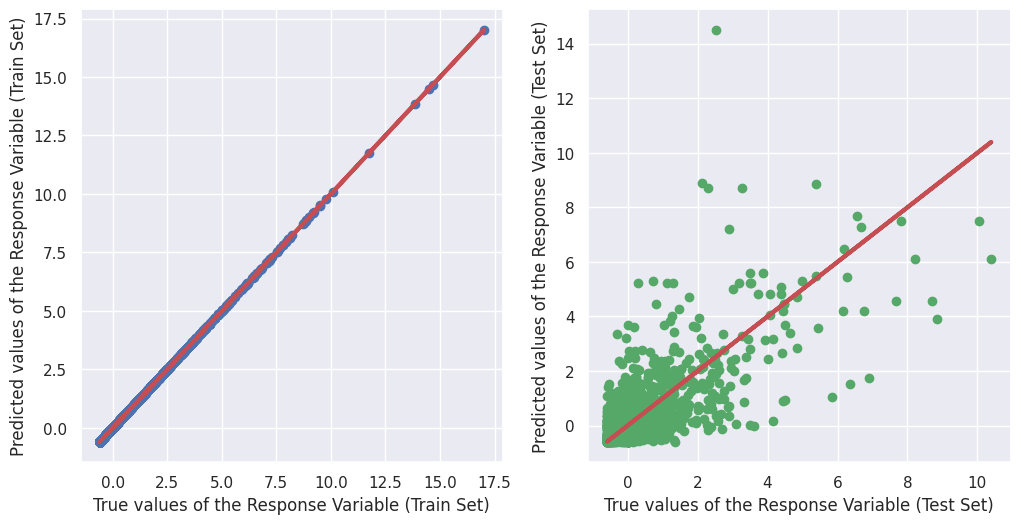

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### 7.3 Random Forest

A random forest is a meta estimator that utilises ensemble learning. It fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_rmse = []

# Random Forest Regressor model
model = RandomForestRegressor(random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor features
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

rf_rmse.append(rmse)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9602381107640029
Root Mean Squared Error (RMSE) 	: 0.29574994897782103

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6603287527108371
Root Mean Squared Error (RMSE) 	: 0.7662708697933929



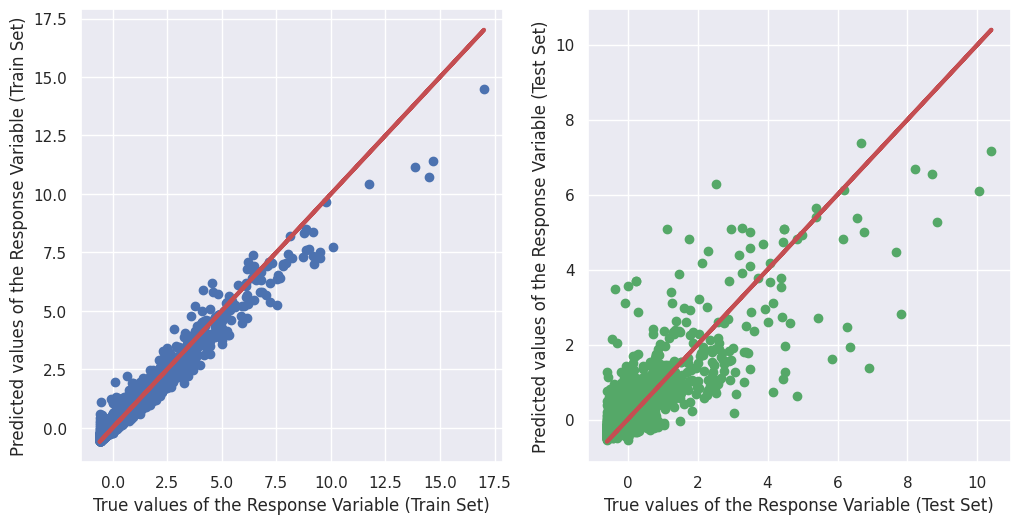

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### 7.4 Gradient Boosting

Here we implement a <b>Gradient Boost</b>, a powerful ensemble machine learning algorithm that uses decision trees as our machine learning model.

* <b>Boosting</b> is a general ensemble technique that involves sequentially adding models to the ensemble where sequence models correct the performance of prior models. 
* <b>Ensemble</b> learning is a general meta approach to machine learning that seeks better predictive performance by combining predictions from multiple models. 

Gradient boosting is an ensemble created from decision trees added sequentially to the model and can be used for classification or regression predictive modelling problems. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. 

Here we would like to predict `gross`, a numerical feature using various categorical and numerical features present in our dataset thus we import `GradientBoostingRegressor`

In [ ]:
gbr_rmse = []

# Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor features
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

gbr_rmse.append(rmse)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8393959531114027
Root Mean Squared Error (RMSE) 	: 0.5943871542551509

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6578858922668407
Root Mean Squared Error (RMSE) 	: 0.7690213811674406



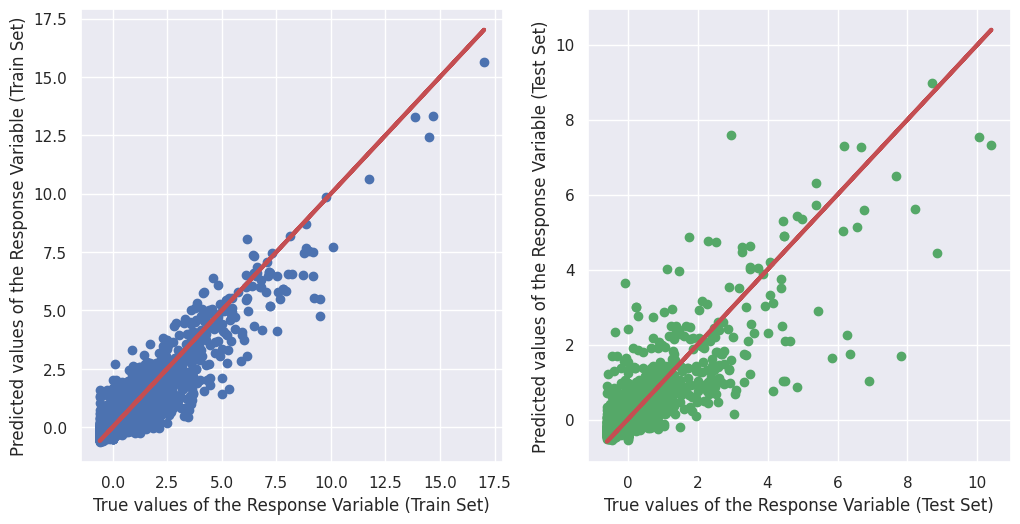

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

In [ ]:
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

baseline_rmse = []
baseline_rmse.append(linear_rmse[0])
baseline_rmse.append(dt_rmse[0])
baseline_rmse.append(rf_rmse[0])
baseline_rmse.append(gbr_rmse[0])

acc = pd.DataFrame({'Model': model_names, 'Baseline RMSE': baseline_rmse})
acc

Model  Baseline RMSE
0  Linear Regression       0.903338
1      Decision Tree       1.019093
2      Random Forest       0.766271
3  Gradient Boosting       0.769021

## 8. Improvements to Base Models

To improve the perfomance of our base models, we used the following techniques:
1. Dealing with Outliers
2. Feature Selection
3. Hyperparameter Tuning

### 8.1 Dealing with Outliers
We remove outliers for numerical features and run our model again

In [ ]:
df_outliers = df_merged.copy()

col_names = list(numerical)
left_whiskers = []
right_whiskers = []

for col in col_names:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    left_whisker = q1 - (iqr * 1.5)
    left_whiskers.append(left_whisker)
    
    right_whisker = q3 + (iqr * 1.5)
    right_whiskers.append(right_whisker)
    
outliers_indices = []

for i in range(len(col_names)):
    outliers = df_outliers[(df_outliers[col_names[i]] < left_whiskers[i]) | (df_outliers[col_names[i]] > right_whiskers[i])]
    index = outliers.index
    print("Number of data points dropped for " + str(col_names[i]) + ": " + str(len(index)))
    df_outliers = df_outliers.drop(index)
    
df_outliers

Number of data points dropped for num_critic_for_reviews: 206
Number of data points dropped for duration: 217
Number of data points dropped for director_facebook_likes: 523
Number of data points dropped for actor_3_facebook_likes: 106
Number of data points dropped for actor_1_facebook_likes: 96
Number of data points dropped for gross: 235
Number of data points dropped for num_voted_users: 83
Number of data points dropped for cast_total_facebook_likes: 55
Number of data points dropped for num_user_for_reviews: 65
Number of data points dropped for budget: 102
Number of data points dropped for actor_2_facebook_likes: 166
Number of data points dropped for imdb_score: 107
Number of data points dropped for movie_facebook_likes: 378


num_critic_for_reviews  duration  director_facebook_likes  \
4                      110.0     103.0                    131.0   
98                       1.0     120.0                     28.0   
176                     21.0      60.0                     49.0   
197                      1.0     103.0                      0.0   
212                     85.0     102.0                    323.0   
...                      ...       ...                      ...   
4992                    14.0      95.0                      0.0   
4993                     1.0      87.0                      2.0   
4995                    13.0      76.0                      0.0   
4996                    14.0     100.0                      0.0   
4997                    43.0      90.0                     16.0   

      actor_3_facebook_likes  actor_1_facebook_likes       gross  \
4                      371.5                   131.0  25517500.0   
98                      12.0                   544.0  25517500.0   
176                    184.0                   982.0  25517500.0   
197                    159.0                 10000.0  25517500.0   
212                    241.0                   845.0  32694788.0   
...                      ...                     ...         ...   
4992                   133.0                   296.0      4584.0   
4993                   318.0                   637.0  25517500.0   
4995                     0.0                     0.0  25517500.0   
4996                   489.0                   946.0     10443.0   
4997                    16.0                    86.0     85222.0   

      num_voted_users  cast_total_facebook_likes  num_user_for_reviews  \
4                 8.0                      143.0                 156.0   
98              374.0                      699.0                  13.0   
176           16769.0                     1687.0                  74.0   
197             381.0                    11036.0                   2.0   
212          101411.0                     1815.0                 546.0   
...               ...                        ...                   ...   
4992           1338.0                      690.0                  14.0   
4993            629.0                     2283.0                   6.0   
4995             38.0                        0.0                   3.0   
4996           1255.0                     2386.0                   9.0   
4997           4285.0                      163.0                  84.0   

          budget  ...  actor_3_count_1  actor_3_count_2  actor_3_count_Other  \
4     20000000.0  ...              0.0              0.0                  1.0   
98    20000000.0  ...              1.0              0.0                  0.0   
176    1500000.0  ...              1.0              0.0                  0.0   
197   20000000.0  ...              0.0              0.0                  1.0   
212   85000000.0  ...              0.0              1.0                  0.0   
...          ...  ...              ...              ...                  ...   
4992      9000.0  ...              1.0              0.0                  0.0   
4993  20000000.0  ...              0.0              0.0                  1.0   
4995      1400.0  ...              1.0              0.0                  0.0   
4996  20000000.0  ...              1.0              0.0                  0.0   
4997      1100.0  ...              1.0              0.0                  0.0   

      facenumber_in_poster_0.0  facenumber_in_poster_1.0  \
4                          1.0                       0.0   
98                         1.0                       0.0   
176                        0.0                       0.0   
197                        0.0                       1.0   
212                        0.0                       1.0   
...                        ...                       ...   
4992                       0.0                       1.0   
4993                       0.0                       0

In [ ]:
# X -> Numerical predictors 
# y -> gross, numerical response 
X, y = df_outliers[numerical].loc[:, df_outliers[numerical].columns != 'gross'], df_outliers['gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [ ]:
rs1 = RobustScaler().fit(X_train)
rs2 = RobustScaler().fit(y_train.values.reshape(-1,1))

X_train = pd.DataFrame(rs1.transform(X_train.values), index=X_train.index, columns=X_train.columns)
y_train = pd.DataFrame(rs2.transform(y_train.values.reshape(-1,1)), index=y_train.index, columns=['gross'])

X_test = pd.DataFrame(rs1.transform(X_test), index=X_test.index, columns=X_test.columns)
y_test = pd.DataFrame(rs2.transform(y_test.values.reshape(-1,1)), index=y_test.index, columns=['gross'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X_train = pd.merge(X_train, cat_tomerge, left_index=True, right_index=True)
X_test = pd.merge(X_test, cat_tomerge, left_index=True, right_index=True)

### Linear Regression

In [ ]:
# Linear Regressor model
model = LinearRegression()
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor features
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

linear_rmse.append(rmse)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4818684139080298
Root Mean Squared Error (RMSE) 	: 0.7037742819975562

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.479683009788761
Root Mean Squared Error (RMSE) 	: 0.7714124640334732



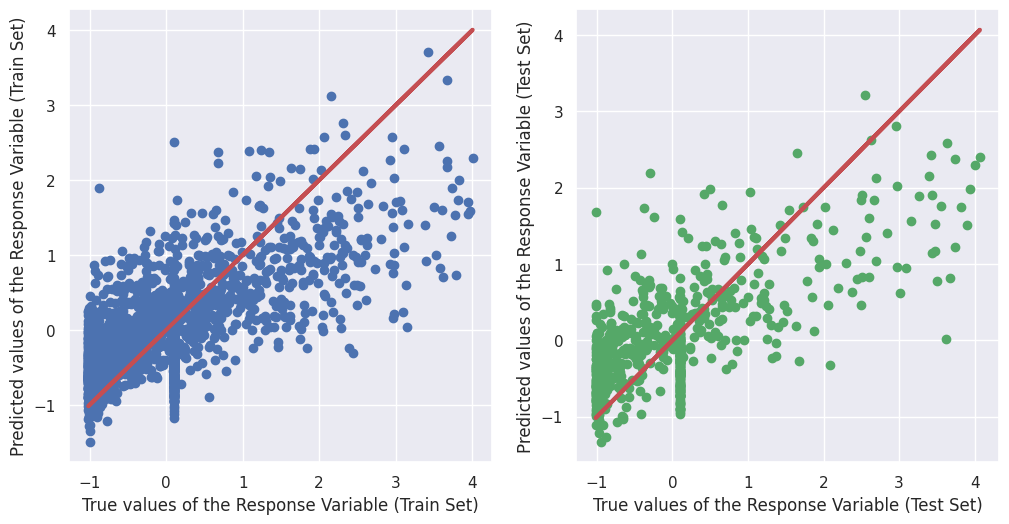

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### Decision Tree

In [ ]:
# Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor features
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

dt_rmse.append(rmse)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Root Mean Squared Error (RMSE) 	: 1.5132944622443598e-17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.008282722660175601
Root Mean Squared Error (RMSE) 	: 1.073850467850388



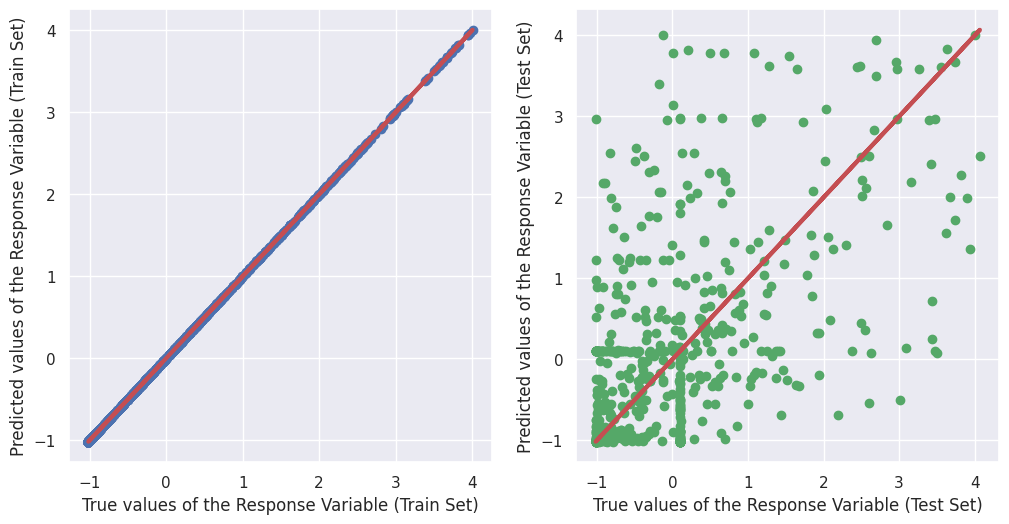

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### Random Forest

In [ ]:
# Random Forest Regressor model
model = RandomForestRegressor(random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor features
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)d
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

rf_rmse.append(rmse)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9251179880993711
Root Mean Squared Error (RMSE) 	: 0.26754824736469945

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5377898934643508
Root Mean Squared Error (RMSE) 	: 0.7270635400045903



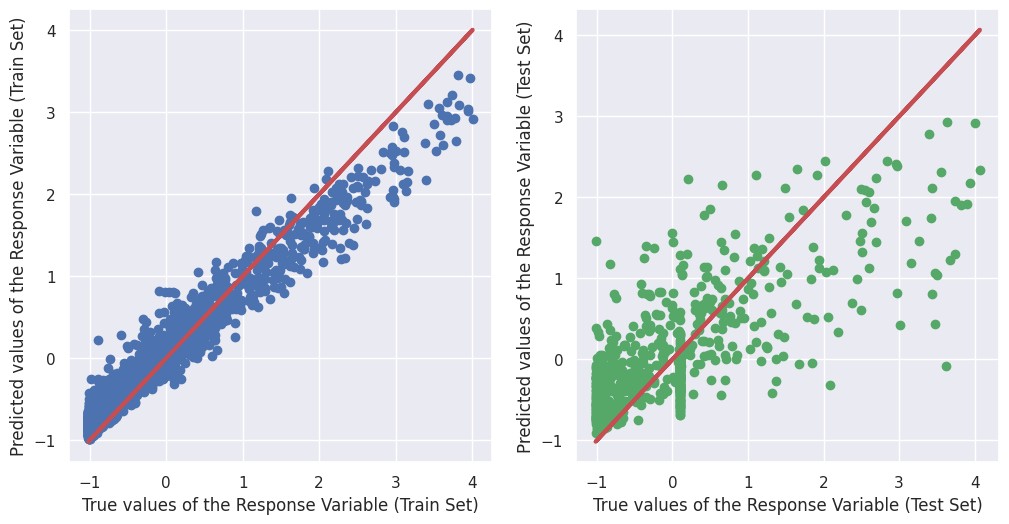

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### Gradient Boosting

In [ ]:
# Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor featuresd
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)d
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

gbr_rmse.append(rmse)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6686863091434958
Root Mean Squared Error (RMSE) 	: 0.5627727359796473

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5557462684258265
Root Mean Squared Error (RMSE) 	: 0.712800819236094



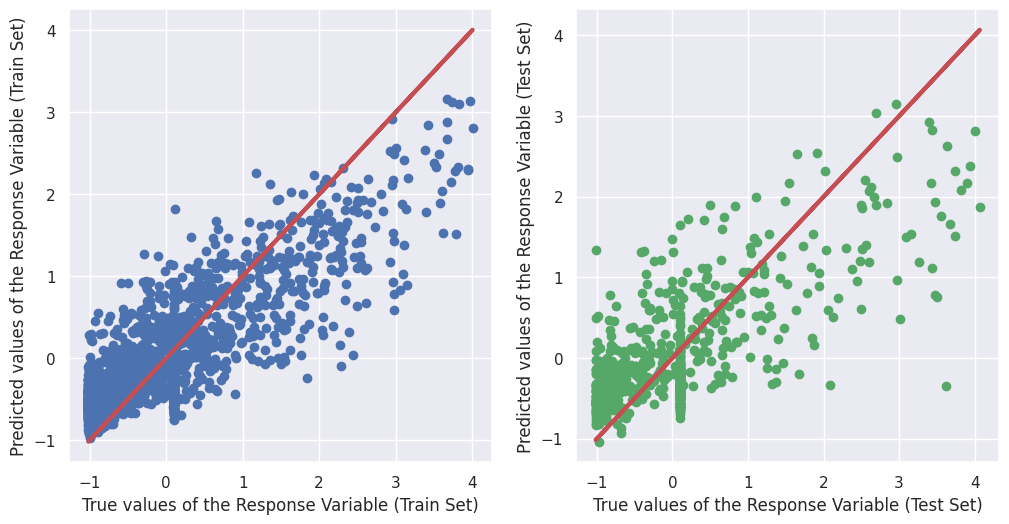

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

In [ ]:
no_outliers_rmse = []
no_outliers_rmse.append(linear_rmse[1])
no_outliers_rmse.append(dt_rmse[1])
no_outliers_rmse.append(rf_rmse[1])
no_outliers_rmse.append(gbr_rmse[1])

acc["No Outliers RMSE"] = no_outliers_rmse
acc

Model  Baseline RMSE  No Outliers RMSE
0  Linear Regression       0.903338          0.771412
1      Decision Tree       1.019093          1.073850
2      Random Forest       0.766271          0.727064
3  Gradient Boosting       0.769021          0.712801

<AxesSubplot:xlabel='Model', ylabel='RMSE'>

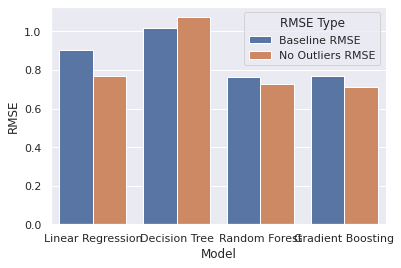

In [ ]:
data = acc.melt('Model', var_name = 'RMSE Type', value_name = 'RMSE')
sb.barplot(x = 'Model', y = 'RMSE', hue = 'RMSE Type', data = data)

### 8.2 Feature Selection

Here, we use a feature importance score to rank the importances of our features. The feature importance score tells us the Mean Decrease in Impurity (MDI).

The MDI of a feature is the sum of the number of splits across all trees where the feature is used, weighted by the proportion of samples at the split, and averaged by the number of trees. In other words, the higher the MDI, the better the feature is at reducing the tree's impurity.

We will use <b>Gradient Boosting Regressor</b> to determine feature importances as it performs the best among the baseline models. Only the <b>top 30</b> features will be used in the models.

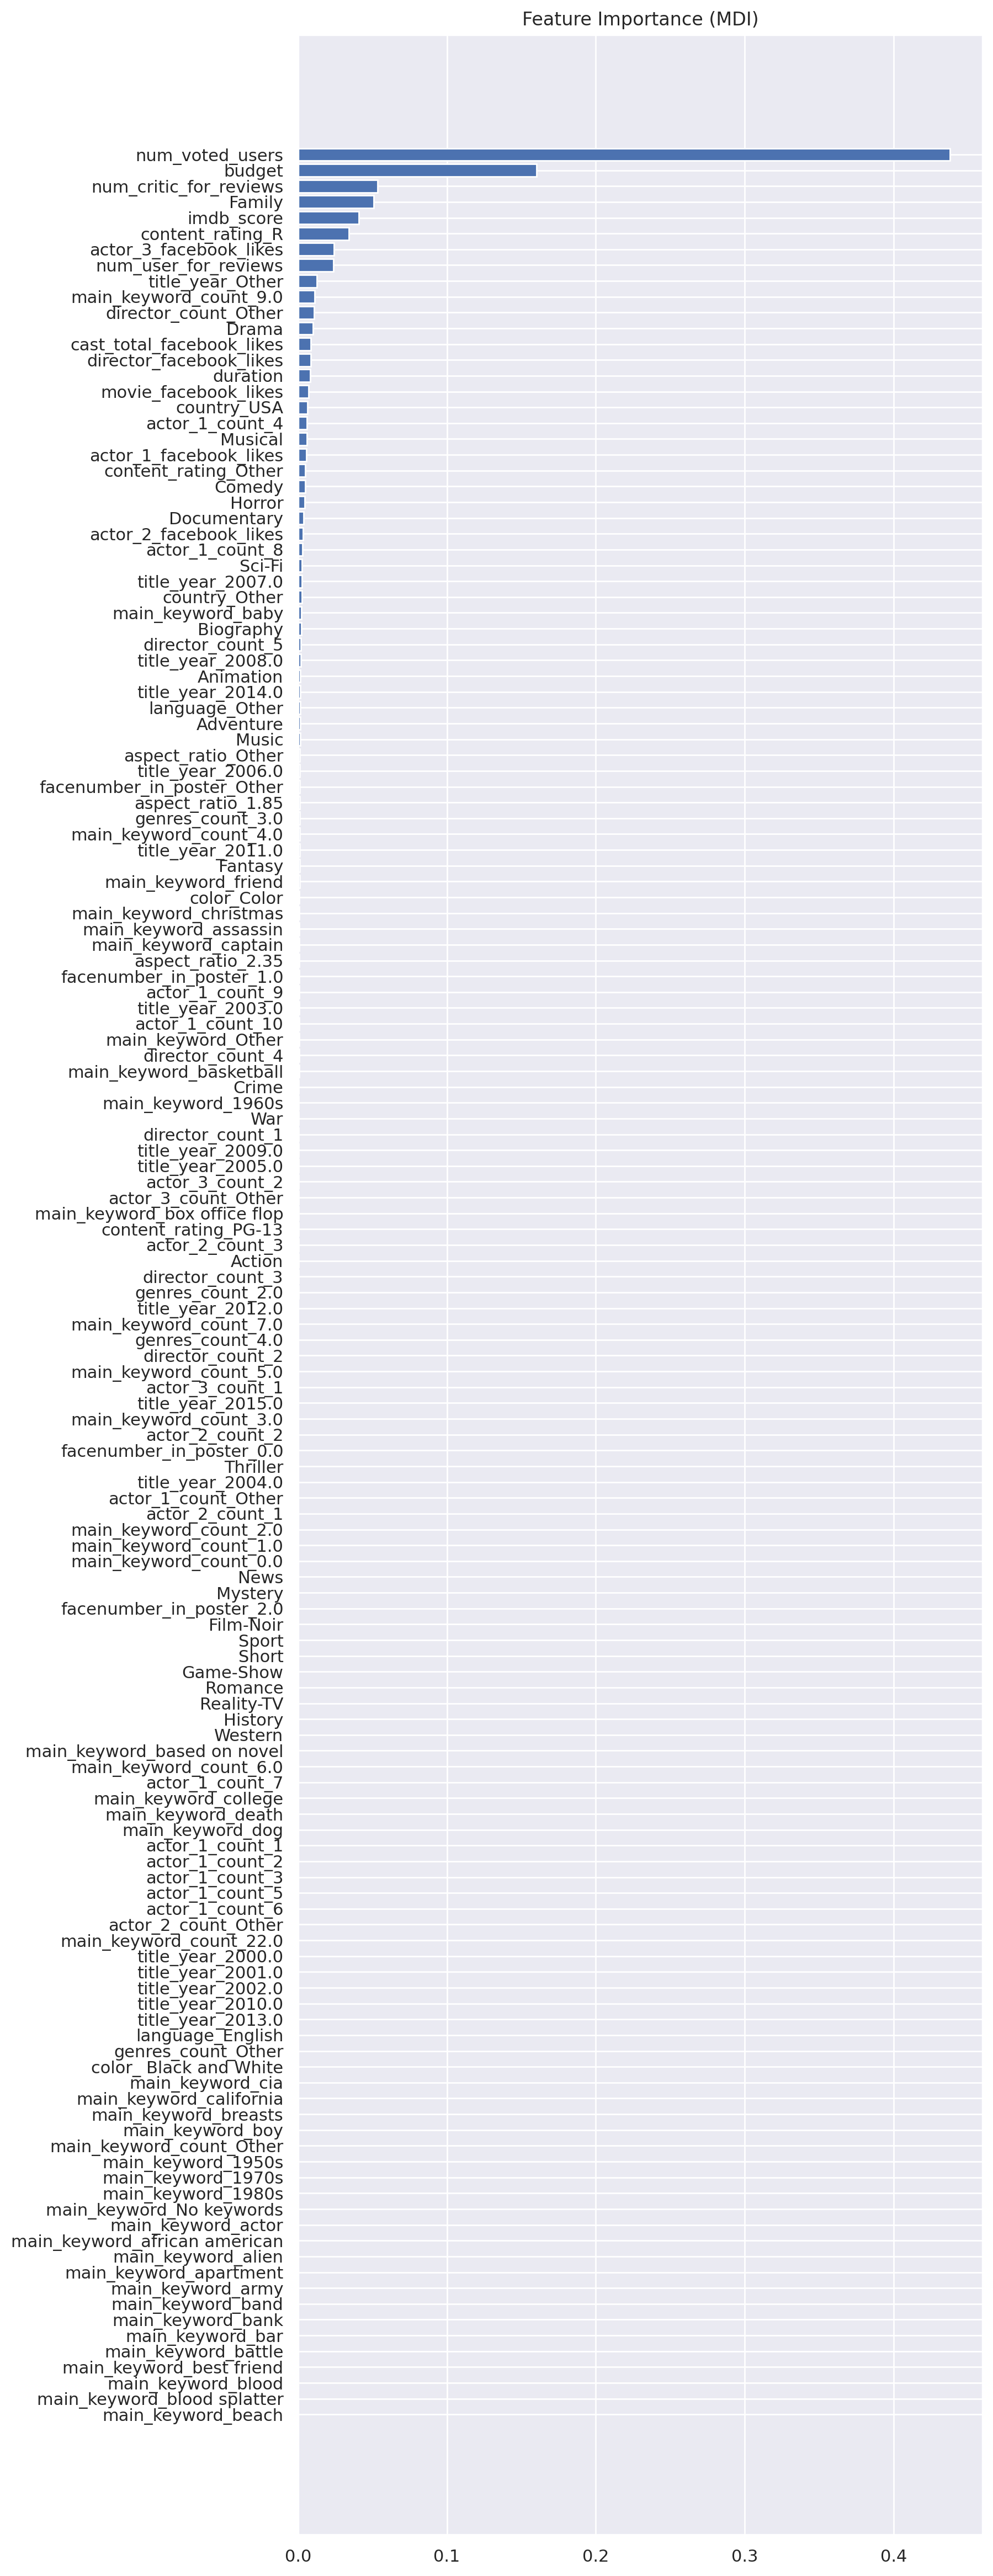

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

fig = plt.figure(figsize=(8, 30), dpi=200)
plt.barh(pos,feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_test.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.show();

In [ ]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
attr_importances = [(attr, round(importance, 3)) for attr, importance in zip(X_test.columns, importances)]

# Sort the feature importances by most important first
attr_importances = sorted(attr_importances, key = lambda x: x[1], reverse = True)

sel_features = pd.DataFrame(attr_importances[:30], columns=['Features','Importance'])
sel_features

Features  Importance
0             num_voted_users       0.438
1                      budget       0.160
2      num_critic_for_reviews       0.053
3                      Family       0.051
4                  imdb_score       0.041
5            content_rating_R       0.034
6      actor_3_facebook_likes       0.024
7        num_user_for_reviews       0.024
8            title_year_Other       0.012
9      main_keyword_count_9.0       0.011
10       director_count_Other       0.011
11                      Drama       0.010
12  cast_total_facebook_likes       0.009
13                   duration       0.008
14    director_facebook_likes       0.008
15       movie_facebook_likes       0.007
16                    Musical       0.006
17            actor_1_count_4       0.006
18                country_USA       0.006
19     actor_1_facebook_likes       0.005
20                     Comedy       0.005
21                     Horror       0.005
22       content_rating_Other       0.005
23                Documentary       0.004
24     actor_2_facebook_likes       0.003
25                     Sci-Fi       0.003
26            actor_1_count_8       0.003
27          title_year_2007.0       0.003
28                  Animation       0.002
29                  Biography       0.002

In [ ]:
X_train = X_train[sel_features.Features.values]
X_test = X_test[sel_features.Features.values]

### Linear Regression

In [ ]:
# Linear Regressor model
model = LinearRegression()
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor features
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

linear_rmse.append(rmse)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4448220070159392
Root Mean Squared Error (RMSE) 	: 0.7284998714581024

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4653751789761178
Root Mean Squared Error (RMSE) 	: 0.7819468003652748



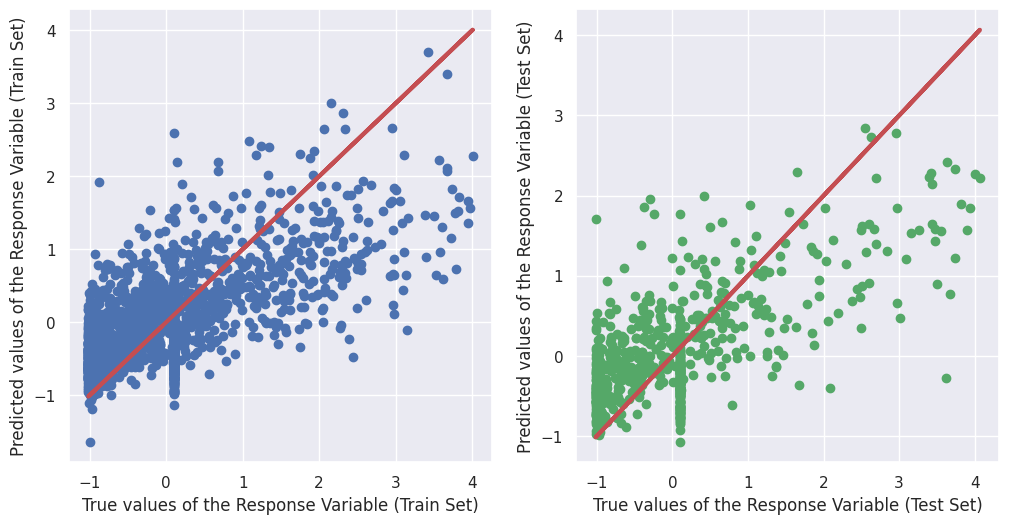

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### Decision Tree

In [ ]:
# Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor features
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

dt_rmse.append(rmse)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Root Mean Squared Error (RMSE) 	: 1.3388954070892652e-17

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.05595216374165268
Root Mean Squared Error (RMSE) 	: 1.0989419958622018



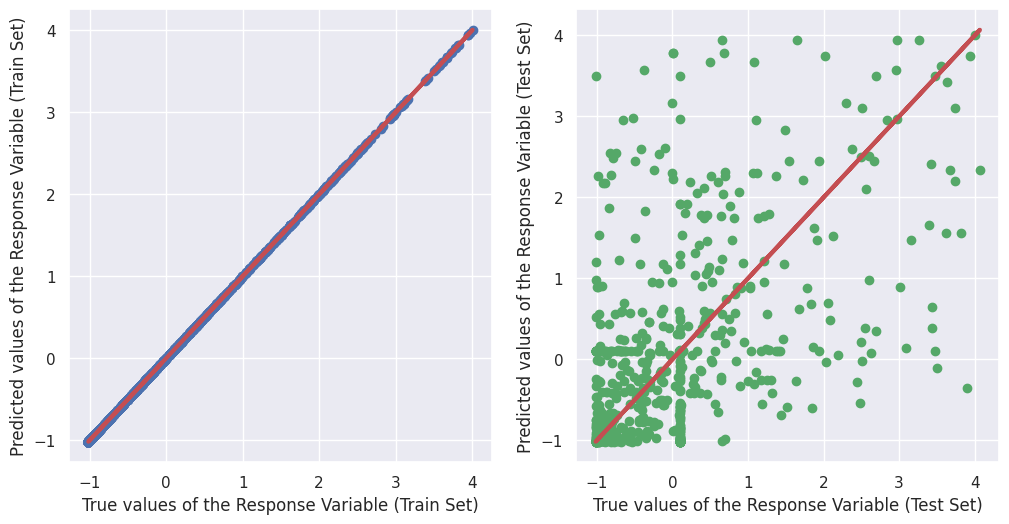

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### Random Forest

In [ ]:
# Random Forest Regressor model
model = RandomForestRegressor(random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor features
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)d
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

rf_rmse.append(rmse)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9232641260832695
Root Mean Squared Error (RMSE) 	: 0.27083985957709883

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5347035243246614
Root Mean Squared Error (RMSE) 	: 0.7294869540406433



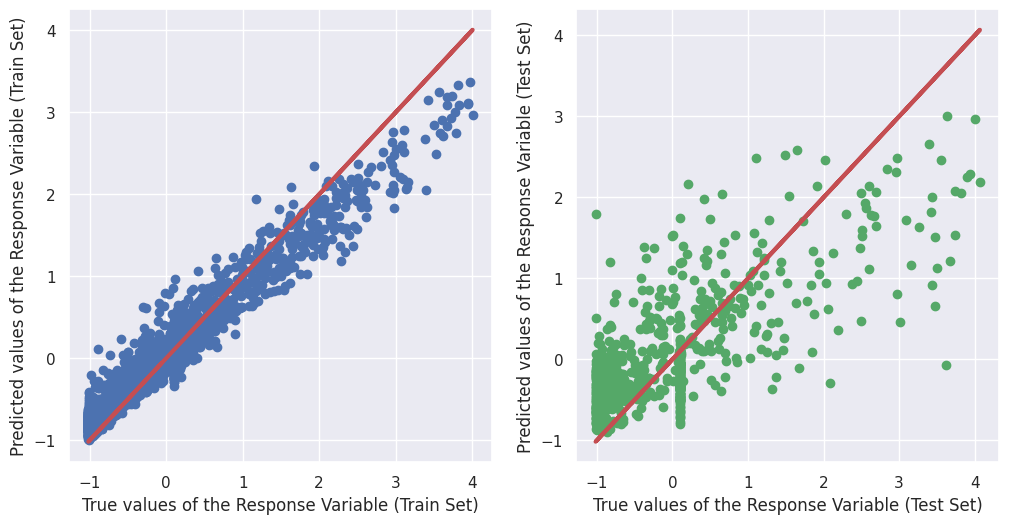

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### Gradient Boosting

In [ ]:
# Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor featuresd
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()
                 
# Check the Goodness of Fit (on Test Data)d
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

gbr_rmse.append(rmse)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6630021097280847
Root Mean Squared Error (RMSE) 	: 0.5675798242804291

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5565526787694215
Root Mean Squared Error (RMSE) 	: 0.7121535865864056



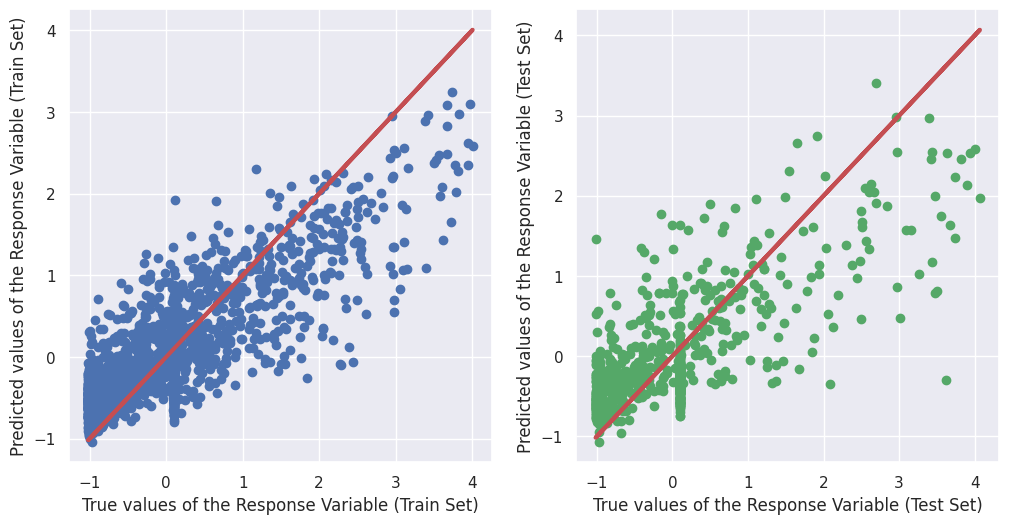

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

In [ ]:
feature_impt_rmse = []
feature_impt_rmse.append(linear_rmse[2])
feature_impt_rmse.append(dt_rmse[2])
feature_impt_rmse.append(rf_rmse[2])
feature_impt_rmse.append(gbr_rmse[2])

acc["Feature Importances RMSE"] = feature_impt_rmse
acc

Model  Baseline RMSE  No Outliers RMSE  \
0  Linear Regression       0.903338          0.771412   
1      Decision Tree       1.019093          1.073850   
2      Random Forest       0.766271          0.727064   
3  Gradient Boosting       0.769021          0.712801   

   Feature Importances RMSE  
0                  0.781947  
1                  1.098942  
2                  0.729487  
3                  0.712154

<AxesSubplot:xlabel='Model', ylabel='RMSE'>

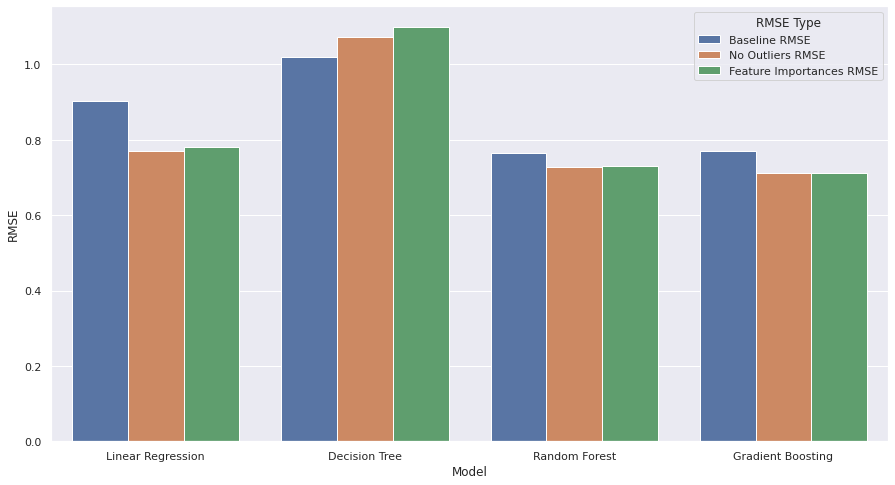

In [ ]:
data = acc.melt('Model', var_name = 'RMSE Type', value_name = 'RMSE')
sb.set(rc = {'figure.figsize':(15,8)})
sb.barplot(x = 'Model', y = 'RMSE', hue = 'RMSE Type', data = data)

### 8.3 Hyperparameter Tuning with GridSearch

Here, we will tune the key parameters of each model using GridSearchCV. 5-fold cross validation will be used.

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# X -> Numerical predictors 
# y -> gross, numerical response 
X, y = df_outliers[numerical].loc[:, df_outliers[numerical].columns != 'gross'], df_outliers['gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [ ]:
rs1 = RobustScaler().fit(X_train)
rs2 = RobustScaler().fit(y_train.values.reshape(-1,1))

X_train = pd.DataFrame(rs1.transform(X_train.values), index=X_train.index, columns=X_train.columns)
y_train = pd.DataFrame(rs2.transform(y_train.values.reshape(-1,1)), index=y_train.index, columns=['gross'])

X_test = pd.DataFrame(rs1.transform(X_test), index=X_test.index, columns=X_test.columns)
y_test = pd.DataFrame(rs2.transform(y_test.values.reshape(-1,1)), index=y_test.index, columns=['gross'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X_train = pd.merge(X_train, cat_tomerge, left_index=True, right_index=True)
X_test = pd.merge(X_test, cat_tomerge, left_index=True, right_index=True)

### Linear Regression

- `fit_intercept`: whether to calculate the intercept for this model (default = True)
- `normalize`: whether X will be normalized before regression (default = False)
- `positive`: whether to force the coefficients to be positive (default = False)

In [ ]:
# Linear Regressor model
model = LinearRegression()

# Evaluation
cv = RepeatedKFold(random_state = 0)

# define parameters search space
space = dict()
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['positive'] = [True, False]

search = GridSearchCV(model, space, scoring = 'neg_root_mean_squared_error', n_jobs = -1, cv = cv)
result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.7759869256079911
Best Hyperparameters: {'fit_intercept': True, 'normalize': True, 'positive': True}
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
# Parameters for our model
params = {"fit_intercept": True,
          "normalize": True,
          "positive": True
         }

model = LinearRegression(**params)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor featuresd
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)d
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

linear_rmse.append(rmse)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.44648121004951224
Root Mean Squared Error (RMSE) 	: 0.7274104607961419

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.457766256491942
Root Mean Squared Error (RMSE) 	: 0.7874915786761819

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


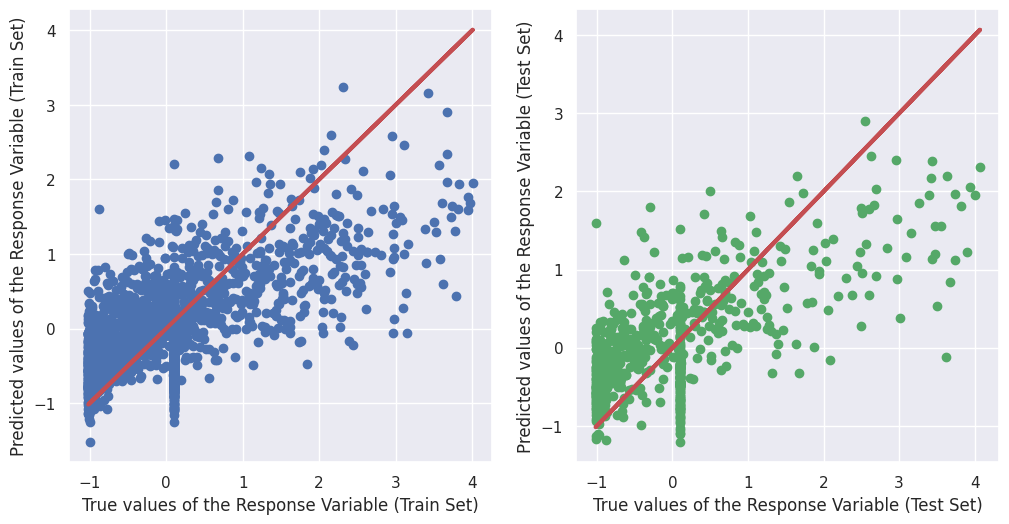

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### Decision Tree

- `max_depth`: depth of the tree (default = None)
- `min_samples_split`: minimum number of samples required to split an internal node (default = 2)
- `min_samples_leaf`: minimum number of samples required to be at a leaf node (default = 1)

In [ ]:
# Decision Tree Regressor model
model = DecisionTreeRegressor()

# Evaluation
cv = RepeatedKFold(random_state = 0)

# define parameters search space
space = dict()
space['max_depth'] = [2,5,10]
space['min_samples_split'] = [2,5,10]
space['min_samples_leaf'] = [2,5,10]

search = GridSearchCV(model, space, scoring = 'neg_root_mean_squared_error', n_jobs = -1, cv = cv)
result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.8151754364623598
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [ ]:
# Parameters for our model
params = {"max_depth": 5,
          "min_samples_split": 5,
          "min_samples_leaf": 10
         }

model = DecisionTreeRegressor(**params, random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor featuresd
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)d
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

dt_rmse.append(rmse)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4899534716459204
Root Mean Squared Error (RMSE) 	: 0.6982617558146736

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4147655778884436
Root Mean Squared Error (RMSE) 	: 0.8181210727771481



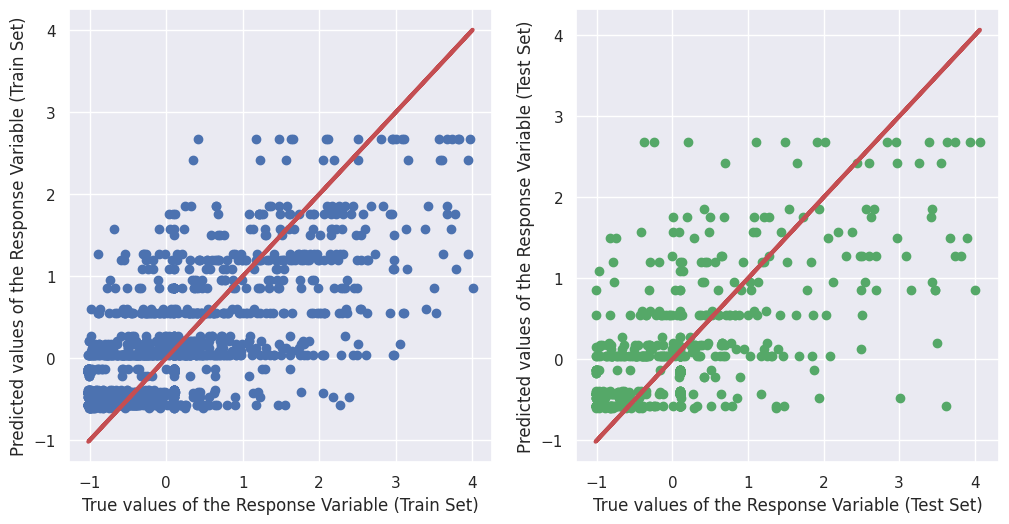

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### Random Forest

- `n_estimators`: number of boosted trees (default = 100)
- `max_depth`: depth of the tree (default = None)
- `min_samples_split`: minimum number of samples required to split an internal node (default = 2)
- `min_samples_leaf`: minimum number of samples required to be at a leaf node (default = 1)

In [ ]:
# Random Forest Regressor model
model = RandomForestRegressor()

# Evaluation
cv = RepeatedKFold(random_state = 0)

# define parameters search space
space = dict()
space['n_estimators'] = [100,250,500]
space['max_depth'] = [2,5,10]
space['min_samples_split'] = [2,5,10]
space['min_samples_leaf'] = [2,5,10]

search = GridSearchCV(model, space, scoring = 'neg_root_mean_squared_error', n_jobs = -1, cv = cv)
result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
Best Score: -0.7208831009368438
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
# Parameters for our model
params = {"n_estimators": 500,
          "max_depth": 10,
          "min_samples_split": 5,
          "min_samples_leaf": 5
         }

model = RandomForestRegressor(**params, random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor featuresd
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)d
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

rf_rmse.append(rmse)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7559336656824771
Root Mean Squared Error (RMSE) 	: 0.48302242885834445

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5346917410768062
Root Mean Squared Error (RMSE) 	: 0.7294961908086147



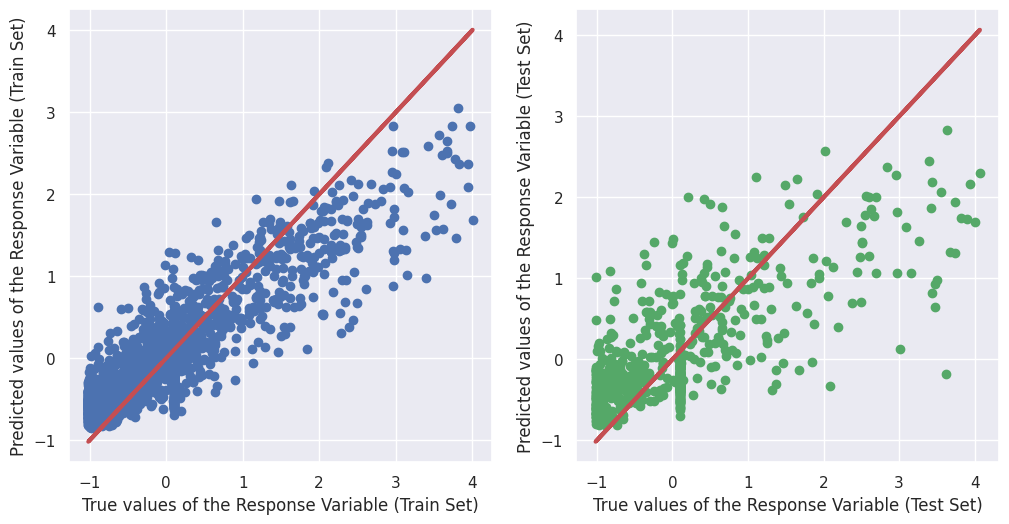

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

### Gradient Boosting

- `learning_rate`: the contribution of each tree (default = 0.1)
- `n_estimators`: number of boosted trees (default = 100)
- `max_depth`: depth of the tree (default = 3)

In [ ]:
# Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Evaluation
cv = RepeatedKFold(random_state=0)

# define parameters search space
space = dict()
space['learning_rate'] = [0.05,0.1,0.2]
space['n_estimators'] = [100,250,500]
space['max_depth'] = [2,5,10]

search = GridSearchCV(model, space, scoring = 'neg_root_mean_squared_error', n_jobs = -1, cv = cv)
result = search.fit(X_train, y_train.values.ravel())

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.7175966532428482
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 500}


In [ ]:
# Parameters for our model
params = {"learning_rate": 0.05,
          'n_estimators': 500,
          "max_depth": 2
         }

model = GradientBoostingRegressor(**params, random_state=0)
model.fit(X_train.values, y_train.values)

# Predict Gross from our predictor featuresd
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

rmse = math.sqrt(mean_squared_error(y_test.values, y_test_pred))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train.values, y_train.values))
print("Root Mean Squared Error (RMSE) \t:", math.sqrt(mean_squared_error(y_train.values, y_train_pred)))
print()

                 
# Check the Goodness of Fit (on Test Data)d
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test.values, y_test.values))
print("Root Mean Squared Error (RMSE) \t:", rmse)
print()

gbr_rmse.append(rmse)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6389887355706161
Root Mean Squared Error (RMSE) 	: 0.5874538234866332

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5488614734173578
Root Mean Squared Error (RMSE) 	: 0.7183028777677065



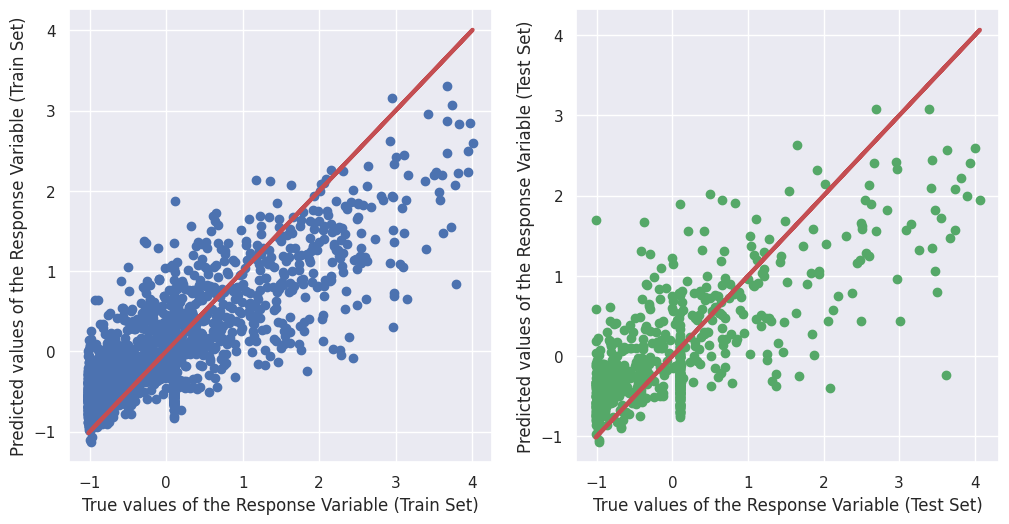

In [ ]:
# Plot predicted vs true values
f, axes = plt.subplots(1,2, figsize=(12,6), dpi=100)
# Train set
axes[0].scatter(y_train, y_train_pred, color='b');
axes[0].plot(np.array(y_train), np.array(y_train), 'r-', linewidth=3);
axes[0].set_xlabel("True values of the Response Variable (Train Set)");
axes[0].set_ylabel("Predicted values of the Response Variable (Train Set)");
# Test set
axes[1].scatter(y_test, y_test_pred, color='g');
axes[1].plot(np.array(y_test), np.array(y_test), 'r-', linewidth=3);
axes[1].set_xlabel("True values of the Response Variable (Test Set)");
axes[1].set_ylabel("Predicted values of the Response Variable (Test Set)");
plt.show();

In [ ]:
hyp_tune_rmse = []
hyp_tune_rmse.append(linear_rmse[3])
hyp_tune_rmse.append(dt_rmse[3])
hyp_tune_rmse.append(rf_rmse[3])
hyp_tune_rmse.append(gbr_rmse[3])

acc["Hyperparameter Tuned RMSE"] = hyp_tune_rmse
acc

Model  Baseline RMSE  No Outliers RMSE  \
0  Linear Regression       0.903338          0.771412   
1      Decision Tree       1.019093          1.073850   
2      Random Forest       0.766271          0.727064   
3  Gradient Boosting       0.769021          0.712801   

   Feature Importances RMSE  Hyperparameter Tuned RMSE  
0                  0.781947                   0.787492  
1                  1.098942                   0.818121  
2                  0.729487                   0.729496  
3                  0.712154                   0.718303

<AxesSubplot:xlabel='Model', ylabel='RMSE'>

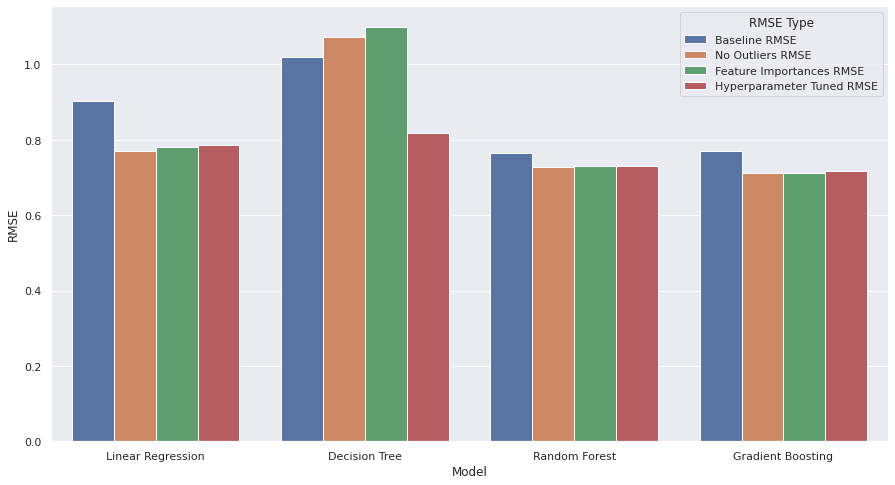

In [ ]:
data = acc.melt('Model', var_name = 'RMSE Type', value_name = 'RMSE')
sb.set(rc = {'figure.figsize':(15,8)})
sb.barplot(x = 'Model', y = 'RMSE', hue = 'RMSE Type', data = data)

## 9. Model Discussions and Conclusion

### 1. Why does Decision Tree perform poorly

- Decision Trees learn simple decision rules from the features and determines the best split by choosing the feature that allows for greater information gain or lower node impurity. However, if there is no stopping criteria, the tree will continue splitting until all children nodes are pure. This causes the tree to overfit the training set and it becomes more complex than necessary. 

- Due to overfitting, the tree was not able to perform well for the first 3 variations (baseline, outlier removal, feature selection). Only when a limit was placed to the depth of the tree during hyperparameter tuning, the tree was forced to terminate early and its performance improved significantly.

### 2. Why is Gradient Boosting the better tree-based model in theory

- The tree-based models used are Decision Tree, Random Forest, and Gradient Boosting.

- Random Forest is an ensemble learning technique - it constructs a set of base models from the training set and make predictions by aggregating the predictions made by each base model. For Random Forests, the base models are Decision Trees and each tree is generated using a random subset of training set and feature set. The forest then averages the predictions from all trees.

- Random Forest is more accurate than a single Decision Tree as it incorporates more diversity. It is also more efficient as searching among a subset of the feature set when determining the best split is much faster too. However, it does not perform as well as Gradient Boosting.

- Gradient Boosting uses boosting on top of ensemble learning. It boosts a set of weak learners to a strong learner such that misclassifications made by weak learners are made important. In general, the distribution of training set is changed adaptively so that weak learners will focus more on errors made by previous learners.

- For Gradient Boosting, Decision Trees are used as the weak learners and are added one at a time, and fitted to correct the errors made by previous trees. The errors made can be captured by a cost function, which is to be minimised using the gradient descent algorithm (hence the name gradient boosting). Thus, Gradient Boosting is the better tree-based model.

### 3. Best model to predict gross revenue for Top IMDB Movies dataset

- From a theoretical standpoint, Gradient Boosting should perform better than Decision Tree and Random Forest due to reasons made in earlier discussions. It should also perform better than the basic linear regressor. Indeed, from our results, Gradient Boosting performed the best among the 4 models for all variations (baseline, outliers removal, feature selection, hyperparameter tuning).

- From our results, it is safe to say that Gradient Boosting is the best tree-based model to predict the gross revenue of top IMDB movies from this dataset. However, as there are other strong models that were not covered in the scope of this project (eg. Multi-Layer Perceptron, Support Vector Machine), we cannot be certain that Gradient Boosting is the best model in predicting gross revenue for top IMDB movies.

### 4. Top features to predict gross revenue for Top IMDB Movies Dataset

- Based on the feature importance ranking, the top 5 features are:
1. Number of users who voted
2. Budget
3. Number of critic reviews
4. Whether the movie is of the genre 'Family'
5. IMDB score

- However, it is not clear how these features actually affect the gross revenue. We only know that they are important in terms of reducing the impurity for our Gradient Boosting Regressor.

- Out of the top 3 features which had the highest correlation with the target variable gross from the correlation matrix, 2 of them appeared in the top 5 features (Number of votes by users and Number of critic reviews).

### 5. Conclusion

- Every step of the EDA is vital in ensuring that our model inputs are not nonsensical. This ensures that our model predictions are meaningful (Garbage In, Garbage Out principle).

- The dataset has to be processed properly, such as the handling null values and removing of duplicates. As the feature set is small, more features need to be engineered and transformed into sensible features (eg. using one-hot encoding).

- Plotting the feature distributions allows us to identify skewness and outliers. Appropriate techniques (eg. robust scale transformation) can then be used to resolve them.  

- By understanding the underlying algorithms behind the models, we can expect certain results and improve our model performance (eg. hyperparameter tuning). From our findings, we are able to determine the model (Gradient Boosting) that best predicts the gross revenue of top IMDB movies from our dataset and the important features that are used by the model to make predictions.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1738b5fc-8469-46f3-9702-e58a38e0b74c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>